### CAPSTONE PROJECT - ACCOUNT CHURN PREDICTION FOR AN E-COMMERCE COMPANY - SURAJ MATHEW THOMAS

**An e-Commerce provider is facing a lot of competition in the current market and it has become a challenge to retain the existing customers in the current situation. Hence, the company wants to develop a model through which they can do churn prediction of the accounts and provide segmented offers to the potential churners. In this company, account churn is a major thing because 1 account can have multiple customers. hence by losing one account the company might be losing more than one customer.
You have been assigned to develop a churn prediction model for this company and provide business recommendations on the campaign.Your campaign suggestion should be unique and be very clear on the campaign offer because your recommendation will go through the revenue assurance team. If they find that you are giving a lot of free (or subsidized) stuff thereby making a loss to the company; they are not going to approve your recommendation. Hence be very careful while providing campaign recommendation.**

 <table align ="center">
  <tr>
    <th>Variable Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>AccountID</td>
    <td>account unique identifier</td>
  </tr>
   <tr>
    <td>Churn</td>
    <td>account churn flag (Target)</td>
  </tr>
    <tr>
    <td>Tenure</td>
    <td>Tenure of account</td>
  </tr>
       <tr>
    <td>City_Tier</td>
    <td>Tier of primary customer's city</td>
  </tr>
        <tr>
    <td>CC_Contacted_L12m</td>
    <td>How many times all the customers of the account has contacted customer care in last 12months</td>
  </tr>
            <tr>
    <td>Payment</td>
    <td>Preferred Payment mode of the customers in the account</td>
  </tr>
              <tr>
    <td>Gender</td>
    <td>Gender of the primary customer of the account</td>
  </tr>
                  <tr>
    <td>Service_Score</td>
    <td>Satisfaction score given by customers of the account on service provided by company</td>
  </tr>
     <tr>
    <td>Account_user_count</td>
    <td>Number of customers tagged with this account</td>
  </tr>
         <tr>
    <td>account_segment</td>
    <td>Account segmentation on the basis of spend</td>
  </tr>
       <tr>
    <td>CC_Agent_Score</td>
    <td>Satisfaction score given by customers of the account on customer care service provided by company</td>
  </tr>
          <tr>
    <td>Marital_Status</td>
    <td>Marital status of the primary customer of the account</td>
  </tr>
           <tr>
    <td>rev_per_month</td>
    <td>Monthly average revenue generated by account in last 12 months</td>
  </tr>
           <tr>
    <td>Complain_l12m</td>
    <td>Any complaints has been raised by account in last 12 months</td>
  </tr>
            <tr>
    <td>rev_growth_yoy</td>
    <td>revenue growth percentage of the account (last 12 months vs last 24 to 13 month)</td>
  </tr>
           <tr>
    <td>coupon_used_l12m</td>
    <td>How many times customers have used coupons to do the payment in last 12 months</td>
  </tr>
           <tr>
    <td>Day_Since_CC_connect</td>
    <td>Number of days since no customers in the account has contacted the customer care</td>
  </tr>
               <tr>
    <td>cashback_l12m</td>
    <td>Monthly average cashback generated by account in last 12 months</td>
  </tr>
                <tr>
    <td>Login_device</td>
    <td>Preferred login device of the customers in the account</td>
  </tr>
</table> 

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import statistics as st
from scipy.stats.mstats import mquantiles
from scipy.stats import iqr
from scipy.stats import pearsonr
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE 
from numpy import where
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from sklearn import tree
from sklearn import metrics
from os import system
from scipy.stats import zscore
import statsmodels.formula.api as smf
import math
from sklearn import metrics,model_selection
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPClassifier
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier


#ignore warnings
import warnings
warnings.filterwarnings('ignore')

plt.rcParams["figure.figsize"] = (12,8)
plt.rcParams['axes.titlesize'] = 16
plt.style.use('seaborn-whitegrid')
sns.set_palette("Set2")

#### READING THE SOURCE FILE - RAW DATA FILE IN XLSX FORMAT

In [2]:
df =pd.read_excel("Customer Churn Data.xlsx",sheet_name = 'Data for DSBA')

In [3]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [4]:
df.tail()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  \
11255      31255      0     10        1.0             34.0  Credit Card   
11256      31256      0     13        1.0             19.0  Credit Card   
11257      31257      0      1        1.0             14.0   Debit Card   
11258      31258      0     23        3.0             11.0  Credit Card   
11259      31259      0      8        1.0             22.0  Credit Card   

      Gender  Service_Score Account_user_count account_segment  \
11255   Male            3.0                  2           Super   
11256   Male            3.0                  5             HNI   
11257   Male            3.0                  2           Super   
11258   Male            4.0                  5           Super   
11259   Male            3.0                  2           Super   

       CC_Agent_Score Marital_Status rev_per_month  Complain_ly  \
11255             1.0        Married             9          0.0   
11256             5.0        Married             7          0.0   
11257             4.0        Married             7          1.0   
11258             4.0        Married             7          0.0   
11259             3.0        Married             5          0.0   

      rev_growth_yoy coupon_used_for_payment Day_Since_CC_connect cashback  \
11255             19                       1                    4   153.71   
11256             16                       1                    8   226.91   
11257             22                       1                    4   191.42   
11258             16                       2                    9    179.9   
11259             13                       2                    3   175.04   

      Login_device  
11255     Computer  
11256       Mobile  
11257       Mobile  
11258     Computer  
11259       Mobile

#### EXPLORATORY DATA ANALYSIS - EDA

In [5]:
df.size

213940

In [6]:
df.shape

(11260, 19)

In [7]:
print('The number of rows (observations) is',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is 11260 
The number of columns (variables) is 19


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

**12 - object data types | 2 - interger data types | 5 - float data types**

**Tenure, Account_User_Count, rev_per_month, rev_growth_yoy, coupon_used_for_payment, Day_Since_CC_connect, cashback. These are all numeric datatypes but are classified as objects because of the special characters that are there in the columns**

#### EDA - Checking for duplicates

In [9]:
is_duplicate = df.duplicated() #Checking to see if there are any duplicate rows in the dataset
print('Number of duplicate rows = %d' % (is_duplicate.sum()))

Number of duplicate rows = 0


**There are no duplicate rows in the given dataset**

#### EDA - 5 Number Summary of all the numeric variables ( data types of integer and float values)

In [10]:
df.describe().T

count          mean          std      min       25%  \
AccountID        11260.0  25629.500000  3250.626350  20000.0  22814.75   
Churn            11260.0      0.168384     0.374223      0.0      0.00   
City_Tier        11148.0      1.653929     0.915015      1.0      1.00   
CC_Contacted_LY  11158.0     17.867091     8.853269      4.0     11.00   
Service_Score    11162.0      2.902526     0.725584      0.0      2.00   
CC_Agent_Score   11144.0      3.066493     1.379772      1.0      2.00   
Complain_ly      10903.0      0.285334     0.451594      0.0      0.00   

                     50%       75%      max  
AccountID        25629.5  28444.25  31259.0  
Churn                0.0      0.00      1.0  
City_Tier            1.0      3.00      3.0  
CC_Contacted_LY     16.0     23.00    132.0  
Service_Score        3.0      3.00      5.0  
CC_Agent_Score       3.0      4.00      5.0  
Complain_ly          0.0      1.00      1.0

#### EDA - Missing Value Analysis

In [11]:
#Missing Value Analysis
missing_values=pd.DataFrame(df.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0                 AccountID              0       0.00
1                     Churn              0       0.00
2                    Tenure            102       0.91
3                 City_Tier            112       0.99
4           CC_Contacted_LY            102       0.91
5                   Payment            109       0.97
6                    Gender            108       0.96
7             Service_Score             98       0.87
8        Account_user_count            112       0.99
9           account_segment             97       0.86
10           CC_Agent_Score            116       1.03
11           Marital_Status            212       1.88
12            rev_per_month            102       0.91
13              Complain_ly            357       3.17
14           rev_growth_yoy              0       0.00
15  coupon_used_for_payment              0       0.00
16     Day_Since_CC_connect            357       3.17
17                 cashback            471       4.18
18             Login_device            221       1.96

**79% of the features have missing values. This means 15 out of the 19 columns have missing values**

In [12]:
def zero_count(_series):
    counter=0
    for val in _series:
        if val==0:
            counter+=1
    return counter 

def negative_count(_series):
    counter=0
    for val in _series:
        if val < 0:
            counter+=1
    return counter 

def percent_outlier(_series):
    counter = 0
    lb = np.percentile(_series,.25) - (1.5*iqr(_series))
    ub = np.percentile(_series,.75) + (1.5*iqr(_series))
    for val in _series:
        if val>ub or val<lb: 
            counter=counter+1
        else : pass
    return 100*counter/len(_series)

stat_list = ['TOTAL RECORDS',
 'NULL COUNT',
 'ZERO COUNT',
 'NEGATIVE COUNT',
 'MIN',
 'MAX',
 'RANGE',
 'MEAN',
 'MEDIAN',
 'MODE',
 'VARIANCE',
 'STD DEV',
 'Q1',
 'Q3',
 'IQR',
 'SKEWNESS',
 'KURTOSIS']

def stat_function(_series):
    return [round(val,2) for val in 
          [len(_series),
           _series.isna().sum(),
           zero_count(_series),
           negative_count(_series),
           min(_series),
           max(_series),
           max(_series)-min(_series),
           _series.mean(),
           np.percentile(_series,.5),
           _series.mode()[0],
           st.variance(_series),
           st.stdev(_series),
           np.percentile(_series,.25),
           np.percentile(_series,.75),
           iqr(_series),
           stats.skew(_series),
           stats.kurtosis(_series)]
          ]

def stat_df(data, feature_list):
    stat_dictionary = {}
    for x in feature_list:
        stat_dictionary[x] = stat_function(data[x])
    return pd.DataFrame(stat_dictionary, index = stat_list).T

# Finding % Outliers in our Data
def outlier_percentage_df(data, features_list):
    dict_outlier = {}
    for x in features_list:
        dict_outlier[x]=round(percent_outlier(data[x]),2)
    return pd.DataFrame(dict_outlier, index=["% OUTLIERS"]).T.sort_values("% OUTLIERS", ascending=False)

In [13]:
categorical_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print("The categorical features are", categorical_features) 
print("The numeric features are", numerical_features)

The categorical features are ['Tenure', 'Payment', 'Gender', 'Account_user_count', 'account_segment', 'Marital_Status', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback', 'Login_device']
The numeric features are ['AccountID', 'Churn', 'City_Tier', 'CC_Contacted_LY', 'Service_Score', 'CC_Agent_Score', 'Complain_ly']


In [14]:
# Check the various statistics about our data
stat_df(df, numerical_features).T

AccountID     Churn  City_Tier  CC_Contacted_LY  \
TOTAL RECORDS      11260.00  11260.00   11260.00         11260.00   
NULL COUNT             0.00      0.00     112.00           102.00   
ZERO COUNT             0.00   9364.00       0.00             0.00   
NEGATIVE COUNT         0.00      0.00       0.00             0.00   
MIN                20000.00      0.00       1.00             4.00   
MAX                31259.00      1.00       3.00           132.00   
RANGE              11259.00      1.00       2.00           128.00   
MEAN               25629.50      0.17       1.65            17.87   
MEDIAN             20056.29      0.00        NaN              NaN   
MODE               20000.00      0.00       1.00            14.00   
VARIANCE        10566571.67      0.14        NaN              NaN   
STD DEV             3250.63      0.37        NaN              NaN   
Q1                 20028.15      0.00        NaN              NaN   
Q3                 20084.44      0.00        NaN              NaN   
IQR                 5629.50      0.00        NaN              NaN   
SKEWNESS               0.00      1.77        NaN              NaN   
KURTOSIS              -1.20      1.14        NaN              NaN   

                Service_Score  CC_Agent_Score  Complain_ly  
TOTAL RECORDS         11260.0        11260.00     11260.00  
NULL COUNT               98.0          116.00       357.00  
ZERO COUNT                8.0            0.00      7792.00  
NEGATIVE COUNT            0.0            0.00         0.00  
MIN                       0.0            1.00         0.00  
MAX                       5.0            5.00         1.00  
RANGE                     5.0            4.00         1.00  
MEAN                      2.9            3.07         0.29  
MEDIAN                    NaN             NaN          NaN  
MODE                      3.0            3.00         0.00  
VARIANCE                  NaN             NaN          NaN  
STD DEV                   NaN             NaN          NaN  
Q1                        NaN             NaN          NaN  
Q3                        NaN             NaN          NaN  
IQR                       NaN             NaN          NaN  
SKEWNESS                  NaN             NaN          NaN  
KURTOSIS                  NaN             NaN          NaN

#### EDA - UNIVARIATE ANALYSIS

In [15]:
#Unique values in each of the columns of Object Datatype and the number of observations 
#These are categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

TENURE :  38
61       2
50       2
60       2
51       2
31      96
25     114
29     114
#      116
26     122
99     131
27     131
28     137
30     137
24     147
22     151
23     169
21     170
17     215
20     217
18     253
19     273
16     291
15     311
14     345
2      354
13     359
12     360
6      363
11     388
5      403
4      403
3      410
10     423
7      450
9      496
8      519
0     1231
1     1351
Name: Tenure, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4587
Name: Payment, dtype: int64


GENDER :  4
F          270
M          376
Female    4178
Male      6328
Name: Gender, dtype: int64


ACCOUNT_USER_COUNT :  7
6     315
@     332
1     446
2     526
5    1699
3    3261
4    4569
Name: Account_user_count, dtype: int64


ACCOUNT_SEGMENT :  7
Super +           47
Regular +        262
Regular          520
Super Plus       771
HNI             1639
Regular Pl

**OBSERVATIONS ON FEATURES WITH OBJECT DATA TYPE**

**1. TENURE column has # - 116. This needs to be treated. Also there are 1231 records with 0 tenure. This needs to be validated based on the business context to see if these values are valid or needs to be treated to make sense in the business context. Tenure column also have missing values that needs to be treated**

**2. PAYMENT column is clean is terms of classification. It only has missing values that needs to be treated**

**3. GENDER column has M and Male, F and Female. These 4 categories needs to be cleaned and combined into 2 categories M and F. Gender also has missing values that needs to be treated**

**4. ACCOUNT_USER_COUNT has 332 records with the value @. This needs to be treated. This column also has missing values that needs to be treated**

**5. ACCOUNT_SEGMENT has 7 categories which can be brought down to 5 categories. "Regular +" and "Regular Plus" can be combined. "Super +" and "Super Plus" can be combined. This column also has missing values that needs to be treated** 

**6. MARITAL_STATUS column is clean in terms of classification. It only has missing values that needs to be treated**

**7. REV_PER_MONTH column has 689 records with the value +. This needs to be looked into. It also has missing values that needs to be treated**

**8. REV_GROWTH_YOY column has 3 records with the value** $ **This needs to be treated. This column does not have any missing values**

**9. COUPONS_USED_FOR_PAYMENT column has 1 record each with value #, *, $ each which needs to be treated. This column does not have any missing values**

**10. DAYS_SINCE_CC_CONNECT column has 1 records with the value $. This needs to be treated. This column also has missing values that needs to be treated**

**11. CASHBACK column has 2 records with the value $. This needs to be treated. This column also has missing values tha needs to be treated**

**12. LOGIN_DEVICE column has 539 records with value &&&.This needs to be treated. The column also has missing values that needs to be treated**

#### REPLACING DUPLICATE CATEGORIES IN COLUMNS WITH A SINGLE VALUE

In [16]:
df['Gender'].replace(['Male', 'Female'], ['M', 'F'], inplace = True)
df['account_segment'].replace(['Regular +','Super +'],['Regular Plus','Super Plus'], inplace = True)

In [17]:
display(df['Gender'].value_counts())
display(df['account_segment'].value_counts())

M    6704
F    4448
Name: Gender, dtype: int64

Regular Plus    4124
Super           4062
HNI             1639
Super Plus       818
Regular          520
Name: account_segment, dtype: int64

#### Records where the value in the column is a special character 

In [18]:
#Revenue_Growth_YOY | COUPONS_USED_FOR_PAYMENT | DAYS_SINCE_CC_CONNECT | CASHBACK
df[df['cashback']=='$']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
440       20440      0      0        1.0             16.0  Credit Card      M   
1257      21257      0      4        1.0              9.0  Credit Card      M   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
440             3.0                  2    Regular Plus             3.0   
1257            2.0                  3    Regular Plus             5.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
440          Single             2          0.0             18   
1257        Married             +          NaN             13   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
440                        1                    2        $       Mobile  
1257                       0                    3        $     Computer

In [19]:
df[df['rev_growth_yoy']=='$']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
3127      23127      0      4        3.0             14.0     E wallet      M   
5837      25837      0     27        1.0             29.0   Debit Card      F   
6329      26329      0     15        1.0             41.0  Credit Card      M   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
3127            3.0                  4    Regular Plus             4.0   
5837            2.0                  3           Super             3.0   
6329            2.0                  5           Super             2.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
3127         Single             2          0.0              $   
5837         Single             7          0.0              $   
6329         Single             5          0.0              $   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
3127                       2                    3   154.83       Mobile  
5837                       1                    3   151.69     Computer  
6329                       1                    0   145.72       Mobile

In [20]:
df[df['Day_Since_CC_connect']=='$']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY     Payment Gender  \
1663      21663      0      0        1.0             11.0  Debit Card      F   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
1663            2.0                  3    Regular Plus             4.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
1663         Single             2          1.0             12   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
1663                       0                    $   124.78       Mobile

In [21]:
df[df['coupon_used_for_payment']=='$']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
2511      22511      0     21        1.0             10.0  Credit Card      M   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
2511            2.0                  4      Super Plus             1.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
2511        Married             3          0.0             25   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
2511                       $                    2   252.02     Computer

In [22]:
df[df['coupon_used_for_payment']=='#']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
1910      21910      0      0        1.0             16.0  Credit Card      M   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
1910            3.0                  1    Regular Plus             3.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
1910         Single             2          0.0             18   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
1910                       #                    2   135.05       Mobile

In [23]:
df[df['coupon_used_for_payment']=='*']

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY     Payment Gender  \
3136      23136      0     15        3.0             17.0  Debit Card      M   

      Service_Score Account_user_count account_segment  CC_Agent_Score  \
3136            3.0                  4           Super             2.0   

     Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
3136         Single             9          0.0             15   

     coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
3136                       *                   11    187.3     Computer

#### Changing these special characters to NAN values

In [24]:
df['cashback'] = np.where(df['cashback'] =='$',np.nan,df['cashback'])
df['rev_growth_yoy'] = np.where(df['rev_growth_yoy'] =='$',np.nan,df['rev_growth_yoy'])
df['Day_Since_CC_connect'] = np.where(df['Day_Since_CC_connect'] =='$',np.nan,df['Day_Since_CC_connect'])
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment'] =='$',np.nan,df['coupon_used_for_payment'])
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment'] =='#',np.nan,df['coupon_used_for_payment'])
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment'] =='*',np.nan,df['coupon_used_for_payment'])
df['Account_user_count'] = np.where(df['Account_user_count'] =='@',np.nan,df['Account_user_count'])
df['rev_per_month'] = np.where(df['rev_per_month'] =='+',np.nan,df['rev_per_month'])
df['Login_device'] = np.where(df['Login_device'] =='&&&&',np.nan,df['Login_device'])
df['Tenure'] = np.where(df['Tenure'] =='#',np.nan,df['Tenure'])

#### Checking missing values again becuase, NANs have been introduced in the place of special characters in the data set

In [25]:
#Missing Value Analysis
missing_values=pd.DataFrame(df.isna().sum().reset_index())
missing_values.columns = ['Features','Missing count']
missing_values['% missing']= round(missing_values['Missing count'] / df.shape[0] * 100.00,2)
missing_values

Features  Missing count  % missing
0                 AccountID              0       0.00
1                     Churn              0       0.00
2                    Tenure            218       1.94
3                 City_Tier            112       0.99
4           CC_Contacted_LY            102       0.91
5                   Payment            109       0.97
6                    Gender            108       0.96
7             Service_Score             98       0.87
8        Account_user_count            444       3.94
9           account_segment             97       0.86
10           CC_Agent_Score            116       1.03
11           Marital_Status            212       1.88
12            rev_per_month            791       7.02
13              Complain_ly            357       3.17
14           rev_growth_yoy              3       0.03
15  coupon_used_for_payment              3       0.03
16     Day_Since_CC_connect            358       3.18
17                 cashback            473       4.20
18             Login_device            760       6.75

In [26]:
#Number of outliers in each column
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR =  Q3 - Q1
UL = Q3 + 1.5*IQR #upper limit
LL = Q1 - 1.5*IQR #lower limit

In [27]:
#Count of outliers in each column
((df > UL) | (df < LL)).sum()

AccountID                     0
Account_user_count            0
CC_Agent_Score                0
CC_Contacted_LY              42
Churn                      1896
City_Tier                     0
Complain_ly                   0
Day_Since_CC_connect          0
Gender                        0
Login_device                  0
Marital_Status                0
Payment                       0
Service_Score                13
Tenure                        0
account_segment               0
cashback                      0
coupon_used_for_payment       0
rev_growth_yoy                0
rev_per_month                 0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11042 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       10816 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            10469 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

### NULL/MISSING VALUE IMPUTATION - CATEGORICAL VARIABLE

In [29]:
categorical_features

['Tenure',
 'Payment',
 'Gender',
 'Account_user_count',
 'account_segment',
 'Marital_Status',
 'rev_per_month',
 'rev_growth_yoy',
 'coupon_used_for_payment',
 'Day_Since_CC_connect',
 'cashback',
 'Login_device']

In [30]:
display(df['Tenure'].median())
display(df['Payment'].mode())
display(df['Gender'].mode())
display(df['Account_user_count'].mode())
display(df['account_segment'].mode())
display(df['Marital_Status'].mode())
display(df['rev_per_month'].median())
display(df['rev_growth_yoy'].median())
display(df['coupon_used_for_payment'].mode())
display(df['Day_Since_CC_connect'].mode())
display(df['cashback'].median())
display(df['Login_device'].mode())

9.0

0    Debit Card
dtype: object

0    M
dtype: object

0    4
dtype: object

0    Regular Plus
dtype: object

0    Married
dtype: object

5.0

15.0

0    1
dtype: object

0    3
dtype: object

165.25

0    Mobile
dtype: object

In [31]:
df.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
0      20000      1      4        3.0              6.0   Debit Card      F   
1      20001      1      0        1.0              8.0          UPI      M   
2      20002      1      0        1.0             30.0   Debit Card      M   
3      20003      1      0        3.0             15.0   Debit Card      M   
4      20004      1      0        1.0             12.0  Credit Card      M   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [32]:
#Dropping Account ID as it is not going to be useful in further analysis and model building
df.drop('AccountID', inplace=True, axis=1)

In [33]:
df.head()

Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
0      1      4        3.0              6.0   Debit Card      F   
1      1      0        1.0              8.0          UPI      M   
2      1      0        1.0             30.0   Debit Card      M   
3      1      0        3.0             15.0   Debit Card      M   
4      1      0        1.0             12.0  Credit Card      M   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [34]:
df.tail()

Churn Tenure  City_Tier  CC_Contacted_LY      Payment Gender  \
11255      0     10        1.0             34.0  Credit Card      M   
11256      0     13        1.0             19.0  Credit Card      M   
11257      0      1        1.0             14.0   Debit Card      M   
11258      0     23        3.0             11.0  Credit Card      M   
11259      0      8        1.0             22.0  Credit Card      M   

       Service_Score Account_user_count account_segment  CC_Agent_Score  \
11255            3.0                  2           Super             1.0   
11256            3.0                  5             HNI             5.0   
11257            3.0                  2           Super             4.0   
11258            4.0                  5           Super             4.0   
11259            3.0                  2           Super             3.0   

      Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
11255        Married             9          0.0             19   
11256        Married             7          0.0             16   
11257        Married             7          1.0             22   
11258        Married             7          0.0             16   
11259        Married             5          0.0             13   

      coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
11255                       1                    4   153.71     Computer  
11256                       1                    8   226.91       Mobile  
11257                       1                    4   191.42       Mobile  
11258                       2                    9    179.9     Computer  
11259                       2                    3   175.04       Mobile

In [35]:
df.isnull().sum()

Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

### IMPUTING CATEGORICAL VARIABLES WITH MODE

#### PAYMENT

In [36]:
df['Payment'] = np.where(df['Payment'].isnull(),df['Payment'].mode().iloc[0],df['Payment'])
display(df['Payment'].isna().sum()) #Imputing Mode for Payment Method"

0

In [37]:
df['Payment'].value_counts().sum()

11260

#### GENDER

In [38]:
df['Gender'] = np.where(df['Gender'].isnull(),df['Gender'].mode().iloc[0],df['Gender'])
display(df['Gender'].isna().sum()) #Imputing Mode for Gender"

0

In [39]:
df['Gender'].value_counts().sum()

11260

#### ACCOUNT SEGMENT

In [40]:
df['account_segment'] = np.where(df['account_segment'].isnull(),df['account_segment'].mode().iloc[0],df['account_segment'])
display(df['account_segment'].isna().sum()) #Imputing Mode for account_segment"

0

In [41]:
df['account_segment'].value_counts().sum()

11260

#### MARITAL STATUS

In [42]:
df['Marital_Status'] = np.where(df['Marital_Status'].isnull(),df['Marital_Status'].mode().iloc[0],df['Marital_Status'])
display(df['Marital_Status'].isna().sum()) #Imputing Mode for Marital_Status"

0

In [43]:
df['Marital_Status'].value_counts().sum()

11260

#### LOGIN DEVICE

In [44]:
df['Login_device'] = np.where(df['Login_device'].isnull(),df['Login_device'].mode().iloc[0],df['Login_device'])
display(df['Login_device'].isna().sum()) #Imputing Mode for Login_device"

0

In [45]:
df['Login_device'].value_counts().sum()

11260

### CONVERTING VARIABLES THAT WERE CATEGORICAL (DUE TO SPECIAL CHARACTERS BUT ARE NUMERIC IN NATURE IN TERMS OF THE VALUES THEY HOLD IN THE COLUMN) TO NUMERIC AND THEN IMPUTING WITH MEDIAN 

#### ACCOUNT USER COUNT

In [46]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['Account_user_count'] = df['Account_user_count'].astype(float)

In [47]:
df['Account_user_count'] = np.where(df['Account_user_count'].isnull(),df['Account_user_count'].median(),df['Account_user_count'])
display(df['Account_user_count'].isna().sum()) #Imputing Mode for Account_user_count"

0

In [48]:
df['Account_user_count'].value_counts().sum()

11260

#### TENURE

In [49]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['Tenure'] = df['Tenure'].astype(float)

In [50]:
df['Tenure'] = np.where(df['Tenure'].isnull(),df['Tenure'].median(),df['Tenure'])
display(df['Tenure'].isna().sum()) #Imputing Median for Tenure"

0

In [51]:
df['Tenure'].value_counts().sum()

11260

#### REV PER MONTH

In [52]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['rev_per_month'] = df['rev_per_month'].astype(float)

In [53]:
df['rev_per_month'] = np.where(df['rev_per_month'].isnull(),df['rev_per_month'].median(),df['rev_per_month'])
display(df['rev_per_month'].isna().sum()) #Imputing Median for rev_per_month"

0

In [54]:
df['rev_per_month'].value_counts().sum()

11260

#### REV GROWTH YOY

In [55]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype(float)

In [56]:
df['rev_growth_yoy'] = np.where(df['rev_growth_yoy'].isnull(),df['rev_growth_yoy'].median(),df['rev_growth_yoy'])
display(df['rev_growth_yoy'].isna().sum()) #Imputing Median for rev_growth_yoy"

0

In [57]:
df['rev_growth_yoy'].value_counts().sum()

11260

#### COUPON USED FOR PAYMENT

In [58]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype(float)

In [59]:
df['coupon_used_for_payment'] = np.where(df['coupon_used_for_payment'].isnull(),df['coupon_used_for_payment'].median(),df['coupon_used_for_payment'])
display(df['coupon_used_for_payment'].isna().sum()) #Imputing Median for coupon_used_for_payment"

0

In [60]:
df['coupon_used_for_payment'].value_counts().sum()

11260

#### DAYS SINCE CC CONNECT

In [61]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype(float)

In [62]:
df['Day_Since_CC_connect'] = np.where(df['Day_Since_CC_connect'].isnull(),df['Day_Since_CC_connect'].median(),df['Day_Since_CC_connect'])
display(df['Day_Since_CC_connect'].isna().sum()) #Imputing Median for Day_Since_CC_connect"

0

In [63]:
df['Day_Since_CC_connect'].value_counts().sum()

11260

#### CASHBACK

In [64]:
#Changing the data type to float as this is a numeric column. This was object because it had special characters
df['cashback'] = df['cashback'].astype(float)

In [65]:
df['cashback'] = np.where(df['cashback'].isnull(),df['cashback'].median(),df['cashback'])
display(df['cashback'].isna().sum()) #Imputing Median for cashback"

0

In [66]:
df['cashback'].value_counts().sum()

11260

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11148 non-null  float64
 3   CC_Contacted_LY          11158 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11162 non-null  float64
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11144 non-null  float64
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              10903 non-null  float64
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

### NULL/MISSING VALUE IMPUTATION - NUMERIC VARIABLES

In [68]:
numerical_features

['AccountID',
 'Churn',
 'City_Tier',
 'CC_Contacted_LY',
 'Service_Score',
 'CC_Agent_Score',
 'Complain_ly']

In [69]:
display(df['City_Tier'].median())
display(df['CC_Contacted_LY'].median())
display(df['Service_Score'].median())
display(df['CC_Agent_Score'].median())
display(df['Complain_ly'].median())

1.0

16.0

3.0

3.0

0.0

In [70]:
display(df['City_Tier'].value_counts())
display(df['CC_Contacted_LY'].value_counts())
display(df['Service_Score'].value_counts())
display(df['CC_Agent_Score'].value_counts())
display(df['Complain_ly'].value_counts())

1.0    7263
3.0    3405
2.0     480
Name: City_Tier, dtype: int64

14.0     682
16.0     663
9.0      655
13.0     655
15.0     623
12.0     571
8.0      538
17.0     525
11.0     524
10.0     489
7.0      391
18.0     374
19.0     364
20.0     319
6.0      311
21.0     310
22.0     282
23.0     241
24.0     214
25.0     197
32.0     192
29.0     181
34.0     178
28.0     178
30.0     175
27.0     174
26.0     169
35.0     165
31.0     165
33.0     155
36.0     148
37.0      96
38.0      73
39.0      55
40.0      46
42.0      30
41.0      29
5.0        8
43.0       8
132.0      1
127.0      1
129.0      1
4.0        1
126.0      1
Name: CC_Contacted_LY, dtype: int64

3.0    5490
2.0    3251
4.0    2331
1.0      77
0.0       8
5.0       5
Name: Service_Score, dtype: int64

3.0    3360
1.0    2302
5.0    2191
4.0    2127
2.0    1164
Name: CC_Agent_Score, dtype: int64

0.0    7792
1.0    3111
Name: Complain_ly, dtype: int64

### CONVERTING VARIABLES THAT WERE NUMERIC TO CATEGORICAL AND THEN IMPUTING WITH MODE. 3 , 5 POINT LIKERT SCALE VALUES  ARE CATEGORICAL AND NOT NUMERIC

#### SERVICE SCORE

**There are 8 records with Service Score as 0. The service score cannot be zero and hence changing them to missing value to be treated along with missing value treatment**

In [71]:
df['Service_Score'] = np.where(df['Service_Score'] == 0,np.nan,df['Service_Score'])

In [72]:
df['Service_Score'].value_counts()

3.0    5490
2.0    3251
4.0    2331
1.0      77
5.0       5
Name: Service_Score, dtype: int64

In [73]:
#Changing the data type to object as this is a categorical variable.
df['Service_Score'] = df['Service_Score'].astype(object)

In [74]:
df['Service_Score'] = np.where(df['Service_Score'].isnull(),df['Service_Score'].mode().iloc[0],df['Service_Score'])
display(df['Service_Score'].isna().sum()) #Imputing Mode for Service_Score"

0

In [75]:
df['Service_Score'].value_counts().sum()

11260

#### CC AGENT SCORE

In [76]:
#Changing the data type to object as this is a categorical variable.
df['CC_Agent_Score'] = df['CC_Agent_Score'].astype(object)

In [77]:
df['CC_Agent_Score'] = np.where(df['CC_Agent_Score'].isnull(),df['CC_Agent_Score'].mode().iloc[0],df['CC_Agent_Score'])
display(df['CC_Agent_Score'].isna().sum()) #Imputing Mode for CC_Agent_Score"

0

In [78]:
df['CC_Agent_Score'].value_counts().sum()

11260

#### COMPLAIN LY

In [79]:
#Changing the data type to object as this is a categorical variable.
df['Complain_ly'] = df['Complain_ly'].astype(object)

In [80]:
df['Complain_ly'] = np.where(df['Complain_ly'].isnull(),df['Complain_ly'].mode().iloc[0],df['Complain_ly'])
display(df['Complain_ly'].isna().sum()) #Imputing Mode for Complain_ly"

0

In [81]:
df['Complain_ly'].value_counts().sum()

11260

#### CITY TIER

In [82]:
#Changing the data type to object as this is a categorical variable.
df['City_Tier'] = df['City_Tier'].astype(object)

In [83]:
df['City_Tier'] = np.where(df['City_Tier'].isnull(),df['City_Tier'].mode().iloc[0],df['City_Tier'])
display(df['City_Tier'].isna().sum()) #Imputing Mode for City_Tier"

0

In [84]:
df['City_Tier'].value_counts().sum()

11260

### NUMERIC VARIABLE 

#### CC CONTACTED LY

In [85]:
df['CC_Contacted_LY'] = np.where(df['CC_Contacted_LY'].isnull(),df['CC_Contacted_LY'].median(),df['CC_Contacted_LY'])
display(df['CC_Contacted_LY'].isna().sum()) #Imputing Median for CC_Contacted_LY"

0

In [86]:
df['CC_Contacted_LY'].value_counts().sum()

11260

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  object 
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  object 
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

**ALL THE MISSING VALUES HAVE BEEN TREATED. NOW LET US VISUALIZE THE DATA AND THE SPREAD**

### UNIVARIATE CHARTS

#### Categorical Variable

In [88]:
categorical_features=[]
numerical_features=[]
for i in df.columns:
    if df[i].dtype=="object":
        categorical_features.append(i)
    else:
        numerical_features.append(i)
print("The categorical features are", categorical_features) 
print("The numeric features are", numerical_features)

The categorical features are ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Complain_ly', 'Login_device']
The numeric features are ['Churn', 'Tenure', 'CC_Contacted_LY', 'Account_user_count', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']


In [89]:
# Check the various statistics about our data
stat_df(df, numerical_features).T

Churn    Tenure  CC_Contacted_LY  Account_user_count  \
TOTAL RECORDS   11260.00  11260.00         11260.00            11260.00   
NULL COUNT          0.00      0.00             0.00                0.00   
ZERO COUNT       9364.00   1231.00             0.00                0.00   
NEGATIVE COUNT      0.00      0.00             0.00                0.00   
MIN                 0.00      0.00             4.00                1.00   
MAX                 1.00     99.00           132.00                6.00   
RANGE               1.00     99.00           128.00                5.00   
MEAN                0.17     10.99            17.85                3.70   
MEDIAN              0.00      0.00             6.00                1.00   
MODE                0.00      1.00            16.00                4.00   
VARIANCE            0.14    162.75            77.70                1.01   
STD DEV             0.37     12.76             8.81                1.00   
Q1                  0.00      0.00             6.00                1.00   
Q3                  0.00      0.00             6.00                1.00   
IQR                 0.00     14.00            12.00                1.00   
SKEWNESS            1.77      3.94             1.43               -0.43   
KURTOSIS            1.14     23.91             8.33                0.73   

                rev_per_month  rev_growth_yoy  coupon_used_for_payment  \
TOTAL RECORDS        11260.00        11260.00                 11260.00   
NULL COUNT               0.00            0.00                     0.00   
ZERO COUNT               0.00            0.00                  2150.00   
NEGATIVE COUNT           0.00            0.00                     0.00   
MIN                      1.00            4.00                     0.00   
MAX                    140.00           28.00                    16.00   
RANGE                  139.00           24.00                    16.00   
MEAN                     6.27           16.19                     1.79   
MEDIAN                   1.00           11.00                     0.00   
MODE                     5.00           14.00                     1.00   
VARIANCE               132.00           14.12                     3.88   
STD DEV                 11.49            3.76                     1.97   
Q1                       1.00           11.00                     0.00   
Q3                       1.00           11.00                     0.00   
IQR                      4.00            6.00                     1.00   
SKEWNESS                 9.44            0.75                     2.58   
KURTOSIS                93.85           -0.22                     9.10   

                Day_Since_CC_connect  cashback  
TOTAL RECORDS               11260.00  11260.00  
NULL COUNT                      0.00      0.00  
ZERO COUNT                    964.00      4.00  
NEGATIVE COUNT                  0.00      0.00  
MIN                             0.00      0.00  
MAX                            47.00   1997.00  
RANGE                          47.00   1997.00  
MEAN                            4.58    194.93  
MEDIAN                          0.00    113.25  
MODE                            3.00    165.25  
VARIANCE                       13.32  30617.25  
STD DEV                         3.65    174.98  
Q1                              0.00    110.81  
Q3                              0.00    115.69  
IQR                             5.00     49.42  
SKEWNESS                        1.32      8.96  
KURTOSIS                        5.57     84.81

In [90]:
#Unique values in each of the columns of Object Datatype and the number of observations 
#These are categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

CITY_TIER :  3
2.0     480
3.0    3405
1.0    7375
Name: City_Tier, dtype: int64


PAYMENT :  5
UPI                  822
Cash on Delivery    1014
E wallet            1217
Credit Card         3511
Debit Card          4696
Name: Payment, dtype: int64


GENDER :  2
F    4448
M    6812
Name: Gender, dtype: int64


SERVICE_SCORE :  5
5.0       5
1.0      77
4.0    2331
2.0    3251
3.0    5596
Name: Service_Score, dtype: int64


ACCOUNT_SEGMENT :  5
Regular          520
Super Plus       818
HNI             1639
Super           4062
Regular Plus    4221
Name: account_segment, dtype: int64


CC_AGENT_SCORE :  5
2.0    1164
4.0    2127
5.0    2191
1.0    2302
3.0    3476
Name: CC_Agent_Score, dtype: int64


MARITAL_STATUS :  3
Divorced    1668
Single      3520
Married     6072
Name: Marital_Status, dtype: int64


COMPLAIN_LY :  2
1.0    3111
0.0    8149
Name: Complain_ly, dtype: int64


LOGIN_DEVICE :  2
Computer    3018
Mobile      8242
Name: Login_device, dtype: int64




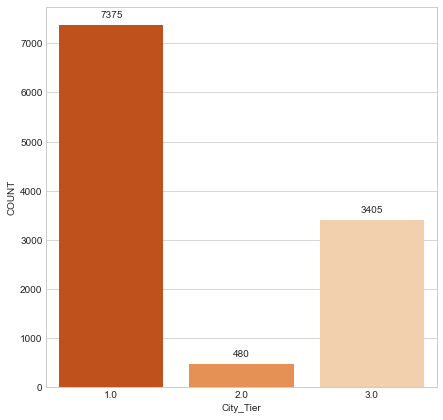

In [91]:
#Visual Representation of Categorical Variables in the dataset
#City_Tier
plot1 = pd.DataFrame(df['City_Tier'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["City_Tier","COUNT"]
fig_dims = (7, 7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='City_Tier',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

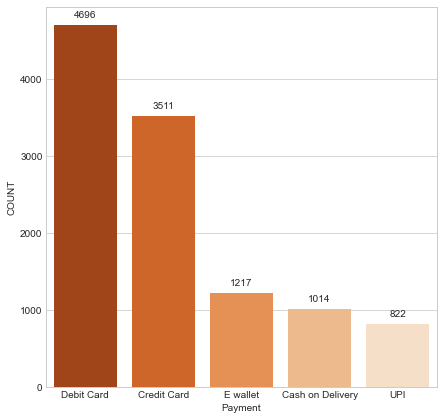

In [92]:
#Visual Representation of Categorical Variables in the dataset
#Payment
plot1 = pd.DataFrame(df['Payment'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["Payment","COUNT"]
fig_dims = (7, 7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Payment',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

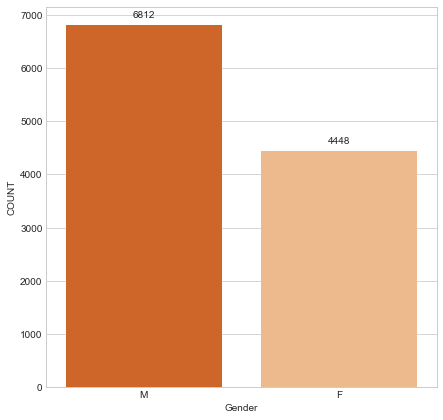

In [93]:
#Visual Representation of Categorical Variables in the dataset
#Gender
plot1 = pd.DataFrame(df['Gender'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["Gender","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Gender',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

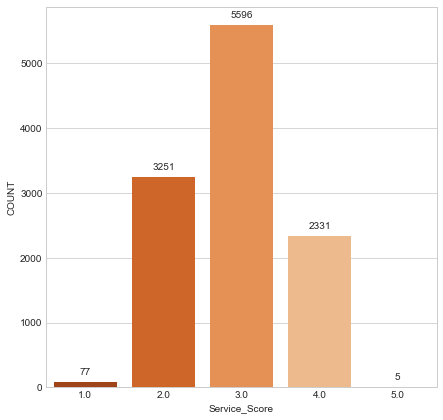

In [94]:
#Visual Representation of Categorical Variables in the dataset
#Service Score
plot1 = pd.DataFrame(df['Service_Score'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["Service_Score","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Service_Score',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

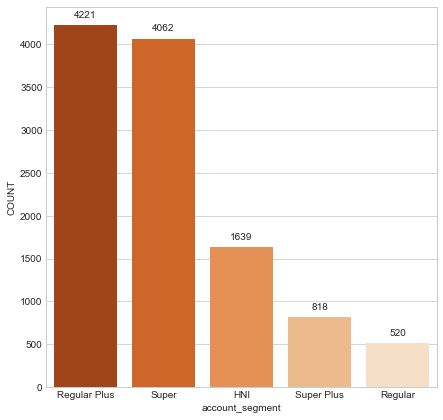

In [95]:
#Visual Representation of Categorical Variables in the dataset
#Account Segment
plot1 = pd.DataFrame(df['account_segment'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["account_segment","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='account_segment',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

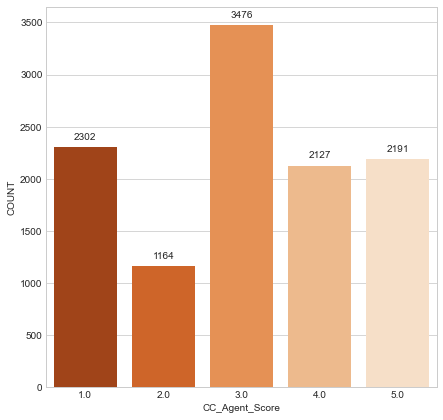

In [96]:
#Visual Representation of Categorical Variables in the dataset
#CC Agent Score
plot1 = pd.DataFrame(df['CC_Agent_Score'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["CC_Agent_Score","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='CC_Agent_Score',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

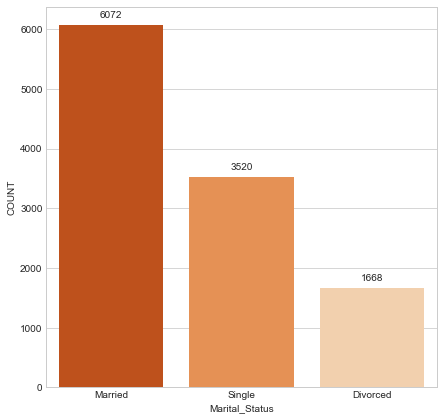

In [97]:
#Visual Representation of Categorical Variables in the dataset
#Marital_Status
plot1 = pd.DataFrame(df['Marital_Status'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["Marital_Status","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Marital_Status',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

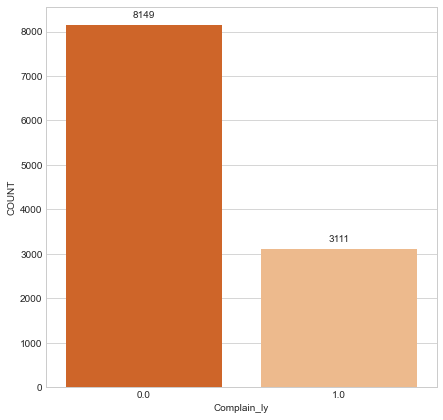

In [98]:
#Visual Representation of Categorical Variables in the dataset
#Complain_ly
plot1 = pd.DataFrame(df['Complain_ly'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["Complain_ly","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Complain_ly',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

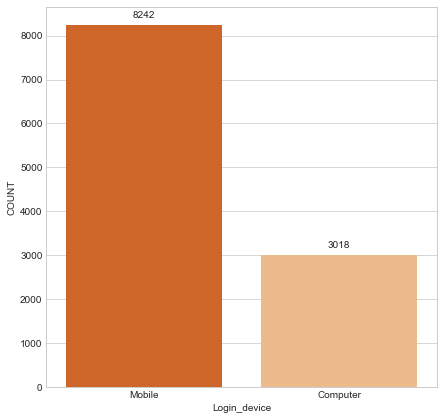

In [99]:
#Visual Representation of Categorical Variables in the dataset
#Login Device
plot1 = pd.DataFrame(df['Login_device'].value_counts())
plot1 = plot1.reset_index()
plot1.columns = ["Login_device","COUNT"]
fig_dims = (7,7)
fig,ax = plt.subplots(figsize=fig_dims)
sns.barplot(x='Login_device',y='COUNT',ax=ax,data=plot1,palette="Oranges_r")
for z in ax.patches:
    ax.annotate(format(z.get_height(), '.0f'), (z.get_x() + z.get_width() / 2., z.get_height()), 
       ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
plt.show()

#### Numeric Variables

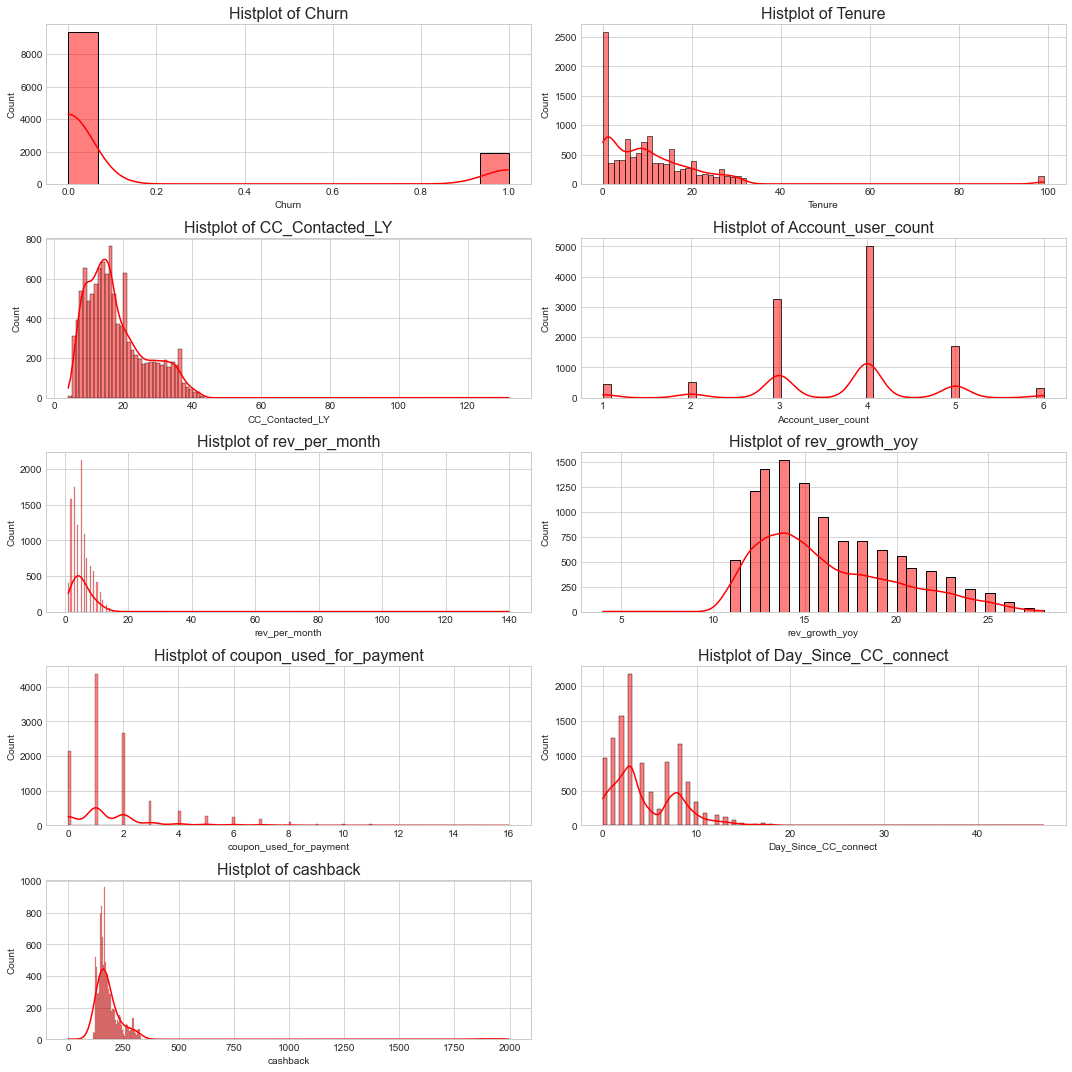

In [100]:
plt.figure(figsize = (15,15))
feature_list = numerical_features
for i in range(len(feature_list)):
    plt.subplot(5, 2, i + 1)
    sns.histplot(x = df[feature_list[i]], data = df,color="red",kde=True)
    plt.title('Histplot of {}'.format(feature_list[i]))
    plt.tight_layout()

Text(0.5, 1.0, 'Frequency of Customer Contacting Customer Care')

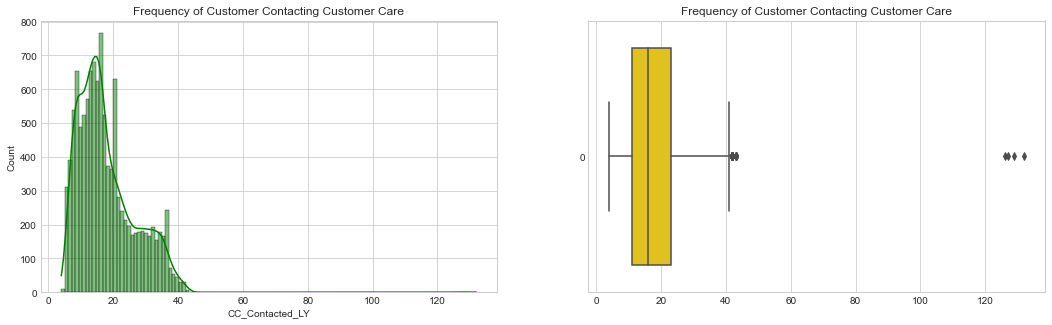

In [101]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['CC_Contacted_LY'] , ax=axes[0],kde=True,color='green')
viz.set_title("Frequency of Customer Contacting Customer Care",fontsize=12)
viz = sns.boxplot(data = df['CC_Contacted_LY'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Frequency of Customer Contacting Customer Care",fontsize=12)

Text(0.5, 1.0, 'Tenure/Age of the Account')

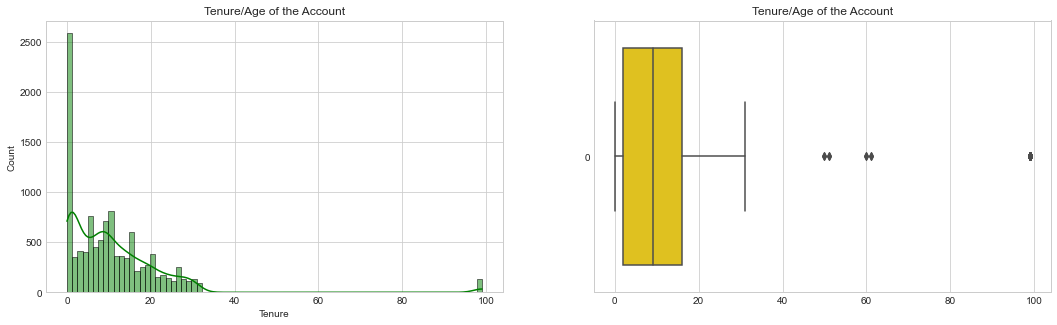

In [102]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['Tenure'] , ax=axes[0],kde=True,color='green')
viz.set_title("Tenure/Age of the Account",fontsize=12)
viz = sns.boxplot(data = df['Tenure'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Tenure/Age of the Account",fontsize=12)

Text(0.5, 1.0, 'Number of users tied to the account')

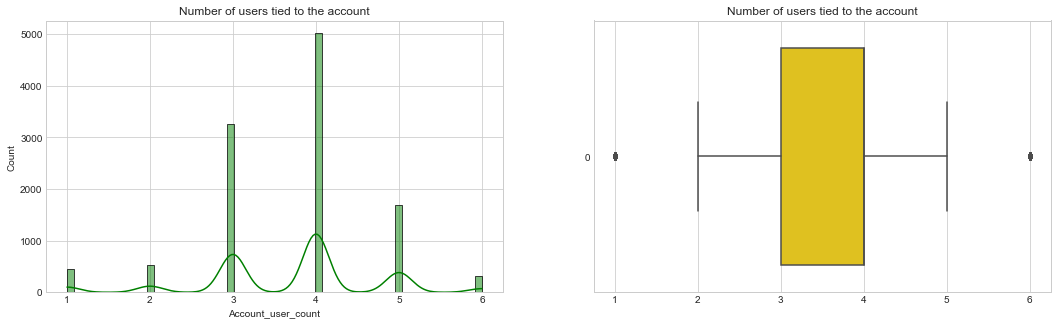

In [103]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['Account_user_count'] , ax=axes[0],kde=True,color='green')
viz.set_title("Number of users tied to the account",fontsize=12)
viz = sns.boxplot(data = df['Account_user_count'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Number of users tied to the account",fontsize=12)

Text(0.5, 1.0, 'Revenue per month from the account in the last 12 months')

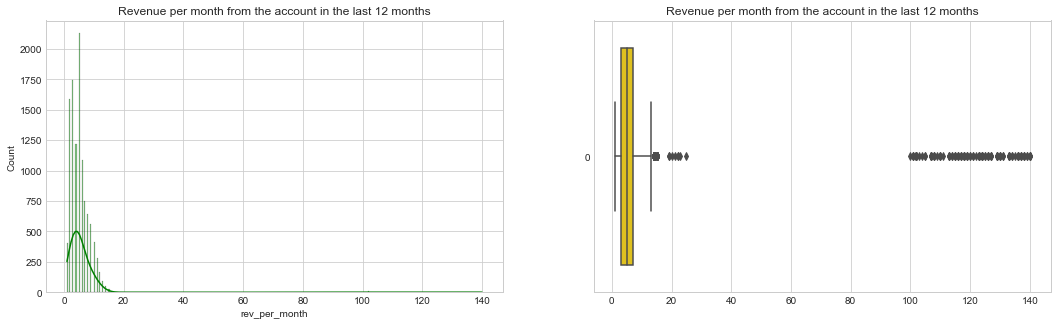

In [104]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['rev_per_month'] , ax=axes[0],kde=True,color='green')
viz.set_title("Revenue per month from the account in the last 12 months",fontsize=12)
viz = sns.boxplot(data = df['rev_per_month'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Revenue per month from the account in the last 12 months",fontsize=12)

Text(0.5, 1.0, 'Revenue growth % of the account')

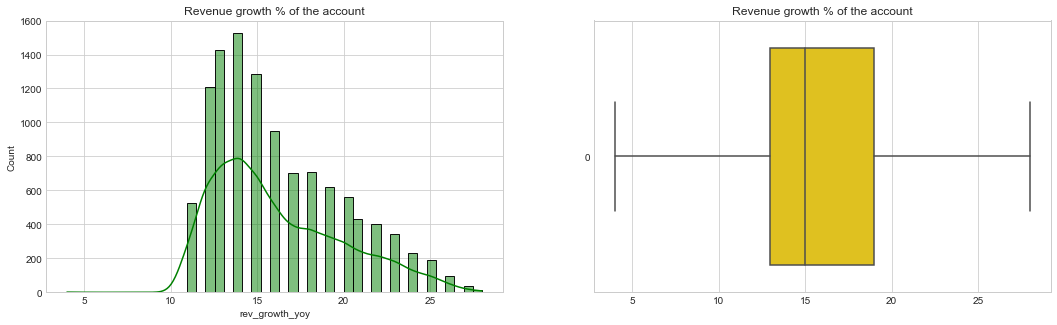

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['rev_growth_yoy'] , ax=axes[0],kde=True,color='green')
viz.set_title("Revenue growth % of the account",fontsize=12)
viz = sns.boxplot(data = df['rev_growth_yoy'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Revenue growth % of the account",fontsize=12)

Text(0.5, 1.0, 'Frequncy of customer using coupons before checkout in the last 12 months')

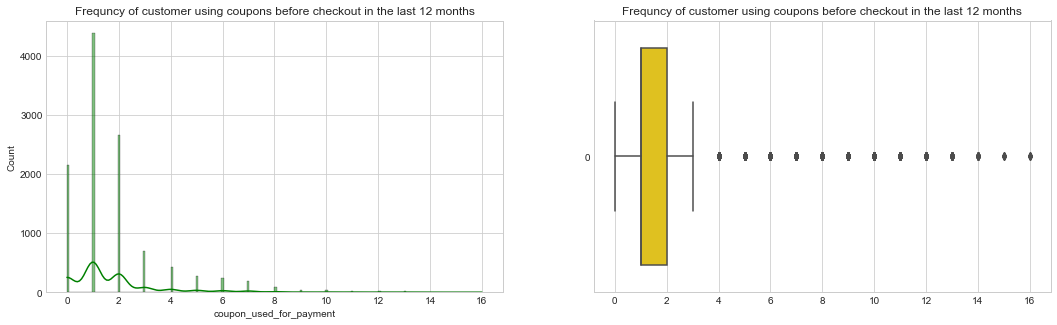

In [106]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['coupon_used_for_payment'] , ax=axes[0],kde=True,color='green')
viz.set_title("Frequncy of customer using coupons before checkout in the last 12 months",fontsize=12)
viz = sns.boxplot(data = df['coupon_used_for_payment'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Frequncy of customer using coupons before checkout in the last 12 months",fontsize=12)

Text(0.5, 1.0, 'Recency of Customer Connect by Users - Lower the better')

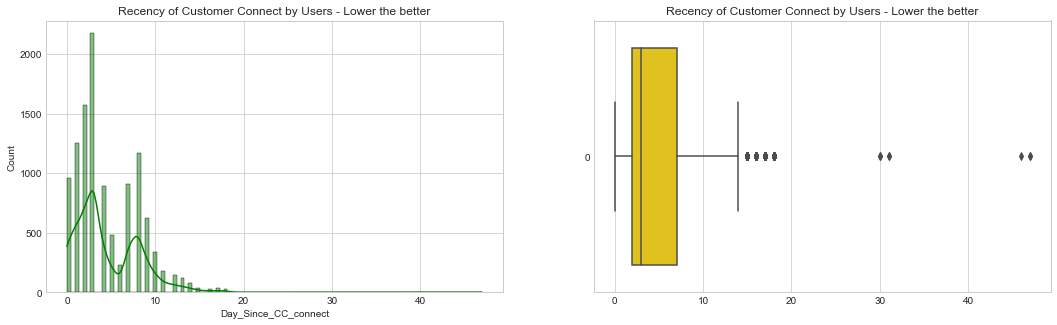

In [107]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['Day_Since_CC_connect'] , ax=axes[0],kde=True,color='green')
viz.set_title("Recency of Customer Connect by Users - Lower the better",fontsize=12)
viz = sns.boxplot(data = df['Day_Since_CC_connect'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Recency of Customer Connect by Users - Lower the better",fontsize=12)

Text(0.5, 1.0, 'Monetary Value Received - Loyalty Rewards')

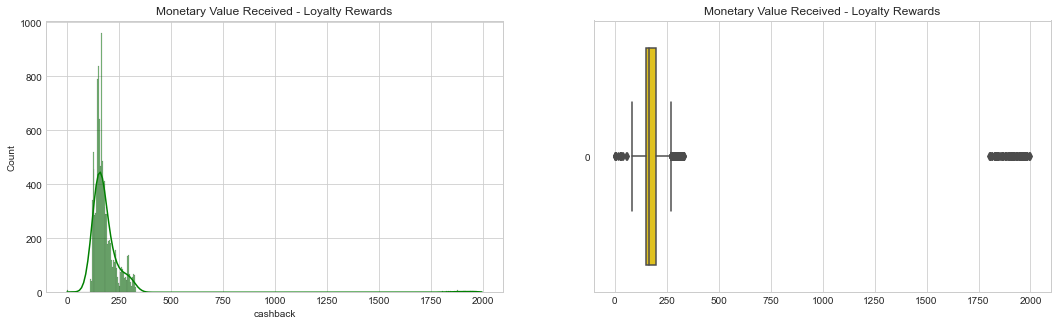

In [108]:
fig, axes = plt.subplots(nrows=1,ncols=2)
fig.set_size_inches(18,5)

viz = sns.histplot(data = df['cashback'] , ax=axes[0],kde=True,color='green')
viz.set_title("Monetary Value Received - Loyalty Rewards",fontsize=12)
viz = sns.boxplot(data = df['cashback'] , orient = "h" , ax=axes[1],color='gold')
viz.set_title("Monetary Value Received - Loyalty Rewards",fontsize=12)

### BIVARIATE CHARTS

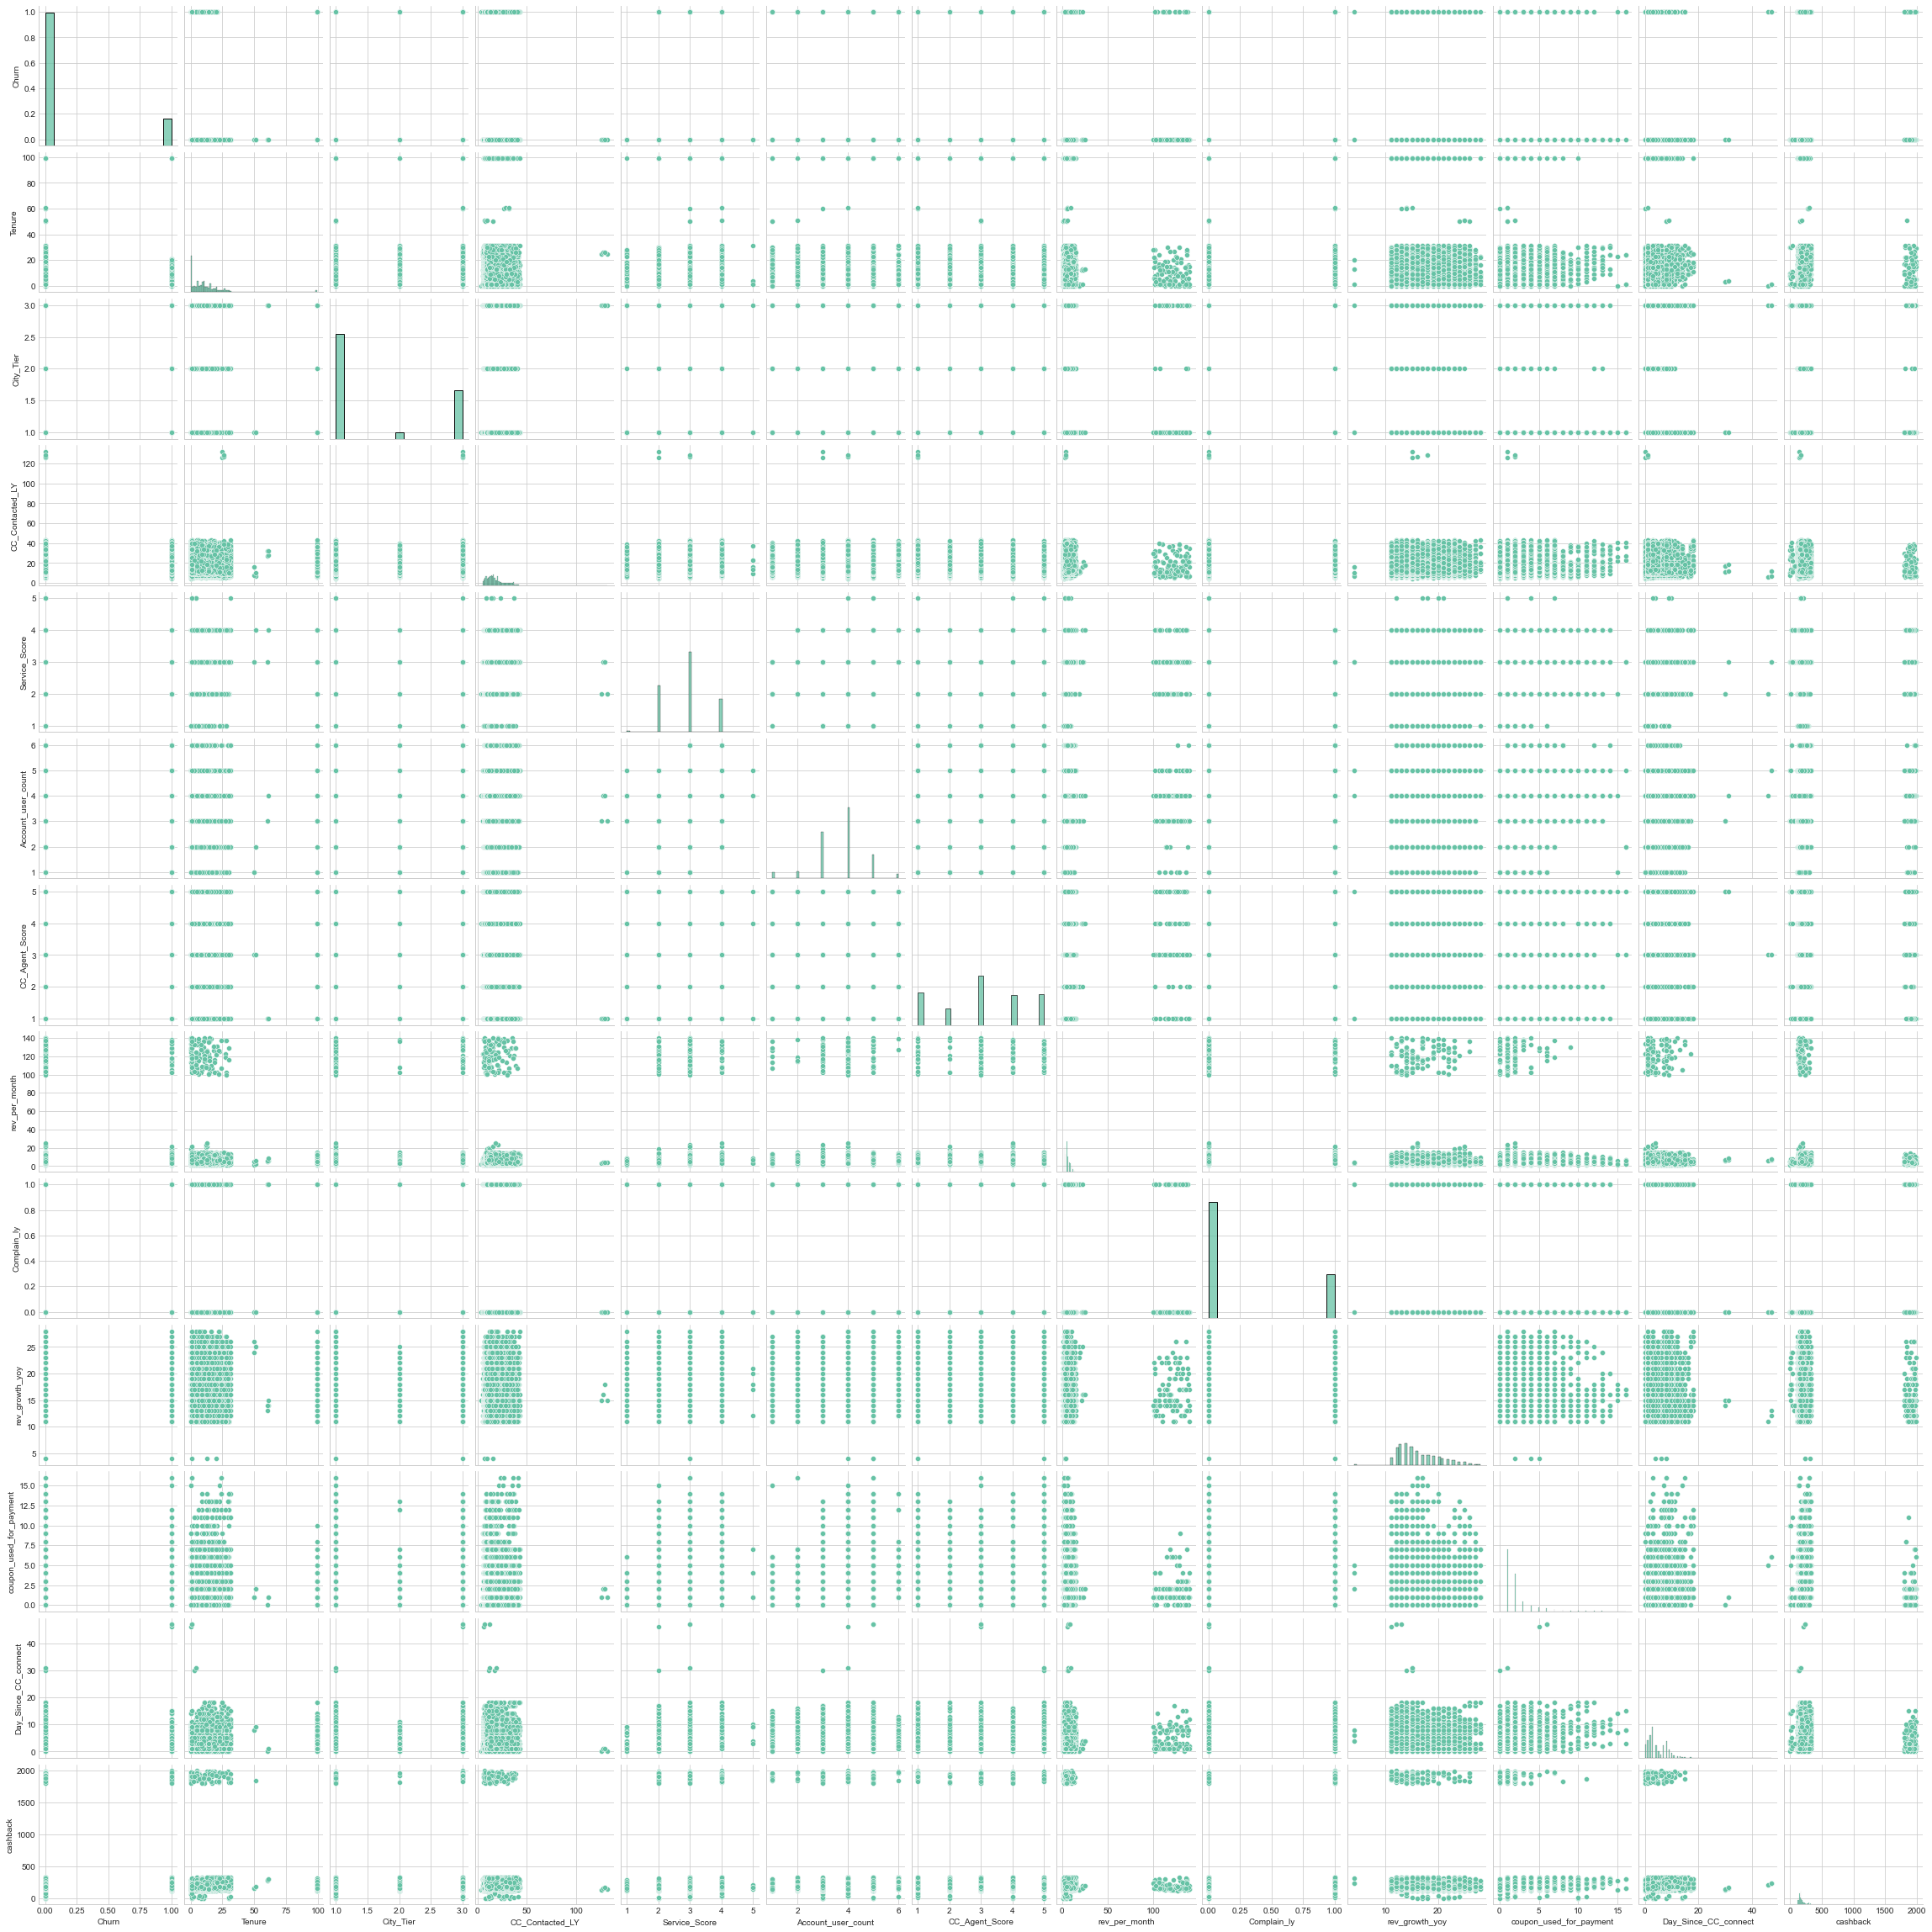

In [109]:
sns.pairplot(df,kind='scatter');

### NUMERIC Vs NUMERIC

#### Tenure Vs Revenue Per Month

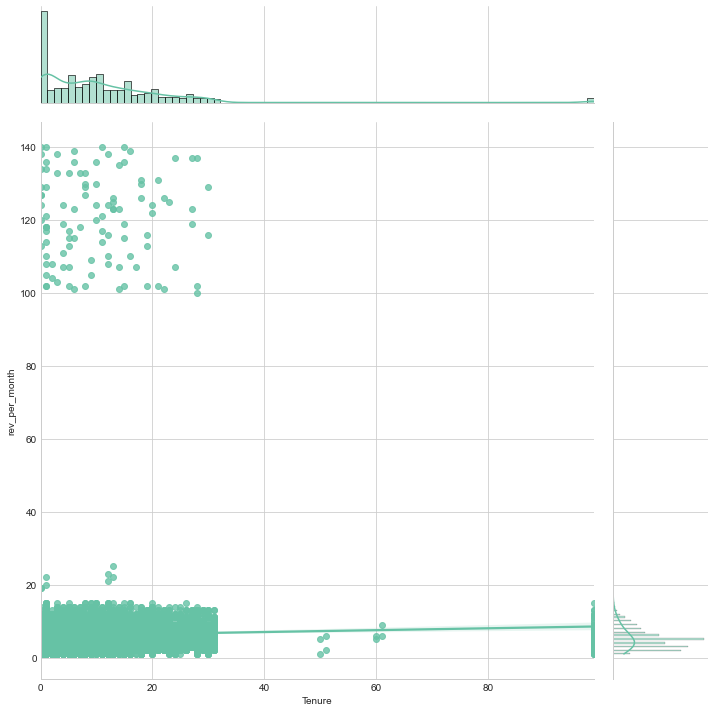

In [110]:
sns.jointplot('Tenure', 'rev_per_month', data = df, kind='reg', height=10)
plt.show()

#### Tenure Vs Revenue Growth YoY %

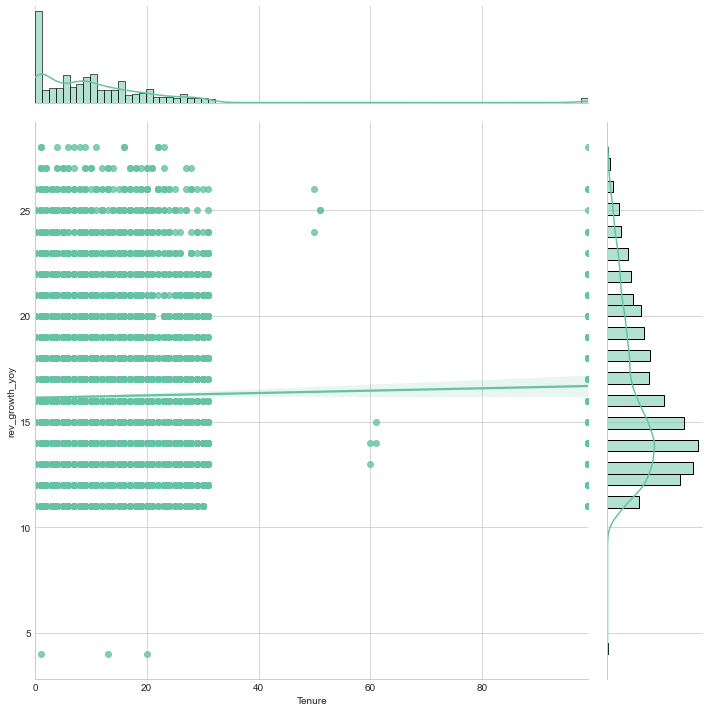

In [111]:
sns.jointplot('Tenure', 'rev_growth_yoy', data = df, kind='reg', height=10)
plt.show()

#### Tenure Vs Frequency of Customers Using Coupons before Checkout

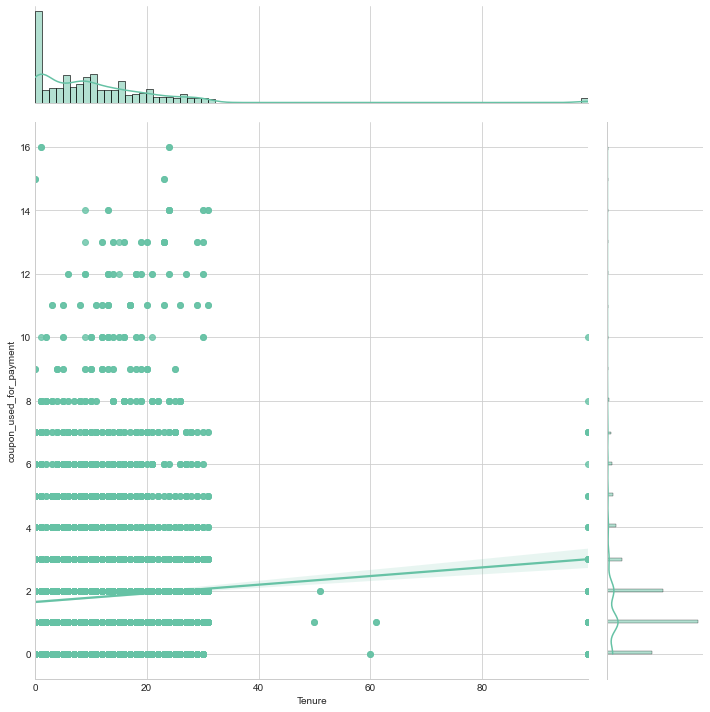

In [112]:
sns.jointplot('Tenure', 'coupon_used_for_payment', data = df, kind='reg', height=10)
plt.show()

#### Tenure Vs Cashback

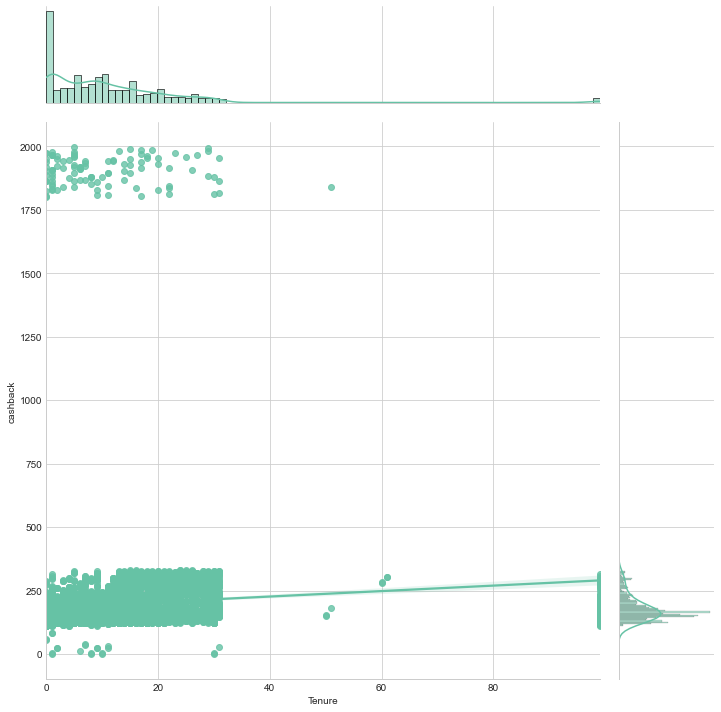

In [113]:
sns.jointplot('Tenure', 'cashback', data = df, kind='reg', height=10)
plt.show()

#### Tenure Vs Day Since CC Connect - Recency of Customer Care Connect by customers

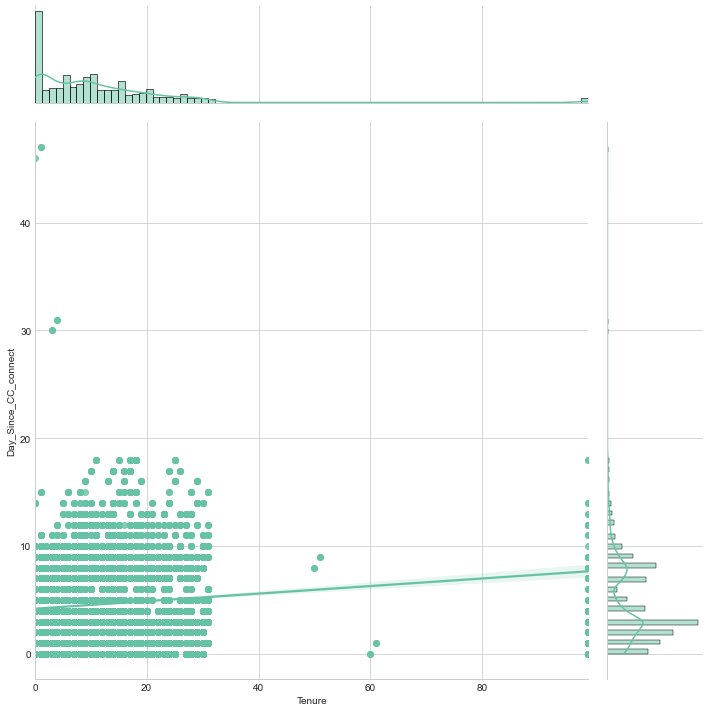

In [114]:
sns.jointplot('Tenure', 'Day_Since_CC_connect', data = df, kind='reg', height=10)
plt.show()

#### Tenure Vs Number of Users Tied to an account

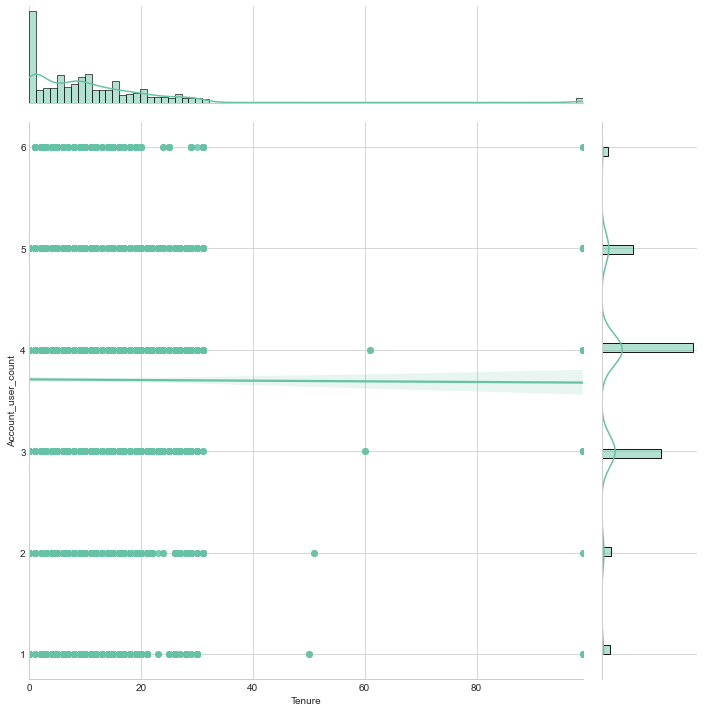

In [115]:
sns.jointplot('Tenure', 'Account_user_count', data = df, kind='reg', height=10)
plt.show()

#### Tenure Vs Frequncy of the times customer contacted customer care

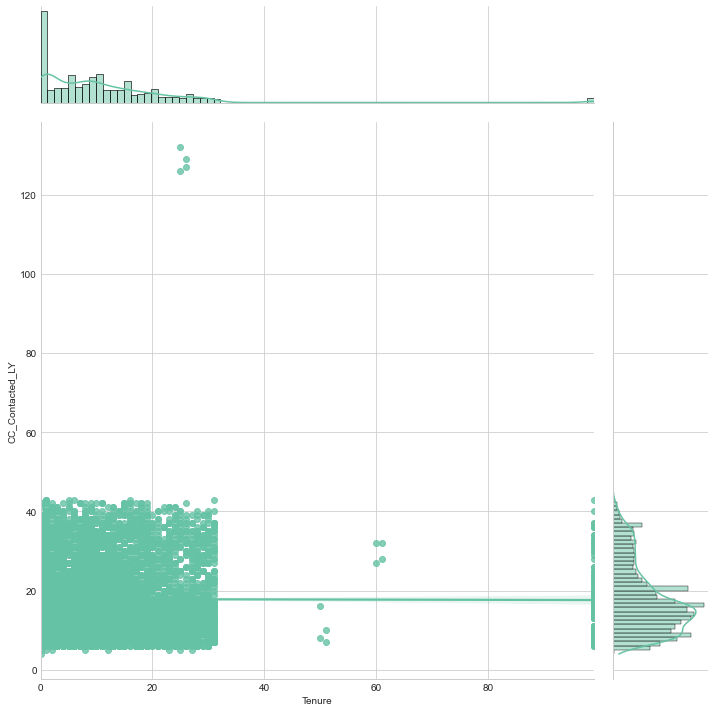

In [116]:
sns.jointplot('Tenure', 'CC_Contacted_LY', data = df, kind='reg', height=10)
plt.show()

#### Cashback Vs Coupons Used for Payments

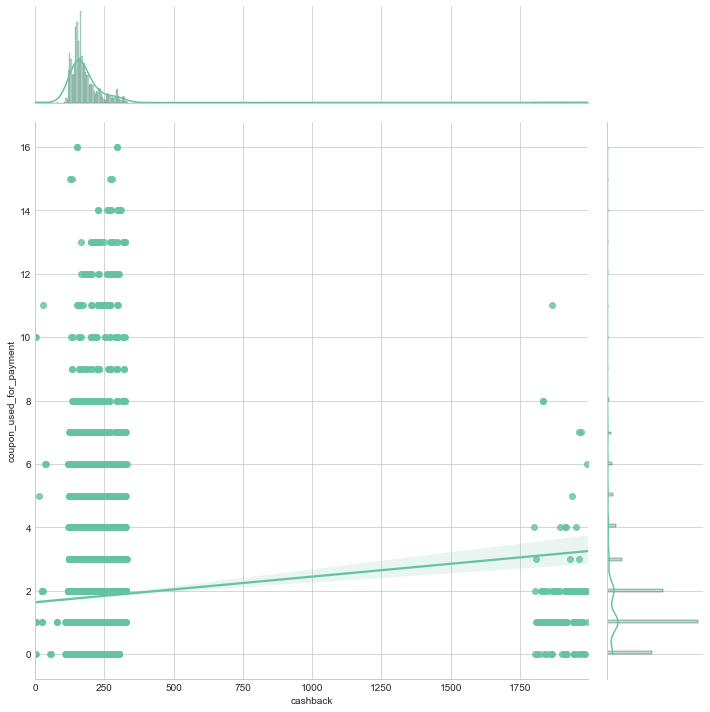

In [117]:
sns.jointplot('cashback', 'coupon_used_for_payment', data = df, kind='reg', height=10)
plt.show()

#### Recency of Customer Care Connect Vs Coupon Used for Payment

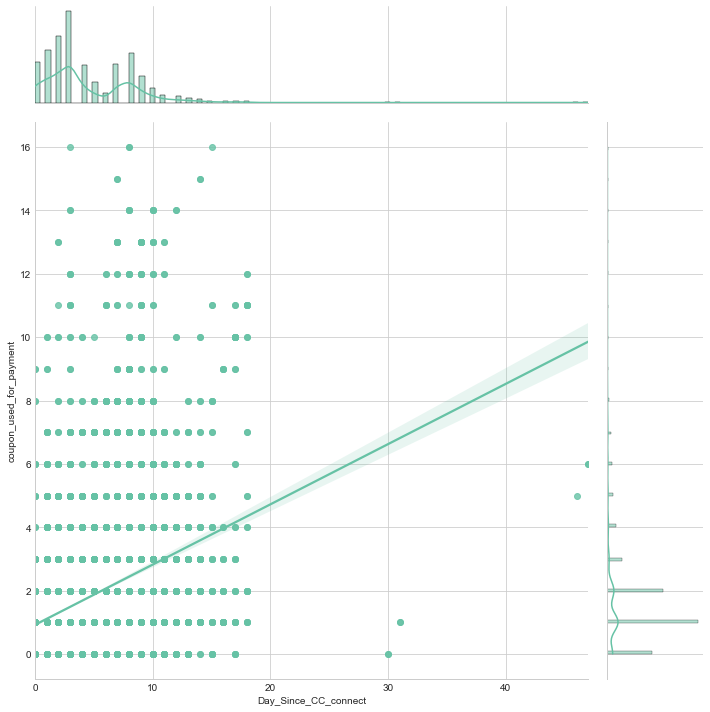

In [118]:
sns.jointplot('Day_Since_CC_connect', 'coupon_used_for_payment', data = df, kind='reg', height=10)
plt.show()

#### Cashback Vs Revenue per month

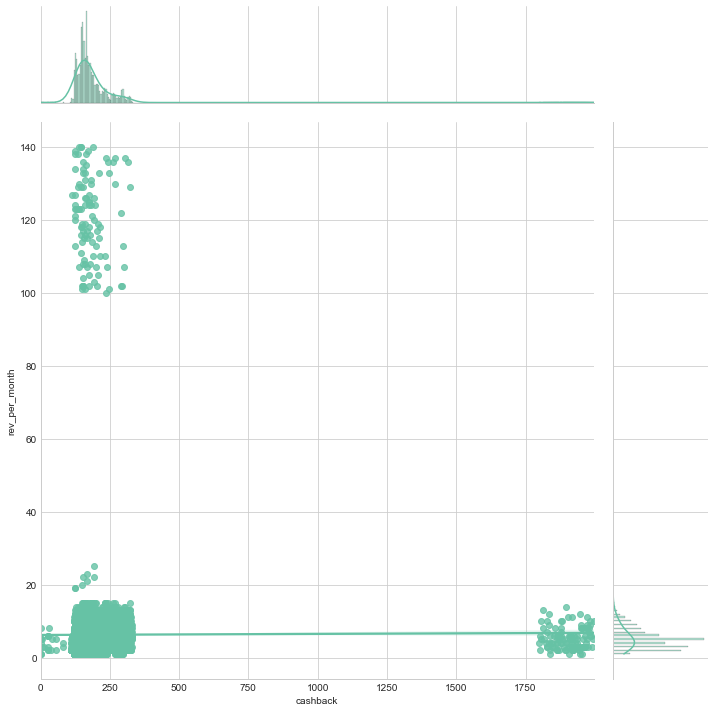

In [119]:
sns.jointplot('cashback', 'rev_per_month', data = df, kind='reg', height=10)
plt.show()

#### Cashback vs Number of users per account

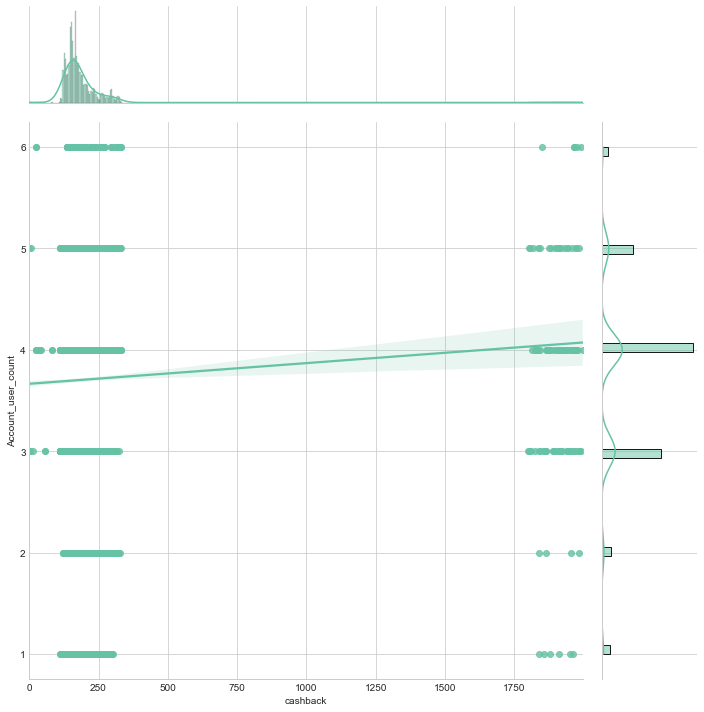

In [120]:
sns.jointplot('cashback', 'Account_user_count', data = df, kind='reg', height=10)
plt.show()

### CATEGORICAL VS CATEGORICAL | NUMERIC

#### GENDER Vs

Marital_Status  Divorced  Married  Single
Gender                                   
F                    678     2291    1479
M                    990     3781    2041

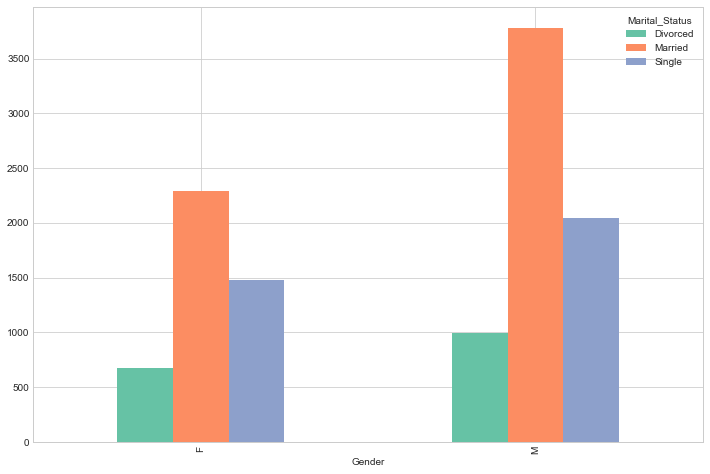

In [121]:
pd.crosstab(df['Gender'], df['Marital_Status']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['Marital_Status'])

Payment  Cash on Delivery  Credit Card  Debit Card  E wallet  UPI
Gender                                                           
F                     386         1433        1843       522  264
M                     628         2078        2853       695  558

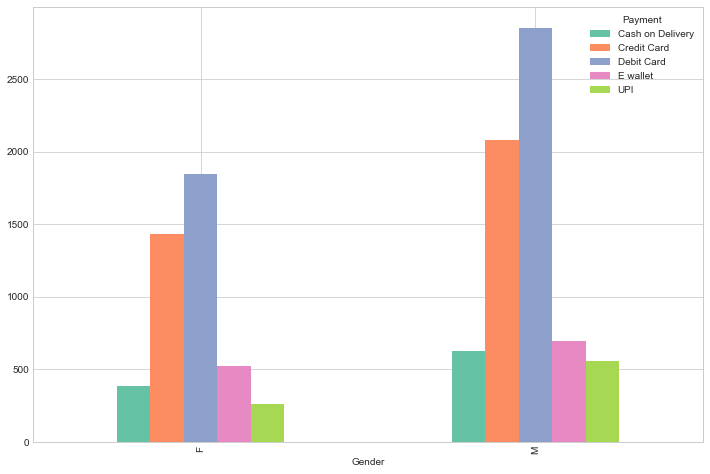

In [122]:
pd.crosstab(df['Gender'], df['Payment']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['Payment'])

account_segment  HNI  Regular  Regular Plus  Super  Super Plus
Gender                                                        
F                701      169          1533   1657         388
M                938      351          2688   2405         430

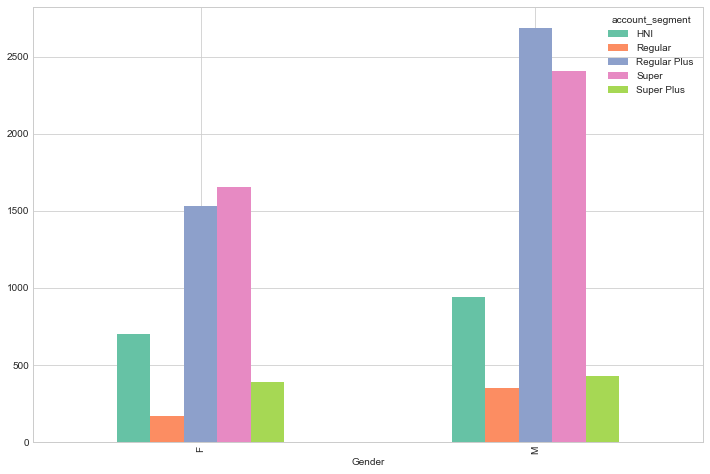

In [123]:
pd.crosstab(df['Gender'], df['account_segment']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['account_segment'])

Service_Score  1.0   2.0   3.0   4.0  5.0
Gender                                   
F               40  1245  2199   961    3
M               37  2006  3397  1370    2

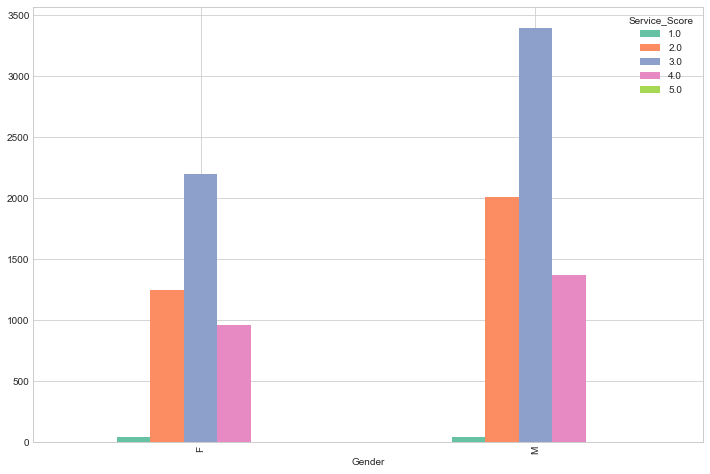

In [124]:
pd.crosstab(df['Gender'], df['Service_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['Service_Score'])

CC_Agent_Score   1.0  2.0   3.0   4.0   5.0
Gender                                     
F                835  437  1398   894   884
M               1467  727  2078  1233  1307

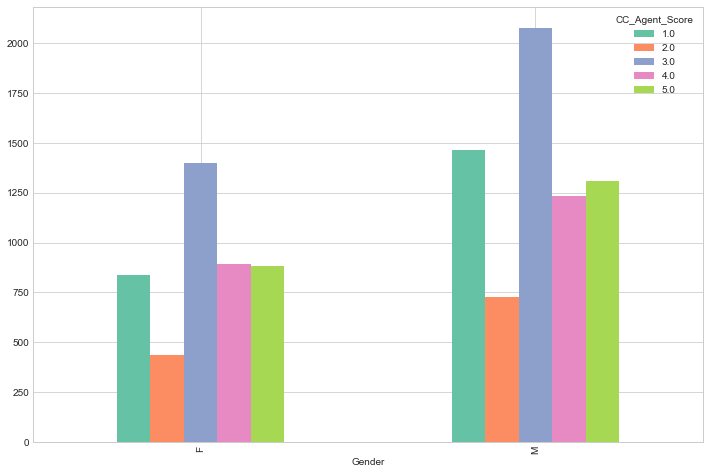

In [125]:
pd.crosstab(df['Gender'], df['CC_Agent_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['CC_Agent_Score'])

Login_device  Computer  Mobile
Gender                        
F                 1163    3285
M                 1855    4957

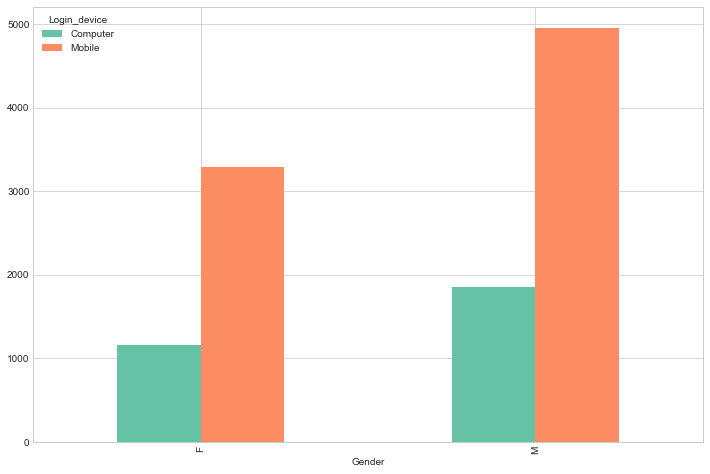

In [126]:
pd.crosstab(df['Gender'], df['Login_device']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['Login_device'])

Complain_ly   0.0   1.0
Gender                 
F            3131  1317
M            5018  1794

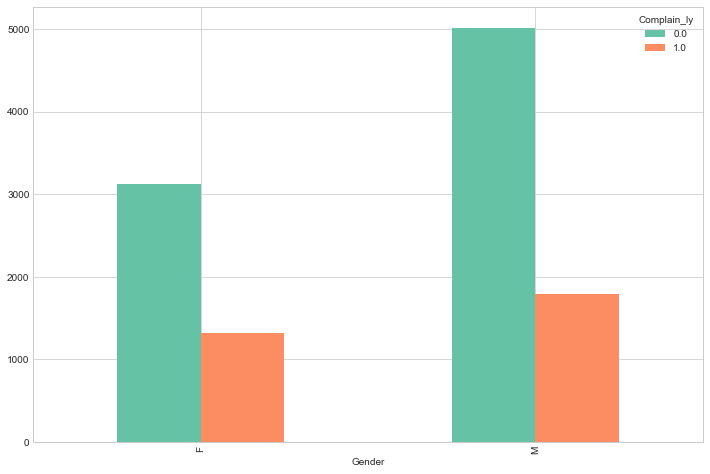

In [127]:
pd.crosstab(df['Gender'], df['Complain_ly']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['Complain_ly'])

City_Tier   1.0  2.0   3.0
Gender                    
F          2872  145  1431
M          4503  335  1974

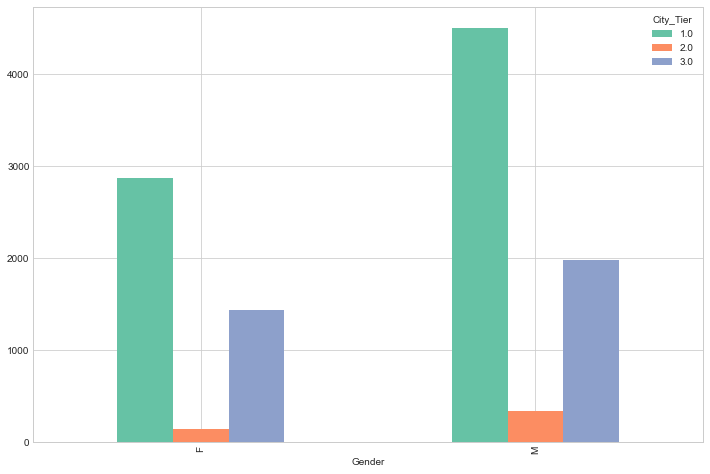

In [128]:
pd.crosstab(df['Gender'], df['City_Tier']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Gender'], df['City_Tier'])

#### MARITAL STATUS Vs

Payment         Cash on Delivery  Credit Card  Debit Card  E wallet  UPI
Marital_Status                                                          
Divorced                     151          512         684       211  110
Married                      521         1919        2477       660  495
Single                       342         1080        1535       346  217

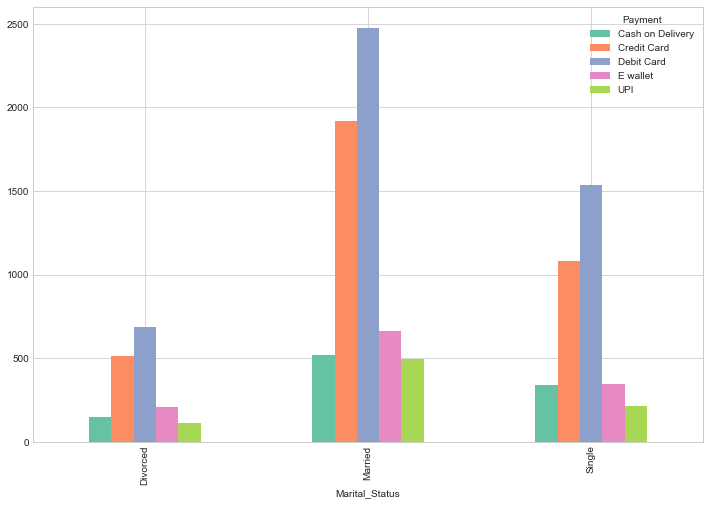

In [129]:
pd.crosstab(df['Marital_Status'], df['Payment']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['Payment'])

Complain_ly      0.0   1.0
Marital_Status            
Divorced        1200   468
Married         4404  1668
Single          2545   975

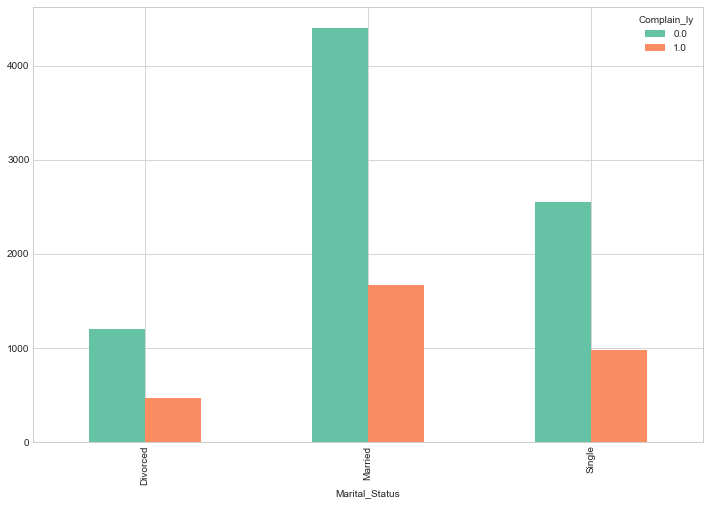

In [130]:
pd.crosstab(df['Marital_Status'], df['Complain_ly']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['Complain_ly'])

City_Tier        1.0  2.0   3.0
Marital_Status                 
Divorced        1067   67   534
Married         4031  315  1726
Single          2277   98  1145

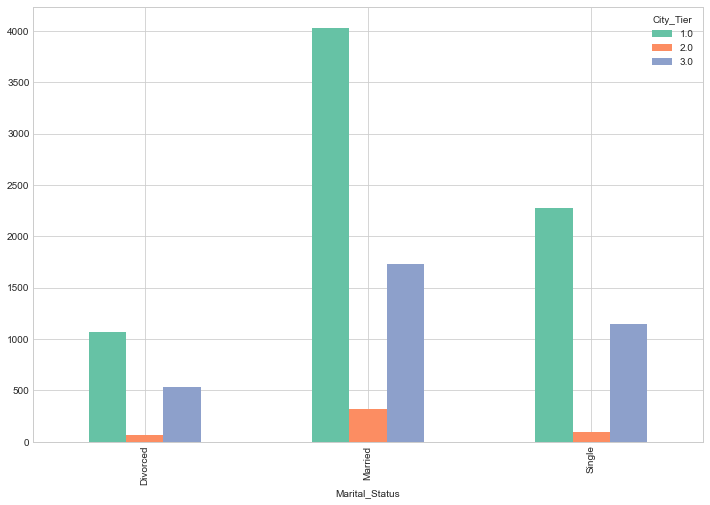

In [131]:
pd.crosstab(df['Marital_Status'], df['City_Tier']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['City_Tier'])

account_segment  HNI  Regular  Regular Plus  Super  Super Plus
Marital_Status                                                
Divorced         247       95           591    576         159
Married          940      308          2091   2280         453
Single           452      117          1539   1206         206

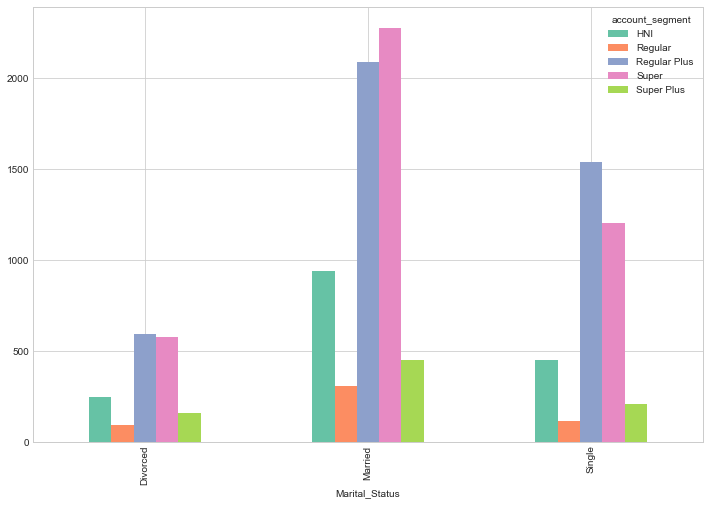

In [132]:
pd.crosstab(df['Marital_Status'], df['account_segment']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['account_segment'])

Service_Score   1.0   2.0   3.0   4.0  5.0
Marital_Status                            
Divorced         10   464   828   366    0
Married          36  1688  3021  1325    2
Single           31  1099  1747   640    3

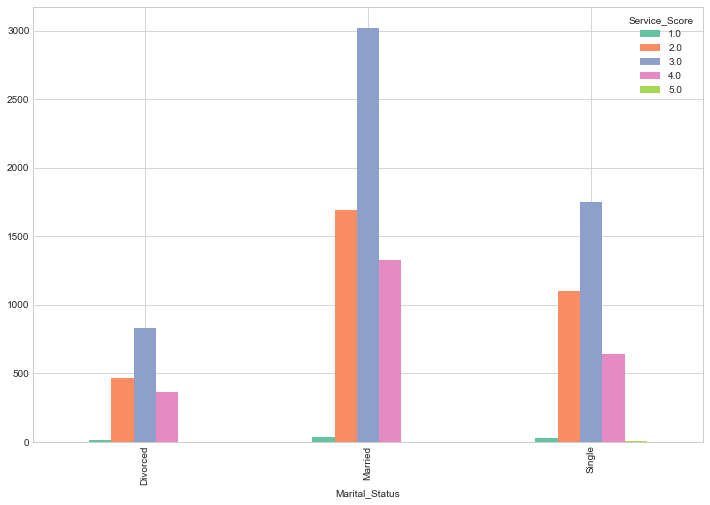

In [133]:
pd.crosstab(df['Marital_Status'], df['Service_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['Service_Score'])

CC_Agent_Score   1.0  2.0   3.0   4.0   5.0
Marital_Status                             
Divorced           8  500   544   298   318
Married         1545  264  1897  1160  1206
Single           749  400  1035   669   667

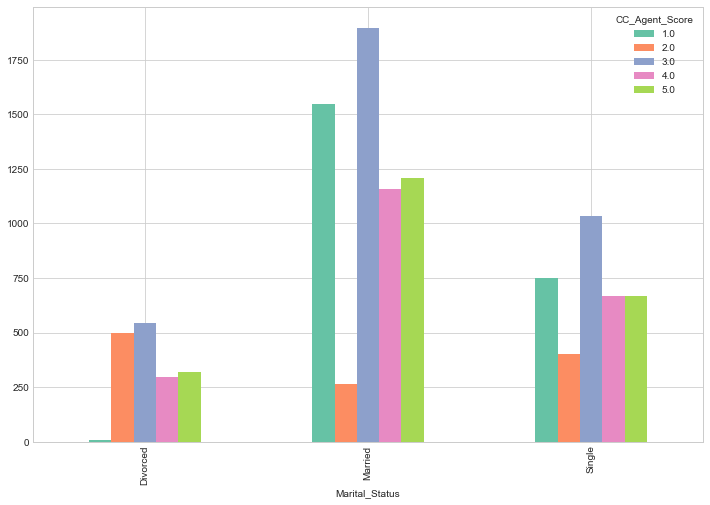

In [134]:
pd.crosstab(df['Marital_Status'], df['CC_Agent_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['CC_Agent_Score'])

Login_device    Computer  Mobile
Marital_Status                  
Divorced             387    1281
Married             1656    4416
Single               975    2545

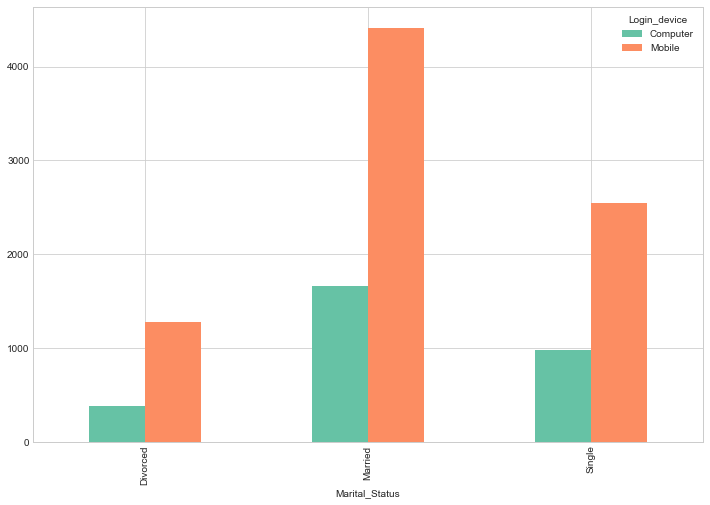

In [135]:
pd.crosstab(df['Marital_Status'], df['Login_device']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['Marital_Status'], df['Login_device'])

#### ACCOUNT SEGMENT Vs

Service_Score    1.0   2.0   3.0  4.0  5.0
account_segment                           
HNI               11   454   816  357    1
Regular            0   166   262   92    0
Regular Plus      19  1176  2114  910    2
Super             37  1190  2002  831    2
Super Plus        10   265   402  141    0

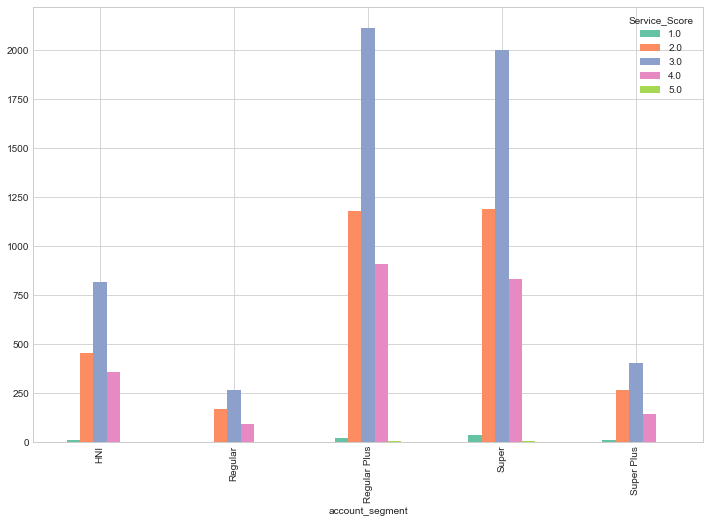

In [136]:
pd.crosstab(df['account_segment'], df['Service_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['account_segment'], df['Service_Score'])

CC_Agent_Score   1.0  2.0   3.0  4.0  5.0
account_segment                          
HNI              332  169   495  290  353
Regular           91   43   192  120   74
Regular Plus     843  430  1297  835  816
Super            870  422  1274  711  785
Super Plus       166  100   218  171  163

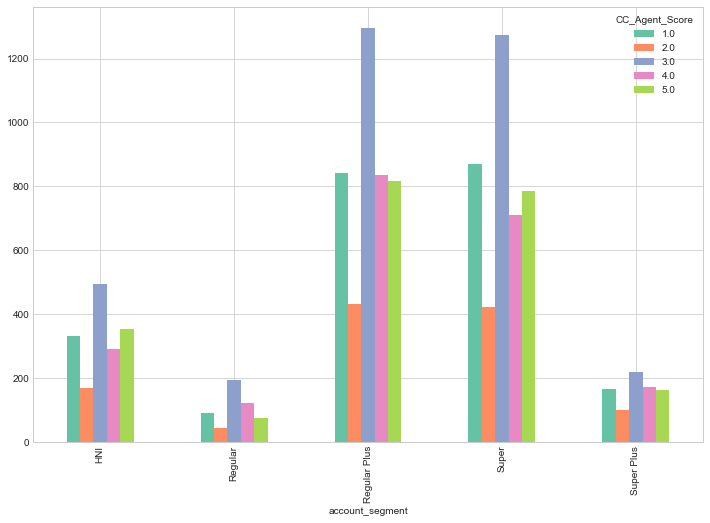

In [137]:
pd.crosstab(df['account_segment'], df['CC_Agent_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['account_segment'], df['CC_Agent_Score'])

Complain_ly       0.0   1.0
account_segment            
HNI              1172   467
Regular           391   129
Regular Plus     3027  1194
Super            2987  1075
Super Plus        572   246

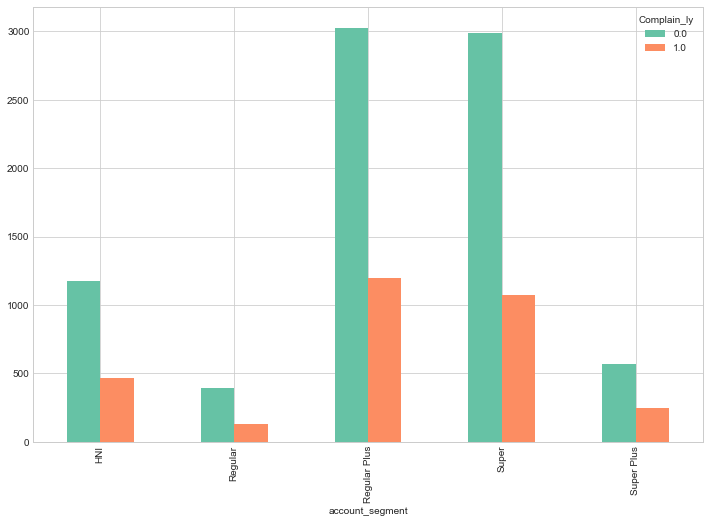

In [138]:
pd.crosstab(df['account_segment'], df['Complain_ly']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['account_segment'], df['Complain_ly'])

account_segment  HNI  Regular  Regular Plus  Super  Super Plus
City_Tier                                                     
1.0              973      370          3345   2152         535
2.0               47       51           261     93          28
3.0              619       99           615   1817         255

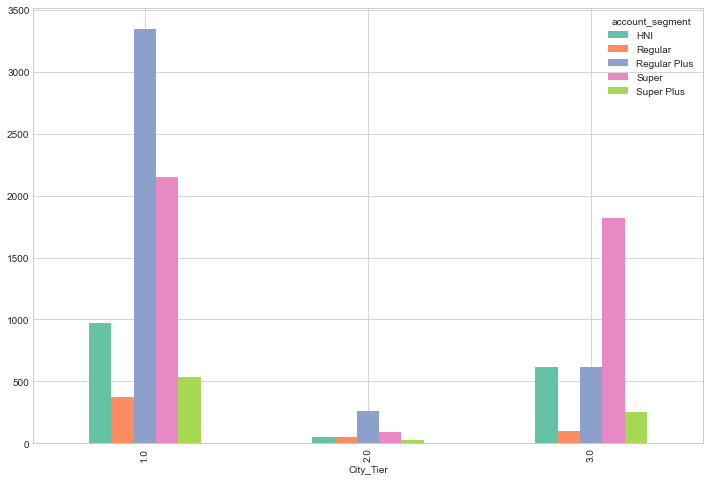

In [139]:
pd.crosstab(df['City_Tier'], df['account_segment']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['City_Tier'], df['account_segment'])

Service_Score  1.0   2.0   3.0   4.0  5.0
City_Tier                                
1.0             57  2093  3662  1559    4
2.0              2   161   240    77    0
3.0             18   997  1694   695    1

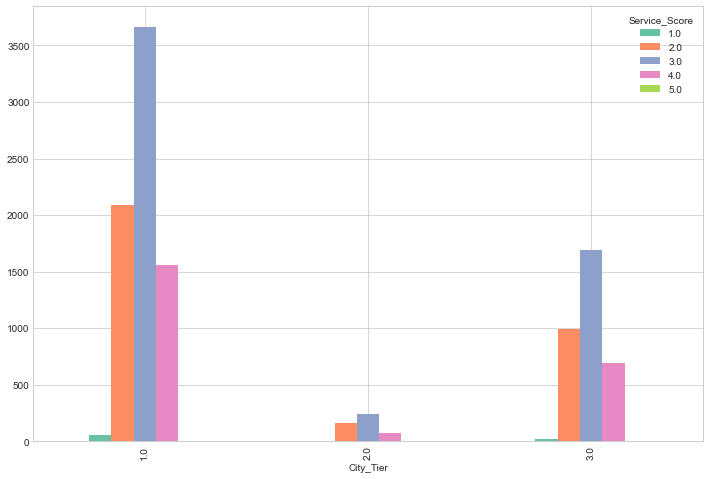

In [140]:
pd.crosstab(df['City_Tier'], df['Service_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['City_Tier'], df['Service_Score'])

CC_Agent_Score   1.0  2.0   3.0   4.0   5.0
City_Tier                                  
1.0             1469  766  2365  1312  1463
2.0              100   20   120   154    86
3.0              733  378   991   661   642

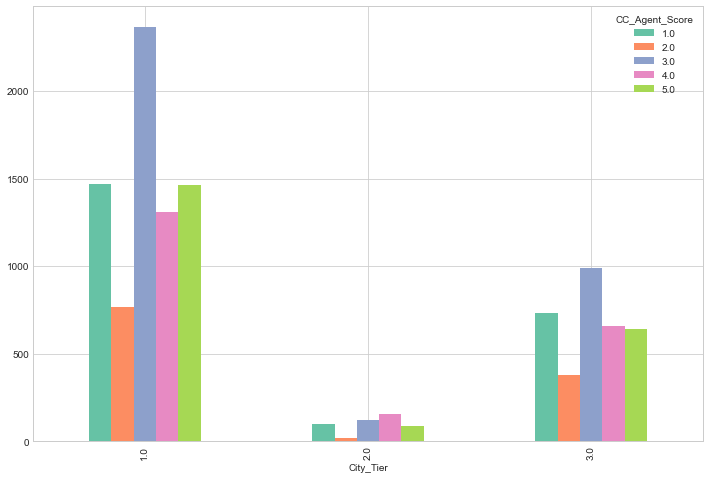

In [141]:
pd.crosstab(df['City_Tier'], df['CC_Agent_Score']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['City_Tier'], df['CC_Agent_Score'])

Complain_ly   0.0   1.0
City_Tier              
1.0          5335  2040
2.0           365   115
3.0          2449   956

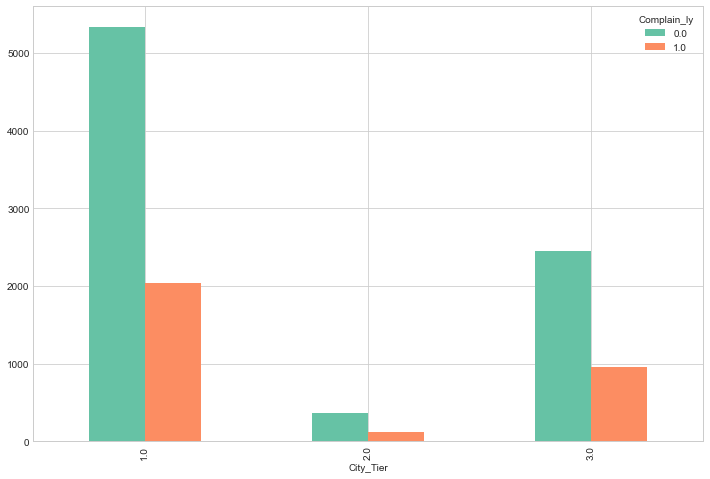

In [142]:
pd.crosstab(df['City_Tier'], df['Complain_ly']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['City_Tier'], df['Complain_ly'])

Payment    Cash on Delivery  Credit Card  Debit Card  E wallet  UPI
City_Tier                                                          
1.0                     732         2740        3407        12  484
2.0                      31          100         123         0  226
3.0                     251          671        1166      1205  112

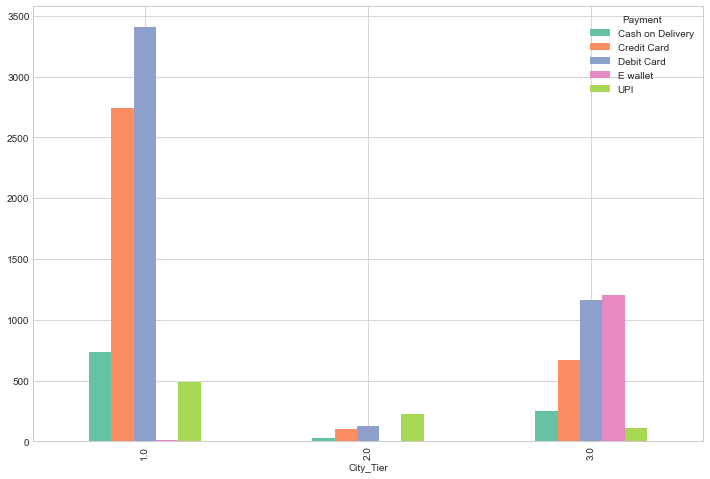

In [143]:
pd.crosstab(df['City_Tier'], df['Payment']).plot(kind = 'bar', stacked = False)
pd.crosstab(df['City_Tier'], df['Payment'])

### OUTPUT TO TABLEAU AND KNIME TO PERFORM MULTIVARIATE ANALYSIS AND RFM ANALYSIS

In [144]:
df.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  
0                   5.0    159.93       Mobile  
1                   0.0    120.90       Mobile  
2                   3.0    165.25       Mobile  
3                   3.0    134.07       Mobile  
4                   3.0    129.60       Mobile

In [145]:
df_original =pd.read_excel("Customer Churn Data.xlsx",sheet_name = 'Data for DSBA')

In [146]:
df_original.head()

AccountID  Churn Tenure  City_Tier  CC_Contacted_LY      Payment  Gender  \
0      20000      1      4        3.0              6.0   Debit Card  Female   
1      20001      1      0        1.0              8.0          UPI    Male   
2      20002      1      0        1.0             30.0   Debit Card    Male   
3      20003      1      0        3.0             15.0   Debit Card    Male   
4      20004      1      0        1.0             12.0  Credit Card    Male   

   Service_Score Account_user_count account_segment  CC_Agent_Score  \
0            3.0                  3           Super             2.0   
1            3.0                  4    Regular Plus             3.0   
2            2.0                  4    Regular Plus             3.0   
3            2.0                  4           Super             5.0   
4            2.0                  3    Regular Plus             5.0   

  Marital_Status rev_per_month  Complain_ly rev_growth_yoy  \
0         Single             9          1.0             11   
1         Single             7          1.0             15   
2         Single             6          1.0             14   
3         Single             8          0.0             23   
4         Single             3          0.0             11   

  coupon_used_for_payment Day_Since_CC_connect cashback Login_device  
0                       1                    5   159.93       Mobile  
1                       0                    0    120.9       Mobile  
2                       0                    3      NaN       Mobile  
3                       0                    3   134.07       Mobile  
4                       1                    3    129.6       Mobile

In [147]:
Account_ID = pd.DataFrame(df_original['AccountID'])

In [148]:
df_knime = df.join(Account_ID)

In [149]:
df_knime.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  AccountID  
0                   5.0    159.93       Mobile      20000  
1                   0.0    120.90       Mobile      20001  
2                   3.0    165.25       Mobile      20002  
3                   3.0    134.07       Mobile      20003  
4                   3.0    129.60       Mobile      20004

In [150]:
df_knime.to_csv('df.csv')

In [151]:
#Separating the predictors and the target variable
predictors = df.drop('Churn',axis=1)
target = df['Churn']

### CORRELATION

In [152]:
#Correlation Table - Numeric Values
df_corr = predictors.corr()
df_corr

Tenure  CC_Contacted_LY  Account_user_count  \
Tenure                   1.000000        -0.003787           -0.004047   
CC_Contacted_LY         -0.003787         1.000000            0.020288   
Account_user_count      -0.004047         0.020288            1.000000   
rev_per_month            0.028538         0.015033            0.018746   
rev_growth_yoy           0.019049         0.072540            0.066309   
coupon_used_for_payment  0.088450         0.005001            0.142692   
Day_Since_CC_connect     0.122386         0.012781            0.035762   
cashback                 0.078557         0.002673            0.035509   

                         rev_per_month  rev_growth_yoy  \
Tenure                        0.028538        0.019049   
CC_Contacted_LY               0.015033        0.072540   
Account_user_count            0.018746        0.066309   
rev_per_month                 1.000000        0.023595   
rev_growth_yoy                0.023595        1.000000   
coupon_used_for_payment       0.016538        0.018265   
Day_Since_CC_connect          0.000316        0.002017   
cashback                      0.004434       -0.001018   

                         coupon_used_for_payment  Day_Since_CC_connect  \
Tenure                                  0.088450              0.122386   
CC_Contacted_LY                         0.005001              0.012781   
Account_user_count                      0.142692              0.035762   
rev_per_month                           0.016538              0.000316   
rev_growth_yoy                          0.018265              0.002017   
coupon_used_for_payment                 1.000000              0.352570   
Day_Since_CC_connect                    0.352570              1.000000   
cashback                                0.071883              0.085221   

                         cashback  
Tenure                   0.078557  
CC_Contacted_LY          0.002673  
Account_user_count       0.035509  
rev_per_month            0.004434  
rev_growth_yoy          -0.001018  
coupon_used_for_payment  0.071883  
Day_Since_CC_connect     0.085221  
cashback                 1.000000

<AxesSubplot:>

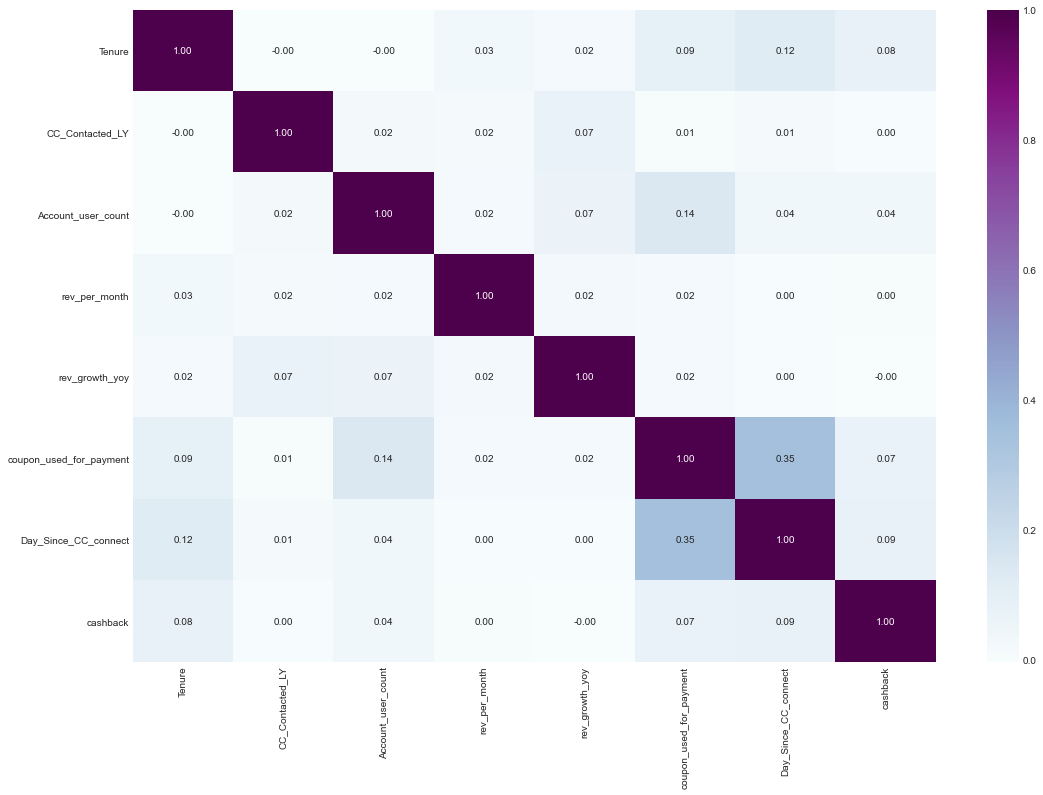

In [153]:
plt.figure(figsize=(18,12))
sns.heatmap(df_corr, annot=True, fmt = '.2f',cmap='BuPu')

<AxesSubplot:>

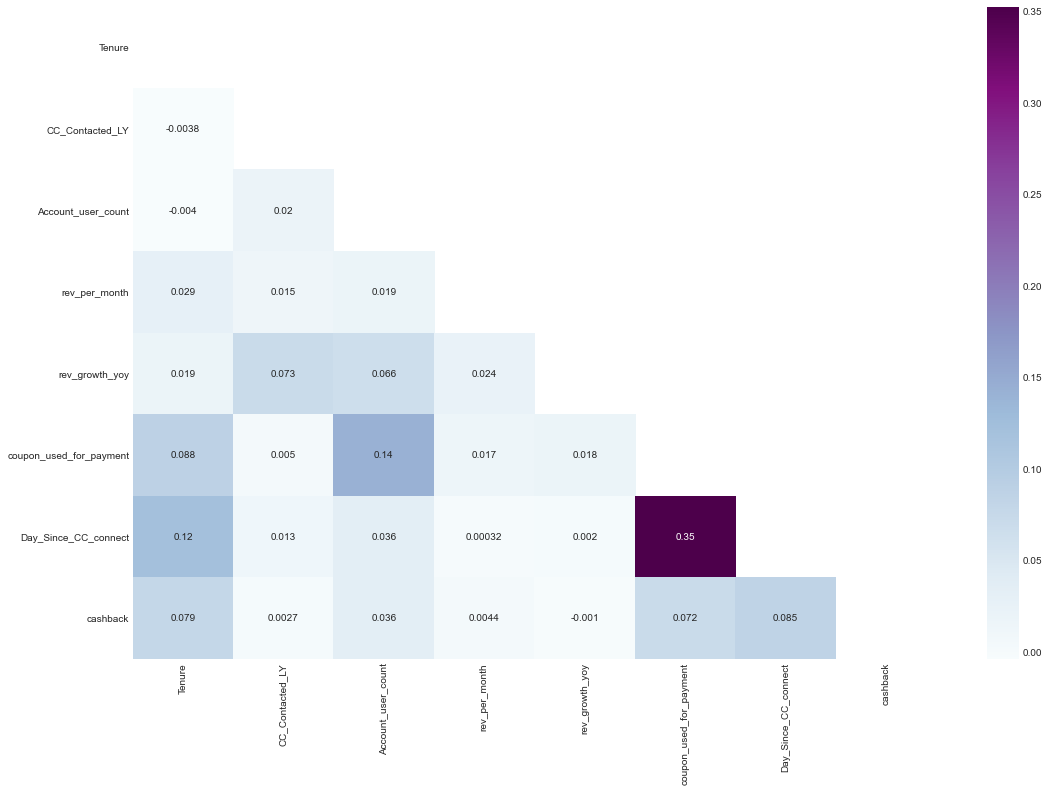

In [154]:
plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df_corr))
sns.heatmap(df_corr, mask=mask,annot=True, cmap='BuPu')

In [155]:
df_corr_table = df_corr.unstack() #Classic Style pivot table
df_corr_table

Tenure    Tenure                     1.000000
          CC_Contacted_LY           -0.003787
          Account_user_count        -0.004047
          rev_per_month              0.028538
          rev_growth_yoy             0.019049
                                       ...   
cashback  rev_per_month              0.004434
          rev_growth_yoy            -0.001018
          coupon_used_for_payment    0.071883
          Day_Since_CC_connect       0.085221
          cashback                   1.000000
Length: 64, dtype: float64

In [156]:
df_corr_table = df_corr.unstack() # To create a classic style pivot table
df_corr_table = df_corr_table.sort_values(ascending=False) # Sorting according to the correlation
df_corr_tab = df_corr_table[(df_corr_table < 1) & (df_corr_table > -1)].drop_duplicates().to_frame()#Since there is symmetry in the upper and lower traingles dropping duplicate entries.
df_corr_tab.columns = ['correlation_coeff']
df_corr_tab

correlation_coeff
coupon_used_for_payment Day_Since_CC_connect              0.352570
                        Account_user_count                0.142692
Day_Since_CC_connect    Tenure                            0.122386
coupon_used_for_payment Tenure                            0.088450
Day_Since_CC_connect    cashback                          0.085221
cashback                Tenure                            0.078557
rev_growth_yoy          CC_Contacted_LY                   0.072540
cashback                coupon_used_for_payment           0.071883
Account_user_count      rev_growth_yoy                    0.066309
                        Day_Since_CC_connect              0.035762
                        cashback                          0.035509
rev_per_month           Tenure                            0.028538
                        rev_growth_yoy                    0.023595
Account_user_count      CC_Contacted_LY                   0.020288
Tenure                  rev_growth_yoy                    0.019049
Account_user_count      rev_per_month                     0.018746
rev_growth_yoy          coupon_used_for_payment           0.018265
rev_per_month           coupon_used_for_payment           0.016538
CC_Contacted_LY         rev_per_month                     0.015033
                        Day_Since_CC_connect              0.012781
coupon_used_for_payment CC_Contacted_LY                   0.005001
rev_per_month           cashback                          0.004434
cashback                CC_Contacted_LY                   0.002673
Day_Since_CC_connect    rev_growth_yoy                    0.002017
                        rev_per_month                     0.000316
rev_growth_yoy          cashback                         -0.001018
Tenure                  CC_Contacted_LY                  -0.003787
Account_user_count      Tenure                           -0.004047

### OUTLIER ANALYSIS

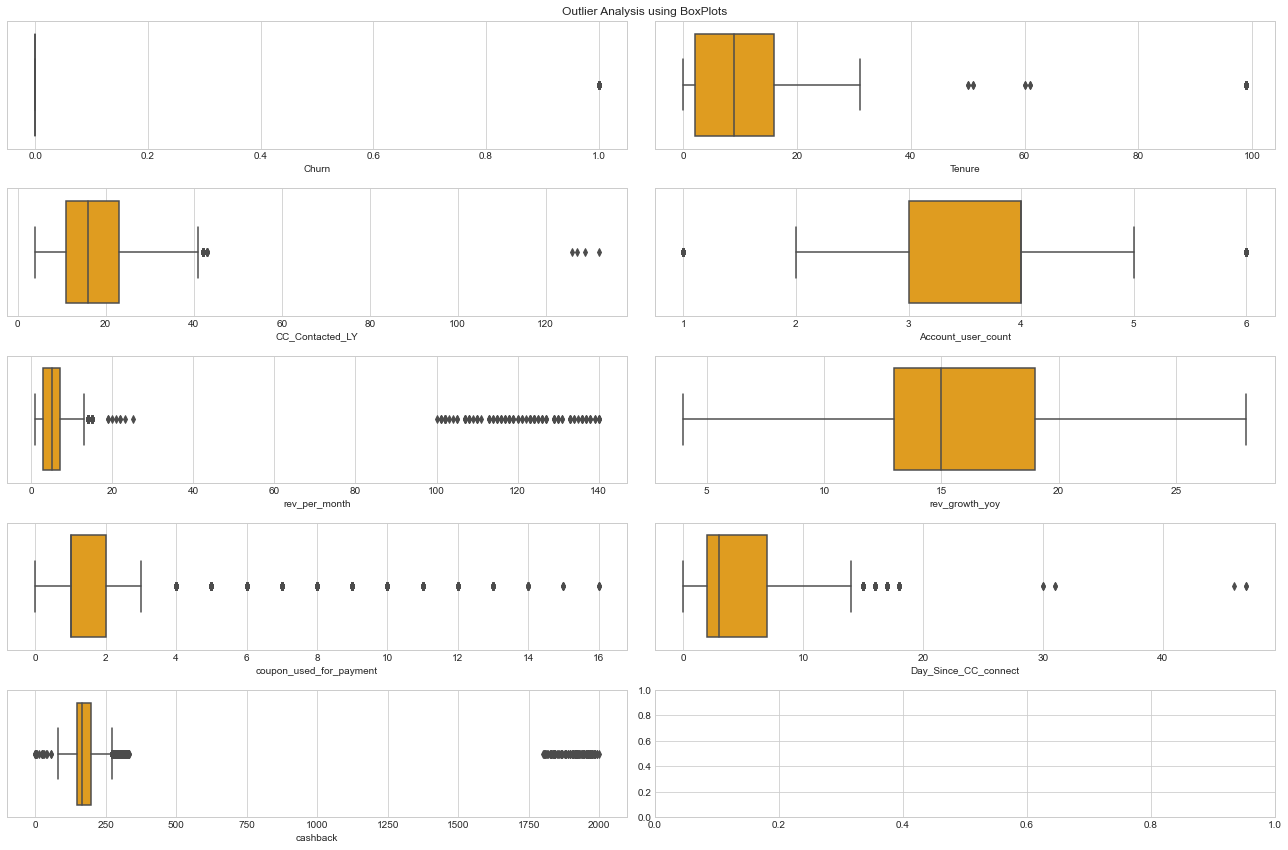

In [157]:
df_num_new = [c for c in df.columns if (df[c].dtype != 'object')]
fig, ax = plt.subplots(5, 2, figsize = (18, 12))
ax = ax.flatten()

for i, col in enumerate(df_num_new):
    sns.boxplot(x = df[col], ax = ax[i],color="orange")
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

In [158]:
df.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  
0                   5.0    159.93       Mobile  
1                   0.0    120.90       Mobile  
2                   3.0    165.25       Mobile  
3                   3.0    134.07       Mobile  
4                   3.0    129.60       Mobile

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Payment                  11260 non-null  object 
 5   Gender                   11260 non-null  object 
 6   Service_Score            11260 non-null  object 
 7   Account_user_count       11260 non-null  float64
 8   account_segment          11260 non-null  object 
 9   CC_Agent_Score           11260 non-null  object 
 10  Marital_Status           11260 non-null  object 
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [160]:
#Separating the predictors and the target variable
predictors = df.drop('Churn',axis=1)
target = df['Churn']

In [161]:
predictors.head()

Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0     4.0       3.0              6.0   Debit Card      F           3.0   
1     0.0       1.0              8.0          UPI      M           3.0   
2     0.0       1.0             30.0   Debit Card      M           2.0   
3     0.0       3.0             15.0   Debit Card      M           2.0   
4     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  
0                   5.0    159.93       Mobile  
1                   0.0    120.90       Mobile  
2                   3.0    165.25       Mobile  
3                   3.0    134.07       Mobile  
4                   3.0    129.60       Mobile

### TREATMENT OF OUTLIERS

In [162]:
df_treat = df.copy()

In [163]:
def treat_outlier(x):
    # taking 5,25,75 percentile of column
    q5= np.percentile(x,5)
    q25=np.percentile(x,25)
    q75=np.percentile(x,75)
    dt=np.percentile(x,95)
    #calculationg IQR range
    IQR=q75-q25
    #Calculating minimum threshold
    lower_bound=q25-(1.5*IQR)
    upper_bound=q75+(1.5*IQR)
    #Capping outliers
    return x.apply(lambda y: dt if y > upper_bound else y).apply(lambda y: q5 if y < lower_bound else y)

In [164]:
no_outlier_cols = ['Churn','City_Tier','Payment','Gender','Service_Score','account_segment','CC_Agent_Score','Marital_Status','Complain_ly','rev_growth_yoy','Login_device']

In [165]:
outlier_list = [x for x in df_treat.columns if x not in no_outlier_cols] #List comprehension

In [166]:
for i in df_treat[outlier_list]:    
    df_treat[i]=treat_outlier(df_treat[i])

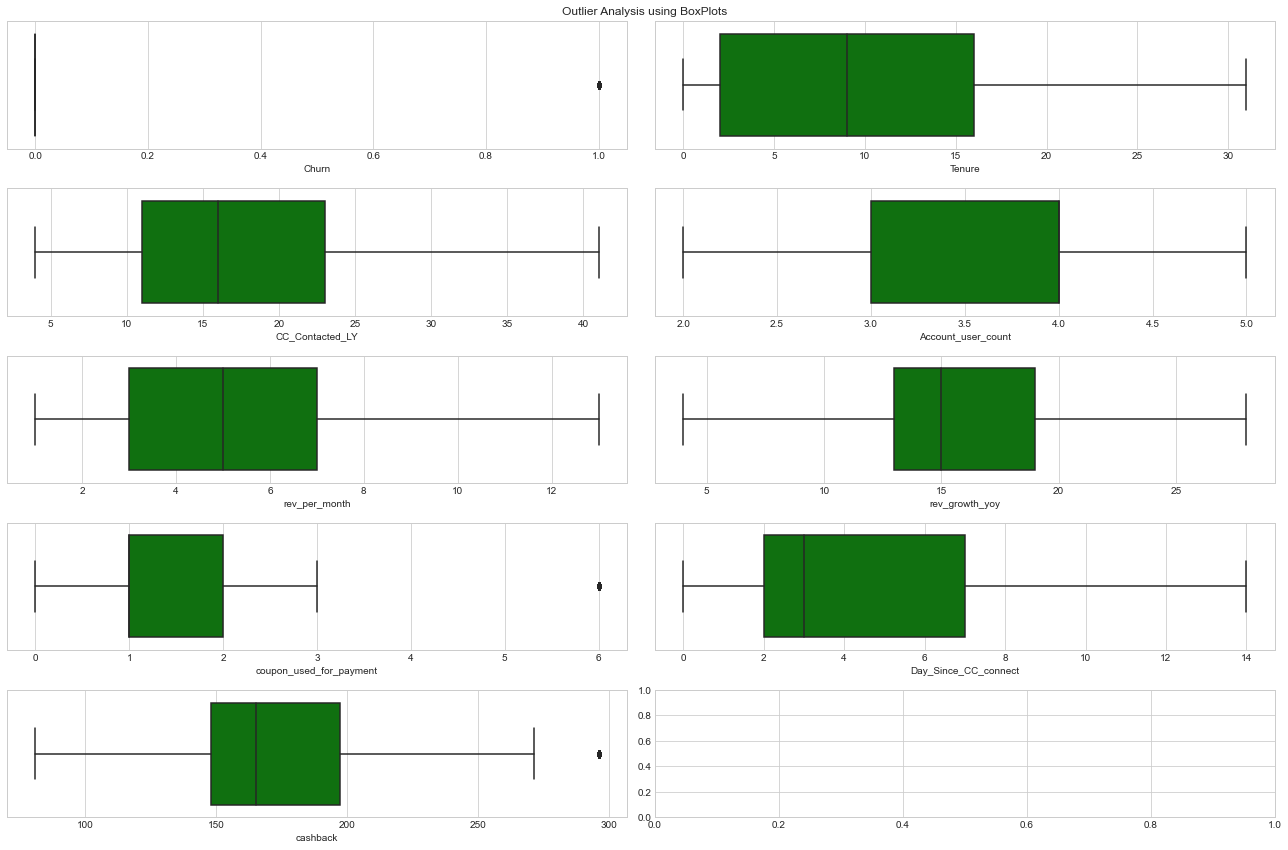

In [167]:
df_num_new = [c for c in df_treat.columns if (df_treat[c].dtype != 'object')]
fig, ax = plt.subplots(5, 2, figsize = (18, 12))
ax = ax.flatten()

for i, col in enumerate(df_num_new):
    sns.boxplot(x = df_treat[col], ax = ax[i],color="green")
plt.suptitle('Outlier Analysis using BoxPlots', fontsize = 12)
fig.tight_layout()

In [168]:
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  
0                   5.0    159.93       Mobile  
1                   0.0    120.90       Mobile  
2                   3.0    165.25       Mobile  
3                   3.0    134.07       Mobile  
4                   3.0    129.60       Mobile

### ENCODING

#### LABEL ENCODING

In [169]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [170]:
df_treat['Payment_Encode'] = label_encoder.fit_transform(df_treat['Payment'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  Payment_Encode  
0                   5.0    159.93       Mobile               2  
1                   0.0    120.90       Mobile               4  
2                   3.0    165.25       Mobile               2  
3                   3.0    134.07       Mobile               2  
4                   3.0    129.60       Mobile               1

In [171]:
df_treat['Payment_Encode'].unique()

array([2, 4, 1, 0, 3])

In [172]:
df_treat['account_segment_Encode'] = label_encoder.fit_transform(df_treat['account_segment'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  Payment_Encode  \
0                   5.0    159.93       Mobile               2   
1                   0.0    120.90       Mobile               4   
2                   3.0    165.25       Mobile               2   
3                   3.0    134.07       Mobile               2   
4                   3.0    129.60       Mobile               1   

   account_segment_Encode  
0                       3  
1                       2  
2                       2  
3                       3  
4                       2

In [173]:
df_treat['account_segment_Encode'].unique()

array([3, 2, 1, 0, 4])

In [174]:
df_treat['Marital_Status_Encode'] = label_encoder.fit_transform(df_treat['Marital_Status'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score  ... rev_per_month  \
0                 3.0           Super            2.0  ...           9.0   
1                 4.0    Regular Plus            3.0  ...           7.0   
2                 4.0    Regular Plus            3.0  ...           6.0   
3                 4.0           Super            5.0  ...           8.0   
4                 3.0    Regular Plus            5.0  ...           3.0   

   Complain_ly rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
0          1.0           11.0                      1.0                   5.0   
1          1.0           15.0                      0.0                   0.0   
2          1.0           14.0                      0.0                   3.0   
3          0.0           23.0                      0.0                   3.0   
4          0.0           11.0                      1.0                   3.0   

   cashback  Login_device Payment_Encode  account_segment_Encode  \
0    159.93        Mobile              2                       3   
1    120.90        Mobile              4                       2   
2    165.25        Mobile              2                       2   
3    134.07        Mobile              2                       3   
4    129.60        Mobile              1                       2   

   Marital_Status_Encode  
0                      2  
1                      2  
2                      2  
3                      2  
4                      2  

[5 rows x 21 columns]

In [175]:
df_treat['Marital_Status_Encode'].unique()

array([2, 0, 1])

In [176]:
df_treat['Login_device_Encode'] = label_encoder.fit_transform(df_treat['Login_device'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score  ... Complain_ly  \
0                 3.0           Super            2.0  ...         1.0   
1                 4.0    Regular Plus            3.0  ...         1.0   
2                 4.0    Regular Plus            3.0  ...         1.0   
3                 4.0           Super            5.0  ...         0.0   
4                 3.0    Regular Plus            5.0  ...         0.0   

   rev_growth_yoy coupon_used_for_payment  Day_Since_CC_connect  cashback  \
0            11.0                     1.0                   5.0    159.93   
1            15.0                     0.0                   0.0    120.90   
2            14.0                     0.0                   3.0    165.25   
3            23.0                     0.0                   3.0    134.07   
4            11.0                     1.0                   3.0    129.60   

   Login_device  Payment_Encode account_segment_Encode  Marital_Status_Encode  \
0        Mobile               2                      3                      2   
1        Mobile               4                      2                      2   
2        Mobile               2                      2                      2   
3        Mobile               2                      3                      2   
4        Mobile               1                      2                      2   

   Login_device_Encode  
0                    1  
1                    1  
2                    1  
3                    1  
4                    1  

[5 rows x 22 columns]

#### Dummy Encoding - Giving Equal Weightage

In [177]:
df_treat['Gender'] = pd.get_dummies(df_treat['Gender'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0       3.0              6.0   Debit Card       1   
1      1     0.0       1.0              8.0          UPI       0   
2      1     0.0       1.0             30.0   Debit Card       0   
3      1     0.0       3.0             15.0   Debit Card       0   
4      1     0.0       1.0             12.0  Credit Card       0   

  Service_Score  Account_user_count account_segment CC_Agent_Score  ...  \
0           3.0                 3.0           Super            2.0  ...   
1           3.0                 4.0    Regular Plus            3.0  ...   
2           2.0                 4.0    Regular Plus            3.0  ...   
3           2.0                 4.0           Super            5.0  ...   
4           2.0                 3.0    Regular Plus            5.0  ...   

  Complain_ly  rev_growth_yoy coupon_used_for_payment  Day_Since_CC_connect  \
0         1.0            11.0                     1.0                   5.0   
1         1.0            15.0                     0.0                   0.0   
2         1.0            14.0                     0.0                   3.0   
3         0.0            23.0                     0.0                   3.0   
4         0.0            11.0                     1.0                   3.0   

   cashback  Login_device  Payment_Encode account_segment_Encode  \
0    159.93        Mobile               2                      3   
1    120.90        Mobile               4                      2   
2    165.25        Mobile               2                      2   
3    134.07        Mobile               2                      3   
4    129.60        Mobile               1                      2   

   Marital_Status_Encode  Login_device_Encode  
0                      2                    1  
1                      2                    1  
2                      2                    1  
3                      2                    1  
4                      2                    1  

[5 rows x 22 columns]

In [178]:
df_treat.tail()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
11255      0    10.0       1.0             34.0  Credit Card       0   
11256      0    13.0       1.0             19.0  Credit Card       0   
11257      0     1.0       1.0             14.0   Debit Card       0   
11258      0    23.0       3.0             11.0  Credit Card       0   
11259      0     8.0       1.0             22.0  Credit Card       0   

      Service_Score  Account_user_count account_segment CC_Agent_Score  ...  \
11255           3.0                 2.0           Super            1.0  ...   
11256           3.0                 5.0             HNI            5.0  ...   
11257           3.0                 2.0           Super            4.0  ...   
11258           4.0                 5.0           Super            4.0  ...   
11259           3.0                 2.0           Super            3.0  ...   

      Complain_ly  rev_growth_yoy coupon_used_for_payment  \
11255         0.0            19.0                     1.0   
11256         0.0            16.0                     1.0   
11257         1.0            22.0                     1.0   
11258         0.0            16.0                     2.0   
11259         0.0            13.0                     2.0   

       Day_Since_CC_connect  cashback  Login_device  Payment_Encode  \
11255                   4.0    153.71      Computer               1   
11256                   8.0    226.91        Mobile               1   
11257                   4.0    191.42        Mobile               2   
11258                   9.0    179.90      Computer               1   
11259                   3.0    175.04        Mobile               1   

      account_segment_Encode  Marital_Status_Encode  Login_device_Encode  
11255                      3                      1                    0  
11256                      0                      1                    1  
11257                      3                      1                    1  
11258                      3                      1                    0  
11259                      3                      1                    1  

[5 rows x 22 columns]

#### Label Encoding Likert Scale Values - This has got an order and therefore label encoding

In [179]:
df_treat['Service_Score_Encode'] = label_encoder.fit_transform(df_treat['Service_Score'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0       3.0              6.0   Debit Card       1   
1      1     0.0       1.0              8.0          UPI       0   
2      1     0.0       1.0             30.0   Debit Card       0   
3      1     0.0       3.0             15.0   Debit Card       0   
4      1     0.0       1.0             12.0  Credit Card       0   

  Service_Score  Account_user_count account_segment CC_Agent_Score  ...  \
0           3.0                 3.0           Super            2.0  ...   
1           3.0                 4.0    Regular Plus            3.0  ...   
2           2.0                 4.0    Regular Plus            3.0  ...   
3           2.0                 4.0           Super            5.0  ...   
4           2.0                 3.0    Regular Plus            5.0  ...   

  rev_growth_yoy  coupon_used_for_payment Day_Since_CC_connect  cashback  \
0           11.0                      1.0                  5.0    159.93   
1           15.0                      0.0                  0.0    120.90   
2           14.0                      0.0                  3.0    165.25   
3           23.0                      0.0                  3.0    134.07   
4           11.0                      1.0                  3.0    129.60   

   Login_device  Payment_Encode  account_segment_Encode Marital_Status_Encode  \
0        Mobile               2                       3                     2   
1        Mobile               4                       2                     2   
2        Mobile               2                       2                     2   
3        Mobile               2                       3                     2   
4        Mobile               1                       2                     2   

   Login_device_Encode  Service_Score_Encode  
0                    1                     2  
1                    1                     2  
2                    1                     1  
3                    1                     1  
4                    1                     1  

[5 rows x 23 columns]

In [180]:
df_treat['Service_Score_Encode'].unique()

array([2, 1, 0, 3, 4])

In [181]:
df_treat['CC_Agent_Score_Encode'] = label_encoder.fit_transform(df_treat['CC_Agent_Score'])
df_treat.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment  Gender  \
0      1     4.0       3.0              6.0   Debit Card       1   
1      1     0.0       1.0              8.0          UPI       0   
2      1     0.0       1.0             30.0   Debit Card       0   
3      1     0.0       3.0             15.0   Debit Card       0   
4      1     0.0       1.0             12.0  Credit Card       0   

  Service_Score  Account_user_count account_segment CC_Agent_Score  ...  \
0           3.0                 3.0           Super            2.0  ...   
1           3.0                 4.0    Regular Plus            3.0  ...   
2           2.0                 4.0    Regular Plus            3.0  ...   
3           2.0                 4.0           Super            5.0  ...   
4           2.0                 3.0    Regular Plus            5.0  ...   

  coupon_used_for_payment  Day_Since_CC_connect cashback  Login_device  \
0                     1.0                   5.0   159.93        Mobile   
1                     0.0                   0.0   120.90        Mobile   
2                     0.0                   3.0   165.25        Mobile   
3                     0.0                   3.0   134.07        Mobile   
4                     1.0                   3.0   129.60        Mobile   

   Payment_Encode  account_segment_Encode  Marital_Status_Encode  \
0               2                       3                      2   
1               4                       2                      2   
2               2                       2                      2   
3               2                       3                      2   
4               1                       2                      2   

  Login_device_Encode  Service_Score_Encode  CC_Agent_Score_Encode  
0                   1                     2                      1  
1                   1                     2                      2  
2                   1                     1                      2  
3                   1                     1                      4  
4                   1                     1                      4  

[5 rows x 24 columns]

In [182]:
df_encoded = df_treat.copy()

In [183]:
df_encoded.drop(['Payment','Service_Score','account_segment','CC_Agent_Score','Login_device','Marital_Status'],inplace=True,axis=1)

In [184]:
df_encoded.head()

Churn  Tenure City_Tier  CC_Contacted_LY  Gender  Account_user_count  \
0      1     4.0       3.0              6.0       1                 3.0   
1      1     0.0       1.0              8.0       0                 4.0   
2      1     0.0       1.0             30.0       0                 4.0   
3      1     0.0       3.0             15.0       0                 4.0   
4      1     0.0       1.0             12.0       0                 3.0   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Payment_Encode  account_segment_Encode  \
0                   5.0    159.93               2                       3   
1                   0.0    120.90               4                       2   
2                   3.0    165.25               2                       2   
3                   3.0    134.07               2                       3   
4                   3.0    129.60               1                       2   

   Marital_Status_Encode  Login_device_Encode  Service_Score_Encode  \
0                      2                    1                     2   
1                      2                    1                     2   
2                      2                    1                     1   
3                      2                    1                     1   
4                      2                    1                     1   

   CC_Agent_Score_Encode  
0                      1  
1                      2  
2                      2  
3                      4  
4                      4

In [185]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  float64
 4   Gender                   11260 non-null  uint8  
 5   Account_user_count       11260 non-null  float64
 6   rev_per_month            11260 non-null  float64
 7   Complain_ly              11260 non-null  object 
 8   rev_growth_yoy           11260 non-null  float64
 9   coupon_used_for_payment  11260 non-null  float64
 10  Day_Since_CC_connect     11260 non-null  float64
 11  cashback                 11260 non-null  float64
 12  Payment_Encode           11260 non-null  int32  
 13  account_segment_Encode   11260 non-null  int32  
 14  Marital_Status_Encode 

In [186]:
df_encoded.rename(columns = {'Payment_Encode':'Payment',
                             'account_segment_Encode':'account_segment',
                             'Marital_Status_Encode':'Marital_Status',
                             'Login_device_Encode':'Login_device',
                             'Service_Score_Encode':'Service_Score',
                             'CC_Agent_Score_Encode':'CC_Agent_Score'}, inplace = True)

In [187]:
df_encoded.head()

Churn  Tenure City_Tier  CC_Contacted_LY  Gender  Account_user_count  \
0      1     4.0       3.0              6.0       1                 3.0   
1      1     0.0       1.0              8.0       0                 4.0   
2      1     0.0       1.0             30.0       0                 4.0   
3      1     0.0       3.0             15.0       0                 4.0   
4      1     0.0       1.0             12.0       0                 3.0   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Payment  account_segment  Marital_Status  \
0                   5.0    159.93        2                3               2   
1                   0.0    120.90        4                2               2   
2                   3.0    165.25        2                2               2   
3                   3.0    134.07        2                3               2   
4                   3.0    129.60        1                2               2   

   Login_device  Service_Score  CC_Agent_Score  
0             1              2               1  
1             1              2               2  
2             1              1               2  
3             1              1               4  
4             1              1               4

In [188]:
df_encoded['City_Tier'] = df_encoded['City_Tier'].astype(int)
df_encoded['Complain_ly'] = df_encoded['Complain_ly'].astype(int)

In [189]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  int64  
 1   Tenure                   11260 non-null  float64
 2   City_Tier                11260 non-null  int32  
 3   CC_Contacted_LY          11260 non-null  float64
 4   Gender                   11260 non-null  uint8  
 5   Account_user_count       11260 non-null  float64
 6   rev_per_month            11260 non-null  float64
 7   Complain_ly              11260 non-null  int32  
 8   rev_growth_yoy           11260 non-null  float64
 9   coupon_used_for_payment  11260 non-null  float64
 10  Day_Since_CC_connect     11260 non-null  float64
 11  cashback                 11260 non-null  float64
 12  Payment                  11260 non-null  int32  
 13  account_segment          11260 non-null  int32  
 14  Marital_Status        

In [190]:
df_encoded.head()

Churn  Tenure  City_Tier  CC_Contacted_LY  Gender  Account_user_count  \
0      1     4.0          3              6.0       1                 3.0   
1      1     0.0          1              8.0       0                 4.0   
2      1     0.0          1             30.0       0                 4.0   
3      1     0.0          3             15.0       0                 4.0   
4      1     0.0          1             12.0       0                 3.0   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0            1            11.0                      1.0   
1            7.0            1            15.0                      0.0   
2            6.0            1            14.0                      0.0   
3            8.0            0            23.0                      0.0   
4            3.0            0            11.0                      1.0   

   Day_Since_CC_connect  cashback  Payment  account_segment  Marital_Status  \
0                   5.0    159.93        2                3               2   
1                   0.0    120.90        4                2               2   
2                   3.0    165.25        2                2               2   
3                   3.0    134.07        2                3               2   
4                   3.0    129.60        1                2               2   

   Login_device  Service_Score  CC_Agent_Score  
0             1              2               1  
1             1              2               2  
2             1              1               2  
3             1              1               4  
4             1              1               4

### SCALING - To Understand Clustering - Before Model Building the Scaling is done seperately for Train and Test

In [191]:
#Separating the predictors and the target variable
predictors = df_encoded.drop('Churn',axis=1)
target = df_encoded['Churn']

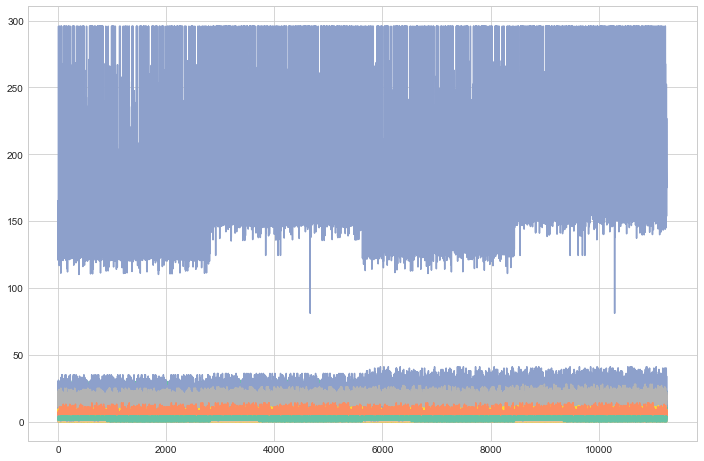

In [192]:
plt.plot(predictors)

In [193]:
zscore = StandardScaler()  
zscore.fit(predictors)
df_scaled = pd.DataFrame(zscore.transform(predictors),columns = predictors.columns)

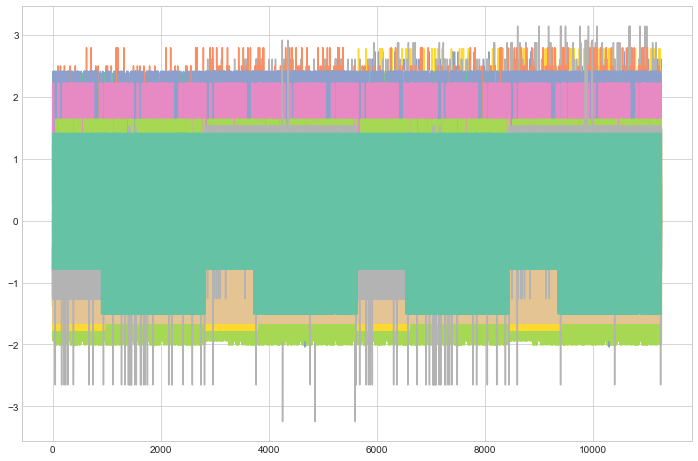

In [194]:
plt.plot(df_scaled)

In [195]:
df_scaled.head()

Tenure  City_Tier  CC_Contacted_LY    Gender  Account_user_count  \
0 -0.713559   1.481914        -1.385605  1.237528           -0.836748   
1 -1.178394  -0.709334        -1.150610 -0.808063            0.330904   
2 -1.178394  -0.709334         1.434336 -0.808063            0.330904   
3 -1.178394   1.481914        -0.328127 -0.808063            0.330904   
4 -1.178394  -0.709334        -0.680620 -0.808063           -0.836748   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0       1.350149     1.618461       -1.382201                -0.442011   
1       0.636174     1.618461       -0.317551                -1.007456   
2       0.279186     1.618461       -0.583714                -1.007456   
3       0.993161    -0.617871        1.811748                -1.007456   
4      -0.791777    -0.617871       -1.382201                -0.442011   

   Day_Since_CC_connect  cashback   Payment  account_segment  Marital_Status  \
0              0.145468 -0.405195  0.236005         0.743123        1.268725   
1             -1.326472 -1.214548  2.220635        -0.150848        1.268725   
2             -0.443308 -0.294876  0.236005        -0.150848        1.268725   
3             -0.443308 -0.941446  0.236005         0.743123        1.268725   
4             -0.443308 -1.034139 -0.756310        -0.150848        1.268725   

   Login_device  Service_Score  CC_Agent_Score  
0      0.605123       0.131554       -0.776488  
1      0.605123       0.131554       -0.047944  
2      0.605123      -1.260645       -0.047944  
3      0.605123      -1.260645        1.409143  
4      0.605123      -1.260645        1.409143

### CLUSTERING

###### For K mean clustering (which is a non-hierarchical clustering) we need to specify the number of clusters needed before feeding it into the model to split the data into clusters. The "means" in the K-means refers to averaging of the data (which means finding the centroid).

##### For K-means, let us consider 1, 2, 3, 4, 5, 6 clusters and see how the analysis comes through to decide on the optimal clusters for the dataset

In [196]:
kmeans_1 = KMeans(n_clusters=1,random_state=1)

In [197]:
kmeans_1.fit(df_scaled);

In [198]:
kmeans_1.inertia_ #highest WSS value you can obtain. The entire dataset is considered as 1 cluster

191419.99999999988

In [199]:
kmeans_2 = KMeans(n_clusters=2,random_state=1)

In [200]:
kmeans_2.fit(df_scaled)

KMeans(n_clusters=2, random_state=1)

In [201]:
kmeans_2.labels_ #cluster mapping
# 0 is CLUSTER 1
# 1 is CLUSTER 2

array([0, 0, 0, ..., 0, 1, 0])

In [202]:
kmeans_2.inertia_ #Total WSS (Within Sum of Squares) when k=2. The distance between each sum of squares fpr
# each cluster is computed by measuring the distance between every observation and its corresponding centroid.
# Squaring it up and adding it up
# Therefore WSS(Cluster 1) + WSS(Cluster 2) = 191419.99999999988 This is the inertia
# There is significant drop from n_clusters =1 to n_clusters = 2. 191419.99999999988 dropped to 191419.99999999988

176132.42264113214

In [203]:
kmeans_3 = KMeans(n_clusters=3,random_state=1)
kmeans_3.fit(df_scaled)
kmeans_3.labels_

array([2, 1, 1, ..., 1, 0, 1])

In [204]:
kmeans_3.inertia_ #There is a decent drop from n_clusters =2 to n_clusters = 3

167510.08472101262

In [205]:
kmeans_4 = KMeans(n_clusters=4,random_state=1)
kmeans_4.fit(df_scaled)
kmeans_4.labels_

array([2, 1, 2, ..., 2, 3, 2])

In [206]:
kmeans_4.inertia_

160742.0461315712

In [207]:
kmeans_5 = KMeans(n_clusters=5,random_state=1)
kmeans_5.fit(df_scaled)
kmeans_5.labels_

array([4, 1, 1, ..., 1, 0, 1])

In [208]:
kmeans_5.inertia_

155235.24073485847

In [209]:
kmeans_6 = KMeans(n_clusters=5,random_state=1)
kmeans_6.fit(df_scaled)
kmeans_6.labels_

array([4, 1, 1, ..., 1, 0, 1])

In [210]:
kmeans_6.inertia_

155235.2407348585

### Calculating WSS for various values of K - Elbow Method

In [211]:
wss=[]

In [212]:
for i in range(1,11):
    KM = KMeans(n_clusters=i,random_state=1)
    KM.fit(df_scaled)
    wss.append(KM.inertia_) #Trying to get the wss values for clusters from 1 to 11

In [213]:
wss

[191419.99999999988,
 176132.42264113214,
 167510.08472101262,
 160742.0461315712,
 155235.2407348585,
 150594.92972724984,
 146599.35794864743,
 144146.16826741313,
 141381.64259822536,
 139413.1459217021]

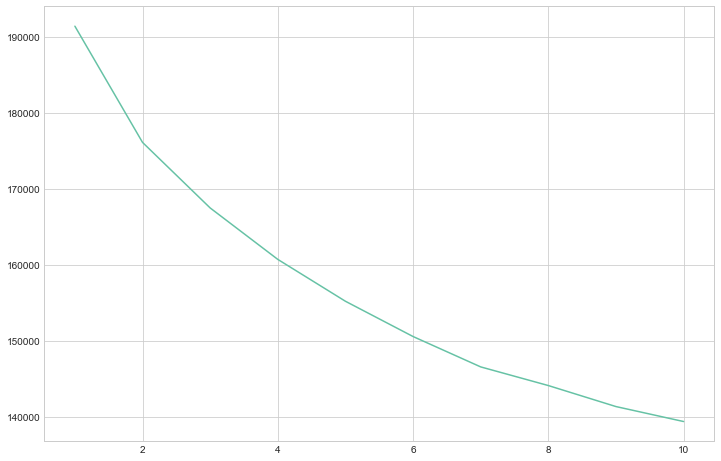

In [214]:
plt.plot(range(1,11),wss)

### SILHOUETTE SCORE

In [215]:
kmeans_3 = KMeans(n_clusters=3,random_state=1)
kmeans_3.fit(df_scaled)
kmeans_3.labels_

array([2, 1, 1, ..., 1, 0, 1])

In [216]:
kmeans_3.inertia_

167510.08472101262

In [217]:
df_kmeans_clustered = df_knime.copy() #making a copy of the original dataset

In [218]:
df_kmeans_clustered.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  AccountID  
0                   5.0    159.93       Mobile      20000  
1                   0.0    120.90       Mobile      20001  
2                   3.0    165.25       Mobile      20002  
3                   3.0    134.07       Mobile      20003  
4                   3.0    129.60       Mobile      20004

In [219]:
df_kmeans_clustered['Cluster'] = kmeans_3.labels_

In [220]:
df_kmeans_clustered.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score Marital_Status  \
0                 3.0           Super            2.0         Single   
1                 4.0    Regular Plus            3.0         Single   
2                 4.0    Regular Plus            3.0         Single   
3                 4.0           Super            5.0         Single   
4                 3.0    Regular Plus            5.0         Single   

   rev_per_month Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0            9.0         1.0            11.0                      1.0   
1            7.0         1.0            15.0                      0.0   
2            6.0         1.0            14.0                      0.0   
3            8.0         0.0            23.0                      0.0   
4            3.0         0.0            11.0                      1.0   

   Day_Since_CC_connect  cashback Login_device  AccountID  Cluster  
0                   5.0    159.93       Mobile      20000        2  
1                   0.0    120.90       Mobile      20001        1  
2                   3.0    165.25       Mobile      20002        1  
3                   3.0    134.07       Mobile      20003        2  
4                   3.0    129.60       Mobile      20004        1

In [221]:
sil_width = silhouette_samples(df_scaled,kmeans_3.labels_)
sil_width# computes 

array([ 0.07125571,  0.0630263 ,  0.0953888 , ...,  0.09508496,
       -0.02310985,  0.13329808])

In [222]:
silhouette_score(df_scaled,kmeans_3.labels_,random_state=1) #computes the average of all the silhouette widths

0.06943342776428849

In [223]:
df_kmeans_clustered['Sil_Width'] = sil_width

In [224]:
df_kmeans_clustered.head()

Churn  Tenure City_Tier  CC_Contacted_LY      Payment Gender Service_Score  \
0      1     4.0       3.0              6.0   Debit Card      F           3.0   
1      1     0.0       1.0              8.0          UPI      M           3.0   
2      1     0.0       1.0             30.0   Debit Card      M           2.0   
3      1     0.0       3.0             15.0   Debit Card      M           2.0   
4      1     0.0       1.0             12.0  Credit Card      M           2.0   

   Account_user_count account_segment CC_Agent_Score  ... rev_per_month  \
0                 3.0           Super            2.0  ...           9.0   
1                 4.0    Regular Plus            3.0  ...           7.0   
2                 4.0    Regular Plus            3.0  ...           6.0   
3                 4.0           Super            5.0  ...           8.0   
4                 3.0    Regular Plus            5.0  ...           3.0   

   Complain_ly rev_growth_yoy  coupon_used_for_payment  Day_Since_CC_connect  \
0          1.0           11.0                      1.0                   5.0   
1          1.0           15.0                      0.0                   0.0   
2          1.0           14.0                      0.0                   3.0   
3          0.0           23.0                      0.0                   3.0   
4          0.0           11.0                      1.0                   3.0   

   cashback  Login_device AccountID  Cluster  Sil_Width  
0    159.93        Mobile     20000        2   0.071256  
1    120.90        Mobile     20001        1   0.063026  
2    165.25        Mobile     20002        1   0.095389  
3    134.07        Mobile     20003        2   0.051211  
4    129.60        Mobile     20004        1   0.127855  

[5 rows x 21 columns]

In [225]:
sil_width.min() 

-0.10084424866780717

In [226]:
sil_width.max()

0.20078170089666741

In [227]:
df_kmeans_clustered.to_excel("Kmeans_Output.xlsx")

In [228]:
def ClusterPercentagecalc(df,col_name):
    """Common utility function to calculate the percentage and size of cluster"""
    
    size = pd.Series(df[col_name].value_counts().sort_index())
    percent = pd.Series(round(df[col_name].value_counts()/df.shape[0] * 100,2)).sort_index()

    size_df = pd.concat([size, percent],axis=1)
    size_df.columns = ["Cluster_Size","Cluster_Percentage"]
    
    return(size_df)

In [229]:
ClusterPercentagecalc(df_kmeans_clustered,"Cluster")

Cluster_Size  Cluster_Percentage
0          2865               25.44
1          5392               47.89
2          3003               26.67

### MODEL BUILDING

In [230]:
#Splitting the Data into Train and Test
#Churn is the dependent variable and the others are the independent variable
A = df_encoded.drop("Churn" , axis=1)

b = df_encoded.pop("Churn")

In [231]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [232]:
zscore = StandardScaler()  
zscore.fit(A_train)
A_train_scaled = pd.DataFrame(zscore.transform(A_train),columns = A_train.columns)
A_test_scaled  = pd.DataFrame(zscore.transform(A_test),columns = A_test.columns)

In [233]:
A_train_scaled.head()

Tenure  City_Tier  CC_Contacted_LY   Gender  Account_user_count  \
0 -0.247176  -0.707436        -0.684274 -0.81137           -0.833210   
1 -0.944306   1.483961         0.139872 -0.81137           -0.833210   
2  0.217577   1.483961         0.964018 -0.81137           -0.833210   
3  1.844213   1.483961        -0.919744 -0.81137            0.333284   
4 -1.060494   1.483961        -0.213333 -0.81137            0.333284   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0      -1.494057     1.597013       -0.579515                -0.440720   
1      -0.784714    -0.626169       -0.313639                 0.126331   
2      -0.075371    -0.626169       -0.845390                 2.394534   
3      -0.075371    -0.626169       -1.111265                 0.126331   
4      -0.784714    -0.626169       -0.313639                 0.126331   

   Day_Since_CC_connect  cashback   Payment  account_segment  Marital_Status  \
0             -0.732478 -0.917618  0.240766        -0.153691       -1.787125   
1             -0.732478 -1.105359  1.236945        -0.153691       -0.254359   
2              1.620646  1.237585  1.236945         1.639635        1.278407   
3              1.914787  2.403707  1.236945         1.639635       -1.787125   
4              1.032365 -0.277563  1.236945         0.742972        1.278407   

   Login_device  Service_Score  CC_Agent_Score  
0      0.605592       0.128981       -0.056874  
1      0.605592      -1.261752        0.672037  
2      0.605592       0.128981        1.400947  
3      0.605592       0.128981        1.400947  
4      0.605592       0.128981       -1.514695

In [234]:
A_test_scaled.head()

Tenure  City_Tier  CC_Contacted_LY    Gender  Account_user_count  \
0 -0.130988  -0.707436         0.257607 -0.811370           -1.999704   
1  1.147083  -0.707436        -1.155214  1.232484           -0.833210   
2 -0.247176  -0.707436         0.728547 -0.811370           -0.833210   
3  0.217577  -0.707436        -0.448803  1.232484           -0.833210   
4 -1.060494  -0.707436         0.493077 -0.811370            0.333284   

   rev_per_month  Complain_ly  rev_growth_yoy  coupon_used_for_payment  \
0      -1.139386    -0.626169        2.079236                -0.440720   
1      -1.139386     1.597013       -1.377140                 0.693382   
2      -0.784714    -0.626169       -1.377140                 0.126331   
3      -1.139386    -0.626169       -1.377140                -0.440720   
4       1.343315     1.597013       -0.845390                -0.440720   

   Day_Since_CC_connect  cashback   Payment  account_segment  Marital_Status  \
0             -0.732478 -0.294086  0.240766        -0.153691       -0.254359   
1             -1.320759  1.818157  2.233125         1.639635       -1.787125   
2             -0.732478  0.291857  0.240766        -1.947016        1.278407   
3              0.738225 -0.866190  0.240766        -0.153691       -0.254359   
4              1.032365  1.685561 -0.755413        -1.947016       -1.787125   

   Login_device  Service_Score  CC_Agent_Score  
0     -1.651276       0.128981        0.672037  
1      0.605592      -1.261752       -0.785784  
2     -1.651276      -1.261752       -1.514695  
3     -1.651276      -1.261752       -0.056874  
4      0.605592       0.128981       -0.056874

In [235]:
A_train_scaled.shape

(7882, 17)

In [236]:
A_test_scaled.shape

(3378, 17)

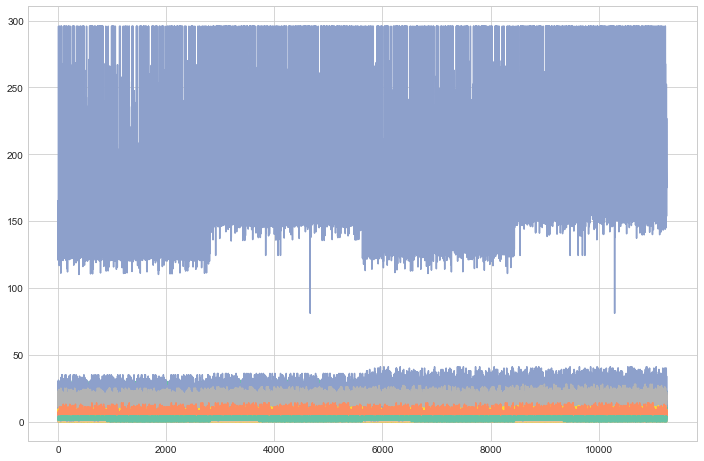

In [237]:
plt.plot(df_encoded)

In [238]:
zscore = StandardScaler()  
zscore.fit(df_encoded)
df_encoded_scaled = pd.DataFrame(zscore.transform(df_encoded),columns = df_encoded.columns)

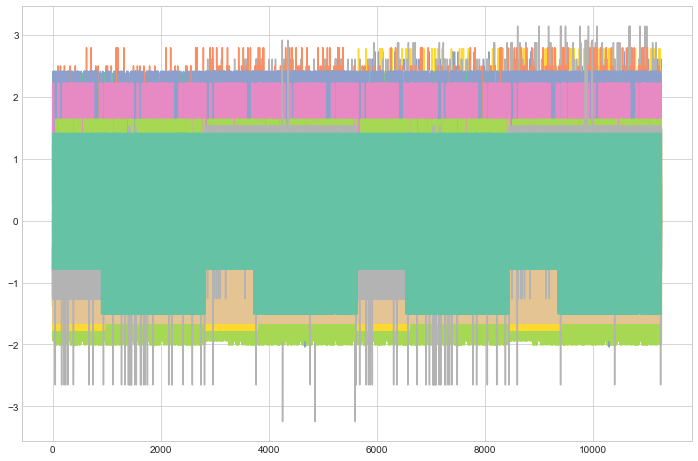

In [239]:
plt.plot(df_encoded_scaled)

### LOGISTIC REGRESSION

In [240]:
param_grid_logreg = {
    'penalty':['l1','l2','elasticnet','none'],
    'max_iter': [8000,10000,12000,15000],
    'solver': ['sag','lbfgs','liblinear','newton-cg','saga'],
    'tol': [0.01,0.1,0.0001,0.000001], 
}

logreg = LogisticRegression(random_state=1)

grid_search_logreg = GridSearchCV(estimator = logreg, param_grid = param_grid_logreg, cv = 12,n_jobs=-1,scoring='f1')

In [241]:
grid_search_logreg.fit(A_train_scaled, b_train)

GridSearchCV(cv=12, estimator=LogisticRegression(random_state=1), n_jobs=-1,
             param_grid={'max_iter': [8000, 10000, 12000, 15000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['sag', 'lbfgs', 'liblinear', 'newton-cg',
                                    'saga'],
                         'tol': [0.01, 0.1, 0.0001, 1e-06]},
             scoring='f1')

In [242]:
print(grid_search_logreg.best_params_,'\n')
print(grid_search_logreg.best_estimator_)

{'max_iter': 8000, 'penalty': 'l1', 'solver': 'saga', 'tol': 0.1} 

LogisticRegression(max_iter=8000, penalty='l1', random_state=1, solver='saga',
                   tol=0.1)


In [243]:
best_model = grid_search_logreg.best_estimator_
best_model

LogisticRegression(max_iter=8000, penalty='l1', random_state=1, solver='saga',
                   tol=0.1)

In [244]:
# Prediction on the training set
btrain_predict = best_model.predict(A_train_scaled)
btest_predict = best_model.predict(A_test_scaled)

In [245]:
## Getting the probabilities on the test set
btest_predict_prob=best_model.predict_proba(A_test_scaled)
pd.DataFrame(btest_predict_prob).head()

0         1
0  0.975688  0.024312
1  0.998091  0.001909
2  0.881274  0.118726
3  0.990383  0.009617
4  0.509476  0.490524

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6555
           1       0.75      0.49      0.60      1327

    accuracy                           0.89      7882
   macro avg       0.83      0.73      0.76      7882
weighted avg       0.88      0.89      0.88      7882
 



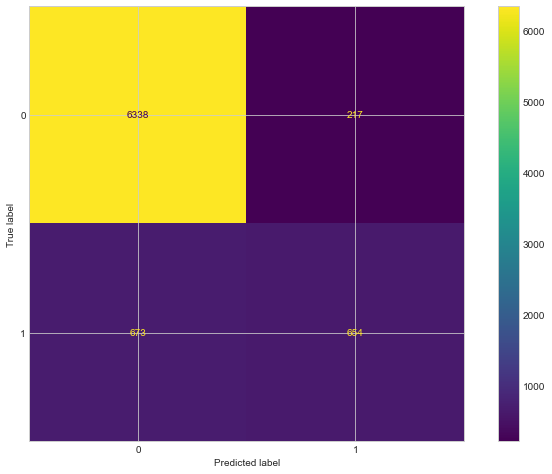

In [246]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,A_train_scaled,b_train)
print(classification_report(b_train, btrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      2809
           1       0.76      0.46      0.58       569

    accuracy                           0.88      3378
   macro avg       0.83      0.72      0.75      3378
weighted avg       0.88      0.88      0.87      3378
 



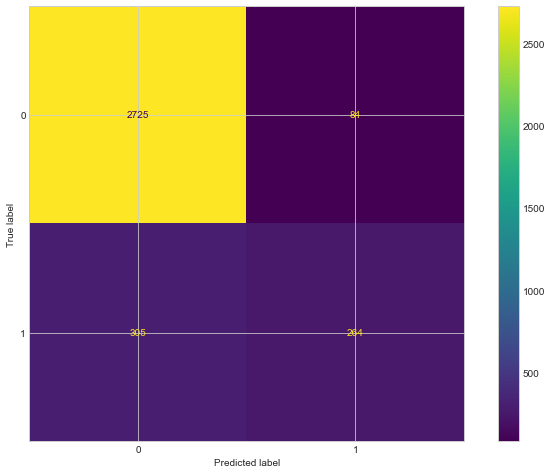

In [247]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,A_test_scaled,b_test)
print(classification_report(b_test, btest_predict),'\n');

In [248]:
# Accuracy - Training Data
lr_train_acc = best_model.score(A_train_scaled, b_train)
lr_train_acc

0.8870844963207308

AUC: 0.877


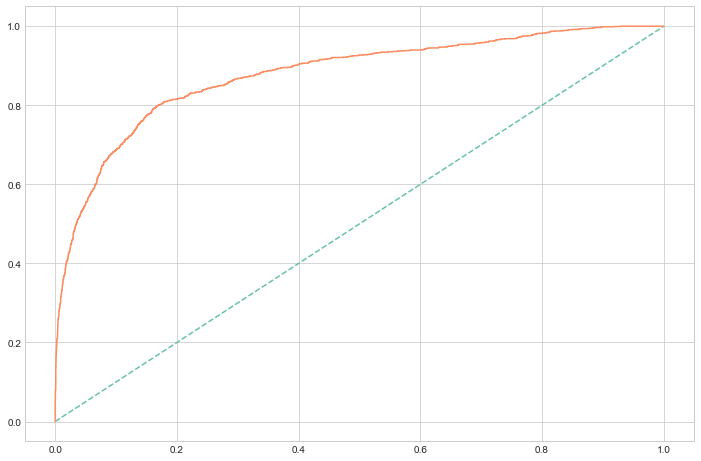

In [249]:
#AUC AND ROC for Training Data
# predict probabilities
probs = best_model.predict_proba(A_train_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(b_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(b_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [250]:
# Accuracy - Test Data
lr_test_acc = best_model.score(A_test_scaled, b_test)
lr_test_acc

0.8848431024274719

AUC: 0.857


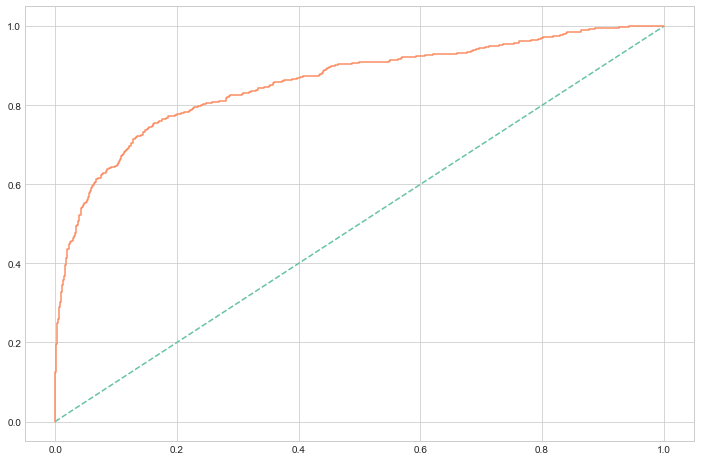

In [251]:
##AUC AND ROC for Test Data
# predict probabilities
probs = best_model.predict_proba(A_test_scaled)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(b_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(b_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

In [252]:
lr_metrics=classification_report(b_train, btrain_predict,output_dict=True)
dfa=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(dfa.loc["1"][2],2)
lr_train_recall=round(dfa.loc["1"][1],2)
lr_train_precision=round(dfa.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.75
lr_train_recall  0.49
lr_train_f1  0.6


In [253]:
lr_metrics=classification_report(b_test, btest_predict,output_dict=True)
dfa=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(dfa.loc["1"][2],2)
lr_test_recall=round(dfa.loc["1"][1],2)
lr_test_precision=round(dfa.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.76
lr_test_recall  0.46
lr_test_f1  0.58


### LINEAR DISCRIMINANT ANALYSIS [LDA]

In [254]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

C_train, C_test, d_train, d_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [255]:
zscore = StandardScaler()  
zscore.fit(C_train)
C_train_scaled = pd.DataFrame(zscore.transform(C_train),columns = C_train.columns)
C_test_scaled  = pd.DataFrame(zscore.transform(C_test),columns = C_test.columns)

In [256]:
#Build LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(C_train_scaled,d_train)

In [257]:
# Training Data Class Prediction
pred_class_train = model.predict(C_train_scaled)

# Test Data Class Prediction
pred_class_test = model.predict(C_test_scaled)

In [258]:
lda_train_acc = model.score(C_train_scaled,d_train)
lda_train_acc

0.8790916011164679

In [259]:
lda_test_acc = model.score(C_test_scaled,d_test)
lda_test_acc

0.8801065719360568

              precision    recall  f1-score   support

           0       0.89      0.97      0.93      6555
           1       0.75      0.42      0.54      1327

    accuracy                           0.88      7882
   macro avg       0.82      0.70      0.73      7882
weighted avg       0.87      0.88      0.86      7882
 



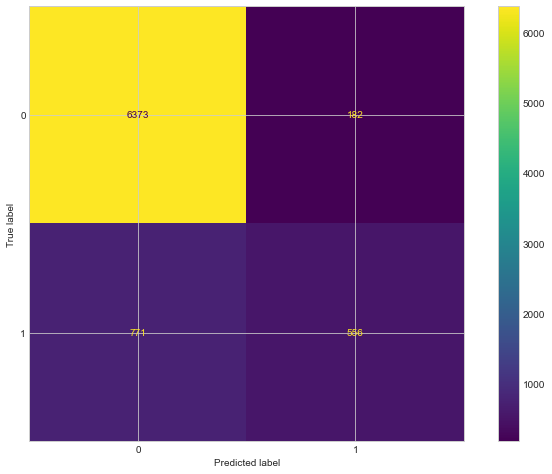

In [260]:
## Confusion matrix on the train data
plot_confusion_matrix(model,C_train_scaled,d_train)
print(classification_report(d_train, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2809
           1       0.78      0.41      0.53       569

    accuracy                           0.88      3378
   macro avg       0.83      0.69      0.73      3378
weighted avg       0.87      0.88      0.86      3378
 



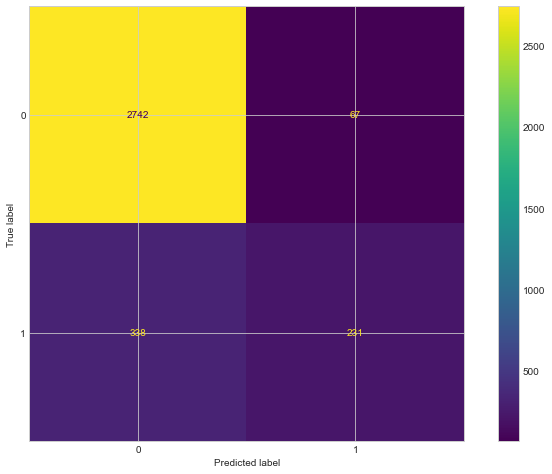

In [261]:
## Confusion matrix on the test data
plot_confusion_matrix(model,C_test_scaled,d_test)
print(classification_report(d_test, pred_class_test),'\n');

In [262]:
# Training Data Probability Prediction
pred_prob_train = model.predict_proba(C_train_scaled)

# Test Data Probability Prediction
pred_prob_test = model.predict_proba(C_test_scaled)

AUC for the Training Data: 0.868
AUC for the Test Data: 0.850


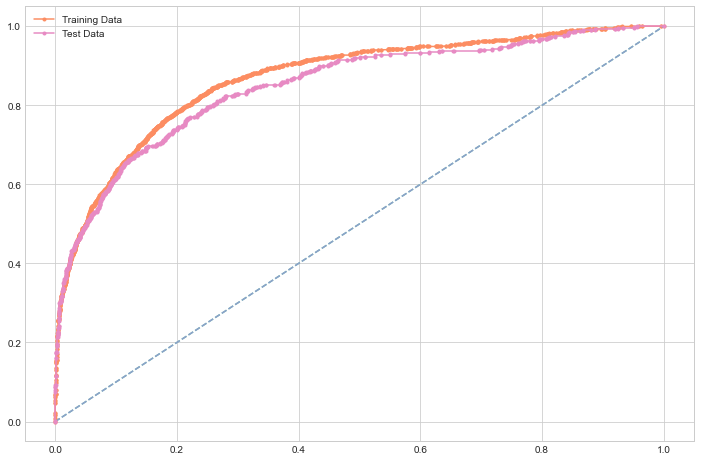

In [263]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(d_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr_lda_train, tpr_lda_train, thresholds = metrics.roc_curve(d_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_lda_train, tpr_lda_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(d_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr_lda_test, tpr_lda_test, thresholds = metrics.roc_curve(d_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_lda_test, tpr_lda_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [264]:
lda_metrics=classification_report(d_train, pred_class_train,output_dict=True)
dfb=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(dfb.loc["1"][2],2)
lda_train_recall=round(dfb.loc["1"][1],2)
lda_train_precision=round(dfb.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lda_train_f1)

lda_train_precision  0.75
lda_train_recall  0.42
lda_train_f1  0.54


In [265]:
lda_metrics=classification_report(d_test, pred_class_test,output_dict=True)
dfb=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(dfb.loc["1"][2],2)
lda_test_recall=round(dfb.loc["1"][1],2)
lda_test_precision=round(dfb.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.78
lda_test_recall  0.41
lda_test_f1  0.53


In [266]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train Results':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test Results':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train Results':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test Results':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,4)

LR Train Results  LR Test Results  LDA Train Results  \
Accuracy             0.8871           0.8848             0.8791   
AUC                  0.8774           0.8574             0.8680   
Recall               0.4900           0.4600             0.4200   
Precision            0.7500           0.7600             0.7500   
F1 Score             0.6000           0.5800             0.5400   

           LDA Test Results  
Accuracy             0.8801  
AUC                  0.8495  
Recall               0.4100  
Precision            0.7800  
F1 Score             0.5300

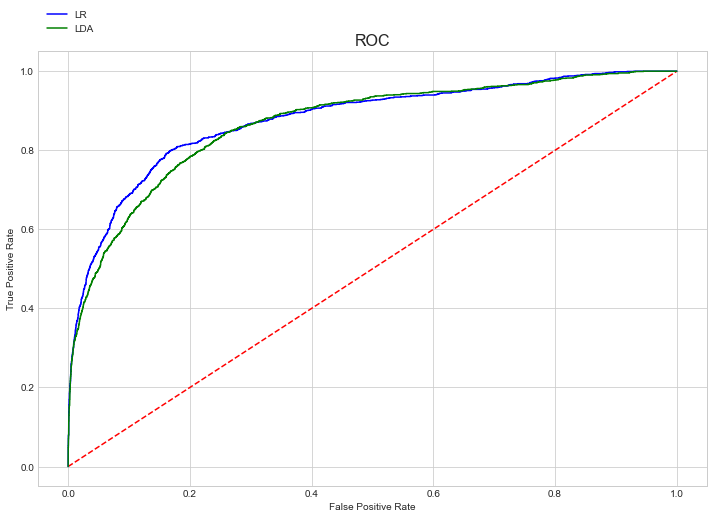

In [267]:
#Training Set
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(train_fpr, train_tpr,color='blue',label="LR")
plt.plot(fpr_lda_train,tpr_lda_train,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')

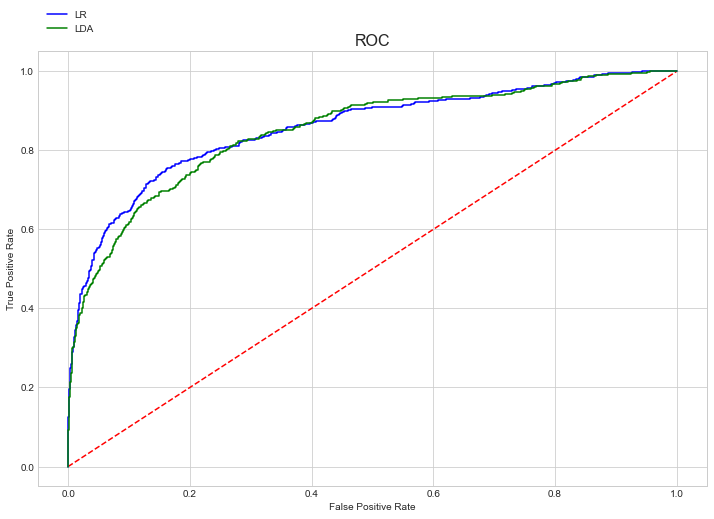

In [268]:
#Testing Set
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(test_fpr, test_tpr,color='blue',label="LR")
plt.plot(fpr_lda_test,tpr_lda_test,color='green',label="LDA")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')

### KNN MODEL - K-Nearest Neighbours

In [269]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

E_train, E_test, f_train, f_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [270]:
minmaxscale = MinMaxScaler()  
minmaxscale.fit(E_train)
E_train_scaled = pd.DataFrame(minmaxscale.transform(E_train),columns = E_train.columns)
E_test_scaled  = pd.DataFrame(minmaxscale.transform(E_test),columns = E_test.columns)

In [271]:
param_grid_KNN = {
    'n_neighbors':[8,10,12,18,20],
    'weights': ['distance','uniform'],
    'algorithm': ['auto','ball_tree','kd_tree','brute'],
    'leaf_size': [10,20,30,40,50], 
    'p': [1,2],
}

KNN = KNeighborsClassifier()

grid_search_KNN = GridSearchCV(estimator = KNN, param_grid = param_grid_KNN, cv = 12,n_jobs=-1)

In [272]:
grid_search_KNN.fit(E_train_scaled, f_train)

GridSearchCV(cv=12, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 20, 30, 40, 50],
                         'n_neighbors': [8, 10, 12, 18, 20], 'p': [1, 2],
                         'weights': ['distance', 'uniform']})

In [273]:
print(grid_search_KNN.best_params_,'\n')
print(grid_search_KNN.best_estimator_)

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 8, 'p': 1, 'weights': 'distance'} 

KNeighborsClassifier(leaf_size=10, n_neighbors=8, p=1, weights='distance')


In [274]:
best_model = grid_search_KNN.best_estimator_
best_model

KNeighborsClassifier(leaf_size=10, n_neighbors=8, p=1, weights='distance')

In [275]:
# Prediction on the training set
ftrain_predict = best_model.predict(E_train_scaled)
ftest_predict = best_model.predict(E_test_scaled)

In [276]:
## Getting the probabilities on the test set
ftest_predict_prob=best_model.predict_proba(E_test_scaled)
pd.DataFrame(ftest_predict_prob).head()

0         1
0  1.000000  0.000000
1  1.000000  0.000000
2  1.000000  0.000000
3  1.000000  0.000000
4  0.036589  0.963411

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 



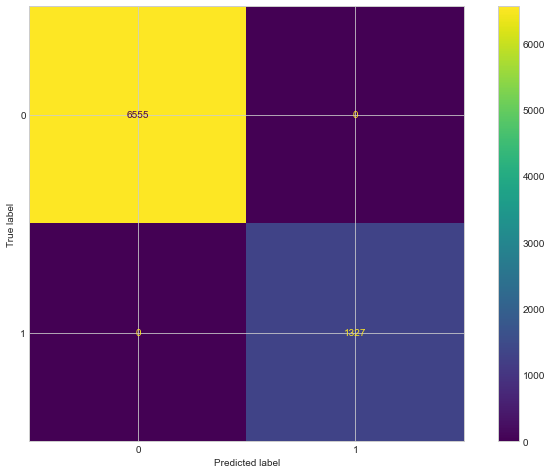

In [277]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,E_train_scaled,f_train)
print(classification_report(f_train, ftrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2809
           1       0.96      0.88      0.92       569

    accuracy                           0.97      3378
   macro avg       0.97      0.94      0.95      3378
weighted avg       0.97      0.97      0.97      3378
 



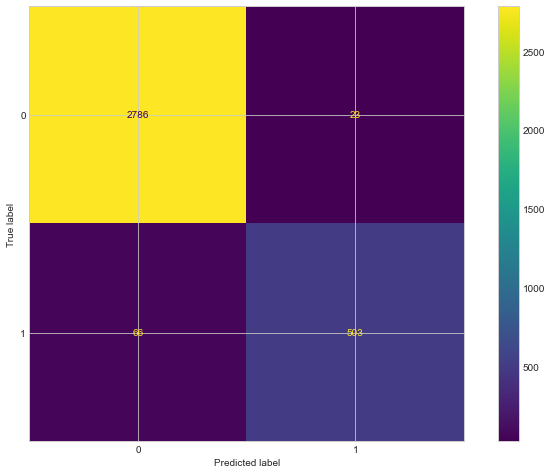

In [278]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,E_test_scaled,f_test)
print(classification_report(f_test, ftest_predict),'\n');

In [279]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(E_train_scaled)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(E_test_scaled)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.993


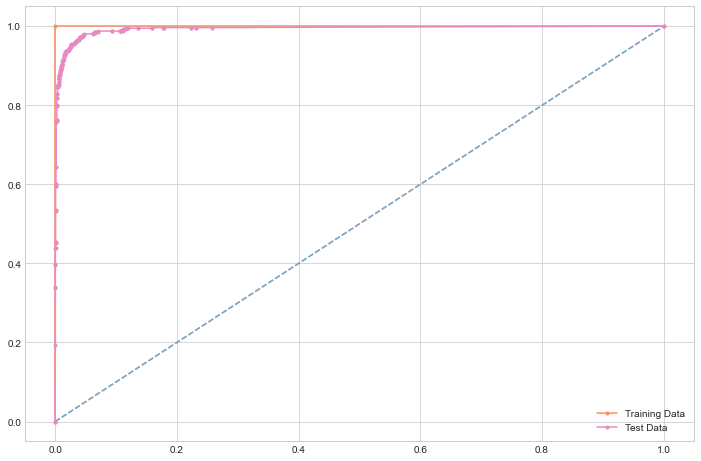

In [280]:
# AUC and ROC for the training data

# calculate AUC
knn_train_auc = metrics.roc_auc_score(f_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % knn_train_auc)

#  calculate roc curve
fpr_knn_train, tpr_knn_train, thresholds = metrics.roc_curve(f_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_knn_train, tpr_knn_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
knn_test_auc = metrics.roc_auc_score(f_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % knn_test_auc)

#  calculate roc curve
fpr_knn_test, tpr_knn_test, thresholds = metrics.roc_curve(f_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_knn_test, tpr_knn_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [281]:
knn_metrics=classification_report(f_train, ftrain_predict,output_dict=True)
dfc=pd.DataFrame(knn_metrics).transpose()
knn_train_f1=round(dfc.loc["1"][2],2)
knn_train_recall=round(dfc.loc["1"][1],2)
knn_train_precision=round(dfc.loc["1"][0],2)
print ('knn_train_precision ',knn_train_precision)
print ('knn_train_recall ',knn_train_recall)
print ('knn_train_f1 ',knn_train_f1)

knn_train_precision  1.0
knn_train_recall  1.0
knn_train_f1  1.0


In [282]:
knn_metrics=classification_report(f_test, ftest_predict,output_dict=True)
dfb=pd.DataFrame(knn_metrics).transpose()
knn_test_f1=round(dfb.loc["1"][2],2)
knn_test_recall=round(dfb.loc["1"][1],2)
knn_test_precision=round(dfb.loc["1"][0],2)
print ('knn_test_precision ',knn_test_precision)
print ('knn_test_recall ',knn_test_recall)
print ('knn_test_f1 ',knn_test_f1)

knn_test_precision  0.96
knn_test_recall  0.88
knn_test_f1  0.92


In [283]:
knn_train_acc = best_model.score(E_train_scaled,f_train)
knn_train_acc

1.0

In [284]:
knn_test_acc = best_model.score(E_test_scaled,f_test)
knn_test_acc

0.9736530491415039

### Naïve Bayes Model

In [285]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

G_train, G_test, h_train, h_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [286]:
zscore = StandardScaler()  
zscore.fit(G_train)
G_train_scaled = pd.DataFrame(zscore.transform(G_train),columns = G_train.columns)
G_test_scaled  = pd.DataFrame(zscore.transform(G_test),columns = G_test.columns)

In [287]:
#Build NB Model
clf_NB = GaussianNB()
best_model=clf_NB.fit(G_train_scaled,h_train.ravel())

In [288]:
# Training Data Class Prediction
pred_class_train = best_model.predict(G_train_scaled)

# Test Data Class Prediction
pred_class_test = best_model.predict(G_test_scaled)

In [289]:
NB_train_acc = best_model.score(G_train_scaled,h_train)
NB_train_acc

0.8689418929205786

In [290]:
NB_test_acc = best_model.score(G_test_scaled,h_test)
NB_test_acc

0.866785079928952

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      6555
           1       0.61      0.60      0.61      1327

    accuracy                           0.87      7882
   macro avg       0.77      0.76      0.76      7882
weighted avg       0.87      0.87      0.87      7882
 



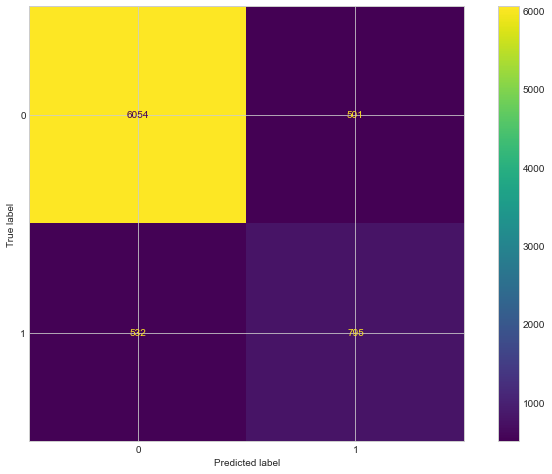

In [291]:
## Confusion matrix on the train data
plot_confusion_matrix(best_model,G_train_scaled,h_train)
print(classification_report(h_train, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2809
           1       0.61      0.58      0.60       569

    accuracy                           0.87      3378
   macro avg       0.76      0.75      0.76      3378
weighted avg       0.86      0.87      0.87      3378
 



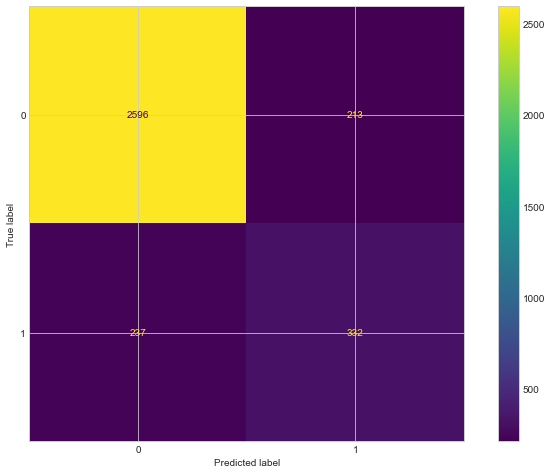

In [292]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,G_test_scaled,h_test)
print(classification_report(h_test, pred_class_test),'\n');

In [293]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(G_train_scaled)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(G_test_scaled)

AUC for the Training Data: 0.836
AUC for the Test Data: 0.812


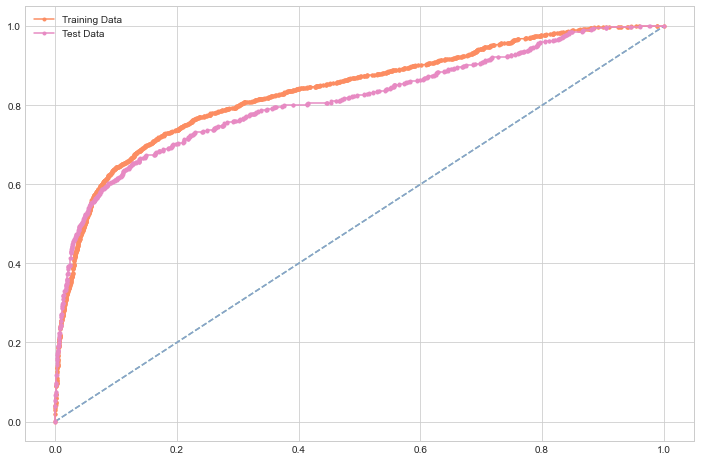

In [294]:
# AUC and ROC for the training data

# calculate AUC
NB_train_auc = metrics.roc_auc_score(h_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % NB_train_auc)

#  calculate roc curve
fpr_NB_train, tpr_NB_train, thresholds = metrics.roc_curve(h_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_NB_train, tpr_NB_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
NB_test_auc = metrics.roc_auc_score(h_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % NB_test_auc)

#  calculate roc curve
fpr_NB_test, tpr_NB_test, thresholds = metrics.roc_curve(h_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_NB_test, tpr_NB_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [295]:
NB_metrics=classification_report(h_train, pred_class_train,output_dict=True)
dfd=pd.DataFrame(NB_metrics).transpose()
NB_train_f1=round(dfd.loc["1"][2],2)
NB_train_recall=round(dfd.loc["1"][1],2)
NB_train_precision=round(dfd.loc["1"][0],2)
print ('NB_train_precision ',NB_train_precision)
print ('NB_train_recall ',NB_train_recall)
print ('NB_train_f1 ',NB_train_f1)

NB_train_precision  0.61
NB_train_recall  0.6
NB_train_f1  0.61


In [296]:
NB_metrics=classification_report(h_test, pred_class_test,output_dict=True)
dfd=pd.DataFrame(NB_metrics).transpose()
NB_test_f1=round(dfd.loc["1"][2],2)
NB_test_recall=round(dfd.loc["1"][1],2)
NB_test_precision=round(dfd.loc["1"][0],2)
print ('NB_test_precision ',NB_test_precision)
print ('NB_test_recall ',NB_test_recall)
print ('NB_test_f1 ',NB_test_f1)

NB_test_precision  0.61
NB_test_recall  0.58
NB_test_f1  0.6


In [297]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'KNN Train Results':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test Results':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
       'NB Train Results':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test Results':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],},index=index)
round(data,4)

KNN Train Results  KNN Test Results  NB Train Results  \
Accuracy                 1.0            0.9737            0.8689   
AUC                      1.0            0.9931            0.8363   
Recall                   1.0            0.8800            0.6000   
Precision                1.0            0.9600            0.6100   
F1 Score                 1.0            0.9200            0.6100   

           NB Test Results  
Accuracy            0.8668  
AUC                 0.8118  
Recall              0.5800  
Precision           0.6100  
F1 Score            0.6000

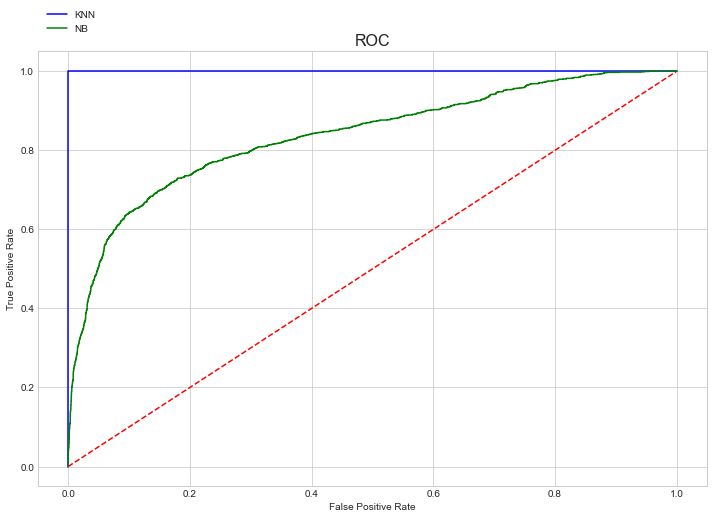

In [298]:
#Training Set
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr_knn_train, tpr_knn_train,color='blue',label="KNN")
plt.plot(fpr_NB_train,tpr_NB_train,color='green',label="NB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')

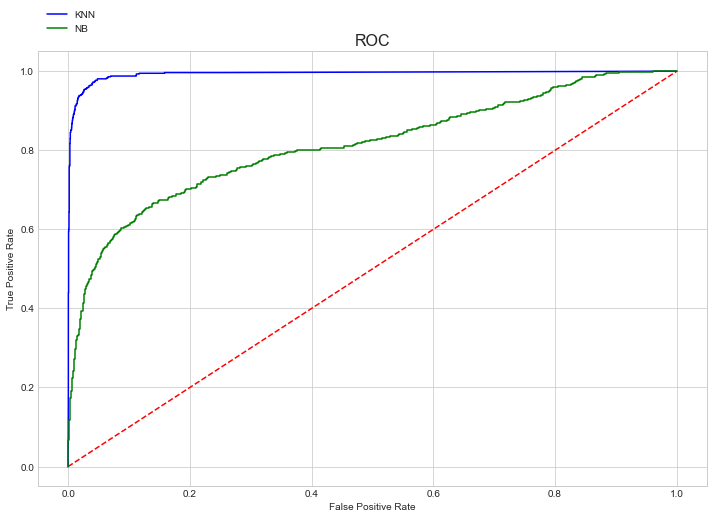

In [299]:
#Testing Set
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
plt.plot(fpr_knn_test,tpr_knn_test,color='blue',label="KNN")
plt.plot(fpr_NB_test,tpr_NB_test,color='green',label="NB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left')

### RANDOM FOREST

In [300]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

I_train, I_test, j_train, j_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [301]:
param_grid_RF = {
    'max_depth': [5,8,12],
    'max_features': [4,6,8],
    'min_samples_leaf': [50,75,100],
    'min_samples_split': [50,100,200],
    'n_estimators': [100,200,480],
    'criterion': ['gini','entropy'],
    'random_state': [1],
}

RF = RandomForestClassifier()

grid_search_RF = GridSearchCV(estimator = RF, param_grid = param_grid_RF, cv = 3,n_jobs=-1)

In [302]:
grid_search_RF.fit(I_train, j_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 8, 12], 'max_features': [4, 6, 8],
                         'min_samples_leaf': [50, 75, 100],
                         'min_samples_split': [50, 100, 200],
                         'n_estimators': [100, 200, 480], 'random_state': [1]})

In [303]:
print(grid_search_RF.best_params_,'\n')
print(grid_search_RF.best_estimator_)

{'criterion': 'entropy', 'max_depth': 8, 'max_features': 6, 'min_samples_leaf': 50, 'min_samples_split': 50, 'n_estimators': 480, 'random_state': 1} 

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=6,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=480, random_state=1)


In [304]:
best_model = grid_search_RF.best_estimator_
best_model

RandomForestClassifier(criterion='entropy', max_depth=8, max_features=6,
                       min_samples_leaf=50, min_samples_split=50,
                       n_estimators=480, random_state=1)

In [305]:
# Prediction on the training set
jtrain_predict = best_model.predict(I_train)
jtest_predict = best_model.predict(I_test)

In [306]:
## Getting the probabilities on the test set
jtest_predict_prob=best_model.predict_proba(I_test)
pd.DataFrame(jtest_predict_prob).head()

0         1
0  0.979274  0.020726
1  0.962300  0.037700
2  0.926868  0.073132
3  0.975551  0.024449
4  0.336309  0.663691

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      6555
           1       0.78      0.56      0.65      1327

    accuracy                           0.90      7882
   macro avg       0.85      0.76      0.80      7882
weighted avg       0.89      0.90      0.89      7882
 



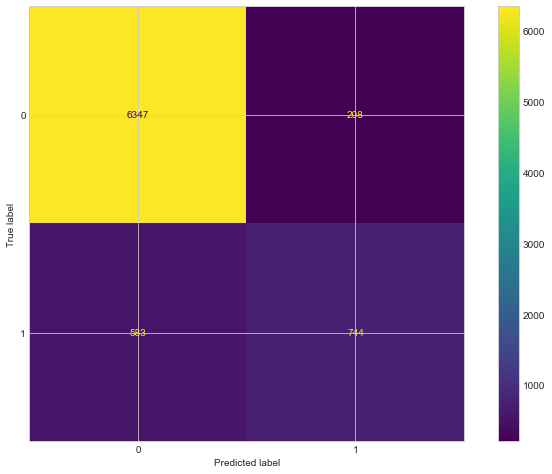

In [307]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,I_train,j_train)
print(classification_report(j_train, jtrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      2809
           1       0.79      0.52      0.63       569

    accuracy                           0.90      3378
   macro avg       0.85      0.75      0.78      3378
weighted avg       0.89      0.90      0.89      3378
 



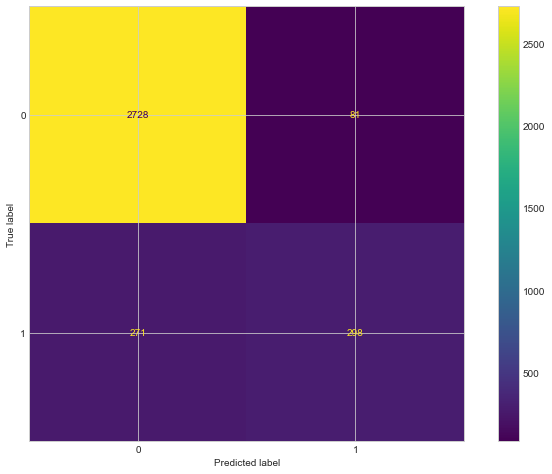

In [308]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,I_test,j_test)
print(classification_report(j_test, jtest_predict),'\n');

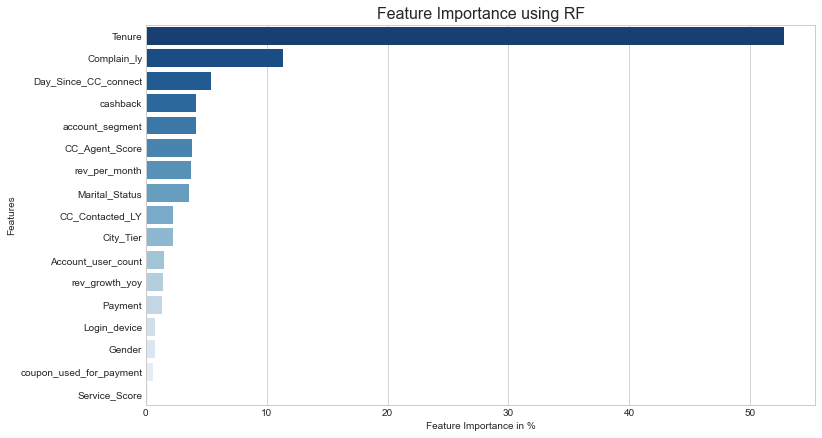

In [309]:
x=pd.DataFrame(best_model.feature_importances_*100,index=I_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='Blues_r')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

In [310]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(I_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(I_test)

AUC for the Training Data: 0.940
AUC for the Test Data: 0.925


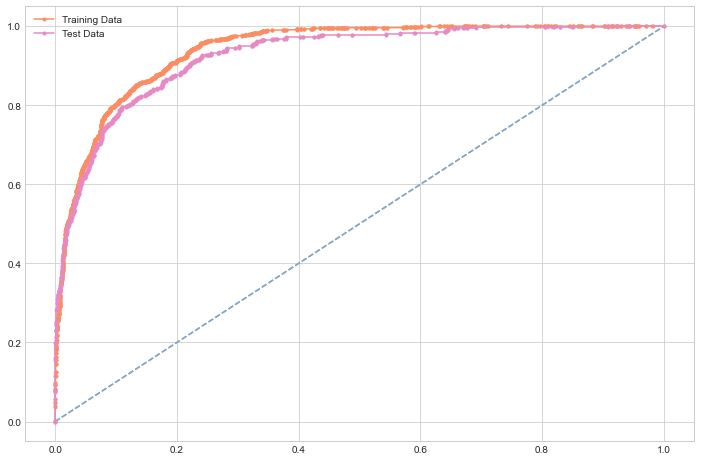

In [311]:
# AUC and ROC for the training data

# calculate AUC
RF_train_auc = metrics.roc_auc_score(j_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % RF_train_auc)

#  calculate roc curve
fpr_RF_train, tpr_RF_train, thresholds = metrics.roc_curve(j_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_RF_train, tpr_RF_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
RF_test_auc = metrics.roc_auc_score(j_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % RF_test_auc)

#  calculate roc curve
fpr_RF_test, tpr_RF_test, thresholds = metrics.roc_curve(j_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_RF_test, tpr_RF_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [312]:
RF_metrics=classification_report(j_train, jtrain_predict,output_dict=True)
dfe=pd.DataFrame(RF_metrics).transpose()
RF_train_f1=round(dfe.loc["1"][2],2)
RF_train_recall=round(dfe.loc["1"][1],2)
RF_train_precision=round(dfe.loc["1"][0],2)
print ('RF_train_precision ',RF_train_precision)
print ('RF_train_recall ',RF_train_recall)
print ('RF_train_f1 ',RF_train_f1)

RF_train_precision  0.78
RF_train_recall  0.56
RF_train_f1  0.65


In [313]:
RF_metrics=classification_report(j_test, jtest_predict,output_dict=True)
dfe=pd.DataFrame(RF_metrics).transpose()
RF_test_f1=round(dfe.loc["1"][2],2)
RF_test_recall=round(dfe.loc["1"][1],2)
RF_test_precision=round(dfe.loc["1"][0],2)
print ('RF_test_precision ',RF_test_precision)
print ('RF_test_recall ',RF_test_recall)
print ('RF_test_f1 ',RF_test_f1)

RF_test_precision  0.79
RF_test_recall  0.52
RF_test_f1  0.63


In [314]:
RF_train_acc = best_model.score(I_train,j_train)
RF_train_acc

0.8996447602131439

In [315]:
RF_test_acc = best_model.score(I_test,j_test)
RF_test_acc

0.8957963291888692

### ADA BOOSTING

In [316]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

K_train, K_test, l_train, l_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [317]:
param_grid_ADA = {
    'learning_rate': [1,3,5],
    'algorithm': ['SAMME','SAMME.R'],
    'n_estimators': [100,200,480],
    'random_state': [1],
}

ADA = AdaBoostClassifier()

grid_search_ADA = GridSearchCV(estimator = ADA, param_grid = param_grid_ADA, cv = 3,n_jobs=-1)

In [318]:
grid_search_ADA.fit(K_train, l_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [1, 3, 5],
                         'n_estimators': [100, 200, 480], 'random_state': [1]})

In [319]:
print(grid_search_ADA.best_params_,'\n')
print(grid_search_ADA.best_estimator_)

{'algorithm': 'SAMME', 'learning_rate': 1, 'n_estimators': 480, 'random_state': 1} 

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=480,
                   random_state=1)


In [320]:
best_model = grid_search_ADA.best_estimator_
best_model

AdaBoostClassifier(algorithm='SAMME', learning_rate=1, n_estimators=480,
                   random_state=1)

In [321]:
# Prediction on the training set
ltrain_predict = best_model.predict(K_train)
ltest_predict = best_model.predict(K_test)

In [322]:
## Getting the probabilities on the test set
ltest_predict_prob=best_model.predict_proba(K_test)
pd.DataFrame(ltest_predict_prob).head()

0         1
0  0.571712  0.428288
1  0.558233  0.441767
2  0.542350  0.457650
3  0.559490  0.440510
4  0.473209  0.526791

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      6555
           1       0.76      0.59      0.66      1327

    accuracy                           0.90      7882
   macro avg       0.84      0.77      0.80      7882
weighted avg       0.89      0.90      0.89      7882
 



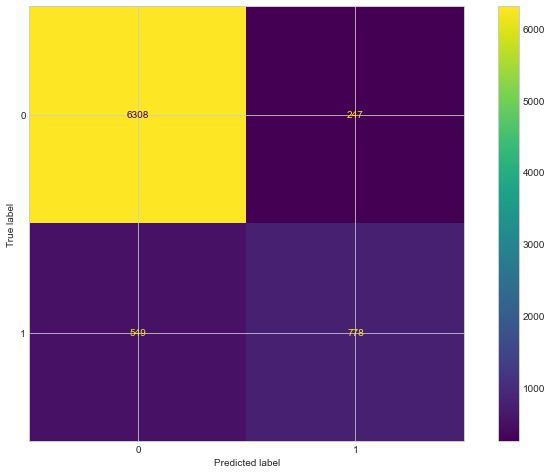

In [323]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,K_train,l_train)
print(classification_report(l_train, ltrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      2809
           1       0.76      0.57      0.66       569

    accuracy                           0.90      3378
   macro avg       0.84      0.77      0.80      3378
weighted avg       0.89      0.90      0.89      3378
 



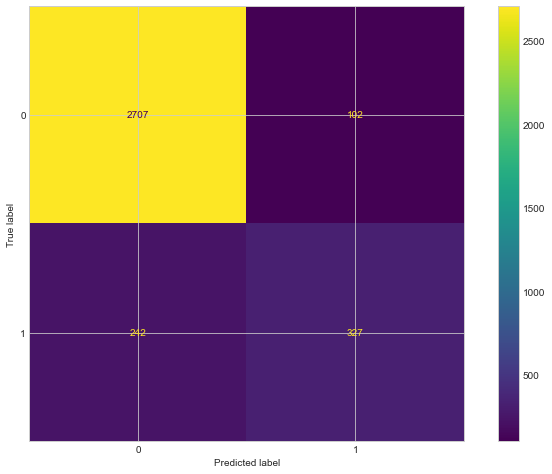

In [324]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,K_test,l_test)
print(classification_report(l_test, ltest_predict),'\n');

In [325]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(K_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(K_test)

AUC for the Training Data: 0.912
AUC for the Test Data: 0.902


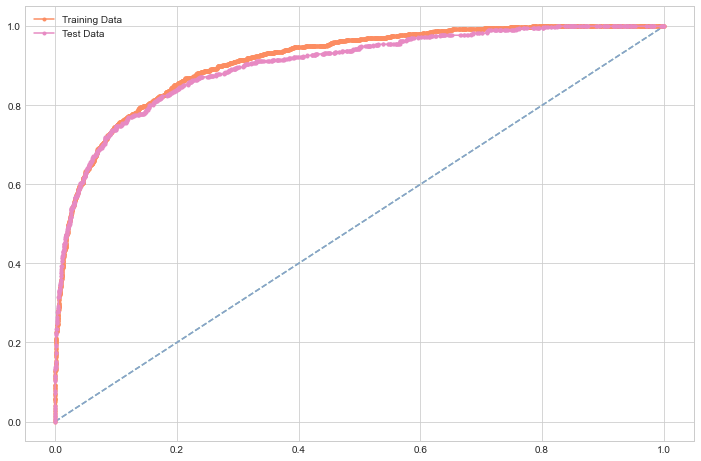

In [326]:
# AUC and ROC for the training data

# calculate AUC
ADA_train_auc = metrics.roc_auc_score(l_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % ADA_train_auc)

#  calculate roc curve
fpr_ADA_train, tpr_ADA_train, thresholds = metrics.roc_curve(l_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ADA_train, tpr_ADA_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
ADA_test_auc = metrics.roc_auc_score(l_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % ADA_test_auc)

#  calculate roc curve
fpr_ADA_test, tpr_ADA_test, thresholds = metrics.roc_curve(l_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_ADA_test, tpr_ADA_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [327]:
ADA_metrics=classification_report(l_train, ltrain_predict,output_dict=True)
dff=pd.DataFrame(ADA_metrics).transpose()
ADA_train_f1=round(dff.loc["1"][2],2)
ADA_train_recall=round(dff.loc["1"][1],2)
ADA_train_precision=round(dff.loc["1"][0],2)
print ('ADA_train_precision ',ADA_train_precision)
print ('ADA_train_recall ',ADA_train_recall)
print ('ADA_train_f1 ',ADA_train_f1)

ADA_train_precision  0.76
ADA_train_recall  0.59
ADA_train_f1  0.66


In [328]:
ADA_metrics=classification_report(l_test, ltest_predict,output_dict=True)
dff=pd.DataFrame(ADA_metrics).transpose()
ADA_test_f1=round(dff.loc["1"][2],2)
ADA_test_recall=round(dff.loc["1"][1],2)
ADA_test_precision=round(dff.loc["1"][0],2)
print ('ADA_test_precision ',ADA_test_precision)
print ('ADA_test_recall ',ADA_test_recall)
print ('ADA_test_f1 ',ADA_test_f1)

ADA_test_precision  0.76
ADA_test_recall  0.57
ADA_test_f1  0.66


In [329]:
ADA_train_acc = best_model.score(K_train,l_train)
ADA_train_acc

0.8990104034509008

In [330]:
ADA_test_acc = best_model.score(K_test,l_test)
ADA_test_acc

0.8981645944345766

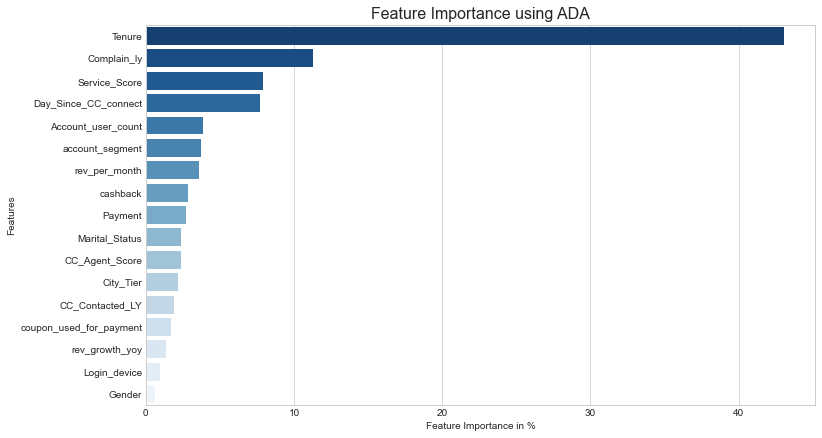

In [331]:
x=pd.DataFrame(best_model.feature_importances_*100,index=K_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='Blues_r')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using ADA')
plt.show()

### GRADIENT BOOSTING

In [332]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

M_train, M_test, n_train, n_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [333]:
param_grid_GRAD = {
    'learning_rate': [0.3,0.8],
    'random_state': [1],
    'criterion': ['friedman_mse','squared_error','mse','absolute_error'],
    'max_depth': [6,12],
    'max_features': [8,11],
    'min_samples_leaf': [250,500],
    'min_samples_split': [1200,4000],
    
}

GRAD = GradientBoostingClassifier()

grid_search_GRAD = GridSearchCV(estimator = GRAD, param_grid = param_grid_GRAD, cv = 3,n_jobs=-1)

In [334]:
grid_search_GRAD.fit(M_train, n_train)

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'absolute_error'],
                         'learning_rate': [0.3, 0.8], 'max_depth': [6, 12],
                         'max_features': [8, 11],
                         'min_samples_leaf': [250, 500],
                         'min_samples_split': [1200, 4000],
                         'random_state': [1]})

In [335]:
print(grid_search_GRAD.best_params_,'\n')
print(grid_search_GRAD.best_estimator_)

{'criterion': 'friedman_mse', 'learning_rate': 0.8, 'max_depth': 6, 'max_features': 11, 'min_samples_leaf': 250, 'min_samples_split': 1200, 'random_state': 1} 

GradientBoostingClassifier(learning_rate=0.8, max_depth=6, max_features=11,
                           min_samples_leaf=250, min_samples_split=1200,
                           random_state=1)


In [336]:
best_model = grid_search_GRAD.best_estimator_
best_model

GradientBoostingClassifier(learning_rate=0.8, max_depth=6, max_features=11,
                           min_samples_leaf=250, min_samples_split=1200,
                           random_state=1)

In [337]:
# Prediction on the training set
ntrain_predict = best_model.predict(M_train)
ntest_predict = best_model.predict(M_test)

In [338]:
## Getting the probabilities on the test set
ntest_predict_prob=best_model.predict_proba(M_test)
pd.DataFrame(ntest_predict_prob).head()

0         1
0  0.998480  0.001520
1  0.999854  0.000146
2  0.998637  0.001363
3  0.997764  0.002236
4  0.023254  0.976746

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6555
           1       0.96      0.92      0.94      1327

    accuracy                           0.98      7882
   macro avg       0.97      0.95      0.96      7882
weighted avg       0.98      0.98      0.98      7882
 



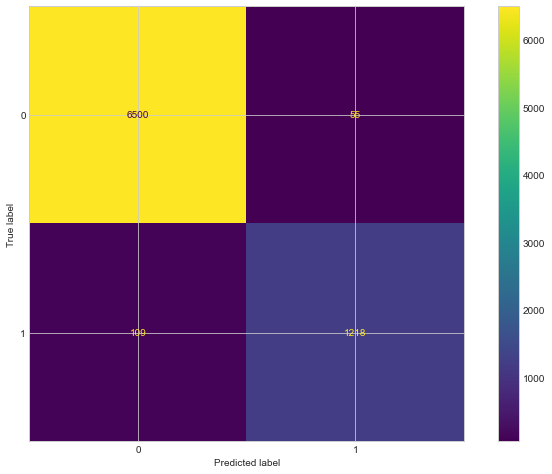

In [339]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,M_train,n_train)
print(classification_report(n_train, ntrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      2809
           1       0.88      0.77      0.82       569

    accuracy                           0.94      3378
   macro avg       0.92      0.87      0.89      3378
weighted avg       0.94      0.94      0.94      3378
 



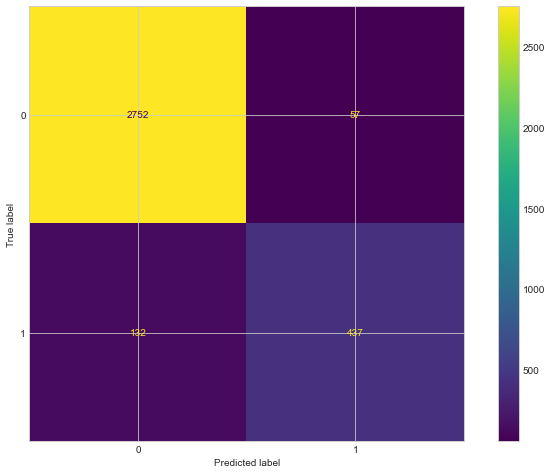

In [340]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,M_test,n_test)
print(classification_report(n_test, ntest_predict),'\n');

In [341]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(M_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(M_test)

AUC for the Training Data: 0.996
AUC for the Test Data: 0.971


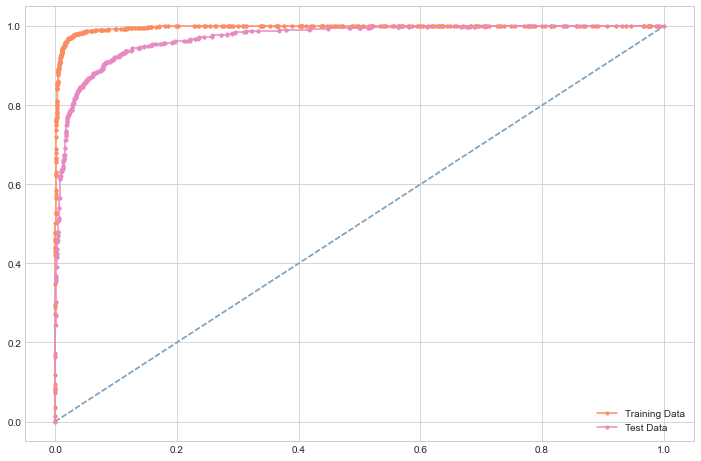

In [342]:
# AUC and ROC for the training data

# calculate AUC
GRAD_train_auc = metrics.roc_auc_score(n_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % GRAD_train_auc)

#  calculate roc curve
fpr_GRAD_train, tpr_GRAD_train, thresholds = metrics.roc_curve(n_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_GRAD_train, tpr_GRAD_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
GRAD_test_auc = metrics.roc_auc_score(n_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % GRAD_test_auc)

#  calculate roc curve
fpr_GRAD_test, tpr_GRAD_test, thresholds = metrics.roc_curve(n_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_GRAD_test, tpr_GRAD_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [343]:
GRAD_metrics=classification_report(n_train, ntrain_predict,output_dict=True)
dfg=pd.DataFrame(GRAD_metrics).transpose()
GRAD_train_f1=round(dfg.loc["1"][2],2)
GRAD_train_recall=round(dfg.loc["1"][1],2)
GRAD_train_precision=round(dfg.loc["1"][0],2)
print ('GRAD_train_precision ',GRAD_train_precision)
print ('GRAD_train_recall ',GRAD_train_recall)
print ('GRAD_train_f1 ',GRAD_train_f1)

GRAD_train_precision  0.96
GRAD_train_recall  0.92
GRAD_train_f1  0.94


In [344]:
GRAD_metrics=classification_report(n_test, ntest_predict,output_dict=True)
dfg=pd.DataFrame(GRAD_metrics).transpose()
GRAD_test_f1=round(dfg.loc["1"][2],2)
GRAD_test_recall=round(dfg.loc["1"][1],2)
GRAD_test_precision=round(dfg.loc["1"][0],2)
print ('GRAD_test_precision ',GRAD_test_precision)
print ('GRAD_test_recall ',GRAD_test_recall)
print ('GRAD_test_f1 ',GRAD_test_f1)

GRAD_test_precision  0.88
GRAD_test_recall  0.77
GRAD_test_f1  0.82


In [345]:
GRAD_train_acc = best_model.score(M_train,n_train)
GRAD_train_acc

0.9791930981984268

In [346]:
GRAD_test_acc = best_model.score(M_test,n_test)
GRAD_test_acc

0.9440497335701599

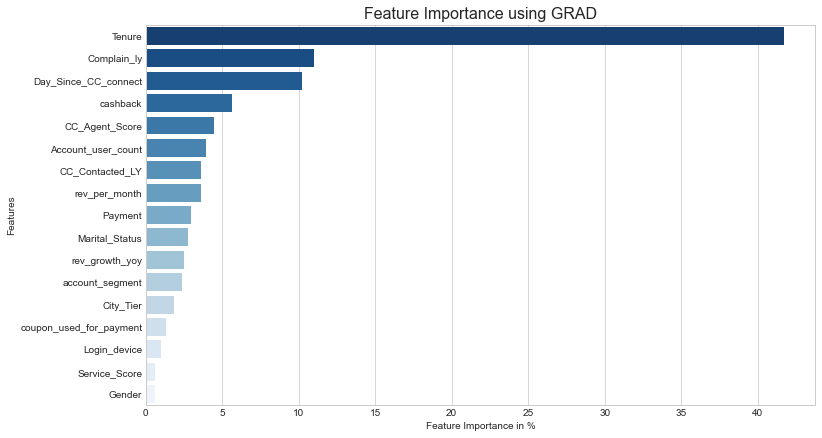

In [347]:
x=pd.DataFrame(best_model.feature_importances_*100,index=M_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='Blues_r')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using GRAD')
plt.show()

### BAGGING

In [348]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

O_train, O_test, p_train, p_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [349]:
param_grid_BAG = {
    'n_estimators': [150,250,500],
    'random_state': [1],
    'max_features': [7,12],
}

cart = DecisionTreeClassifier()

BAG = BaggingClassifier(base_estimator = cart)

grid_search_BAG = GridSearchCV(estimator = BAG, param_grid = param_grid_BAG, cv = 5,n_jobs=-1)

In [350]:
grid_search_BAG.fit(O_train, p_train)

GridSearchCV(cv=5,
             estimator=BaggingClassifier(base_estimator=DecisionTreeClassifier()),
             n_jobs=-1,
             param_grid={'max_features': [7, 12],
                         'n_estimators': [150, 250, 500], 'random_state': [1]})

In [351]:
print(grid_search_BAG.best_params_,'\n')
print(grid_search_BAG.best_estimator_)

{'max_features': 12, 'n_estimators': 250, 'random_state': 1} 

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=12,
                  n_estimators=250, random_state=1)


In [352]:
best_model = grid_search_BAG.best_estimator_
best_model

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_features=12,
                  n_estimators=250, random_state=1)

In [353]:
# Prediction on the training set
ptrain_predict = best_model.predict(O_train)
ptest_predict = best_model.predict(O_test)

In [354]:
## Getting the probabilities on the test set
ptest_predict_prob=best_model.predict_proba(O_test)
pd.DataFrame(ptest_predict_prob).head()

0      1
0  0.952  0.048
1  0.908  0.092
2  0.908  0.092
3  0.984  0.016
4  0.136  0.864

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      1327

    accuracy                           1.00      7882
   macro avg       1.00      1.00      1.00      7882
weighted avg       1.00      1.00      1.00      7882
 



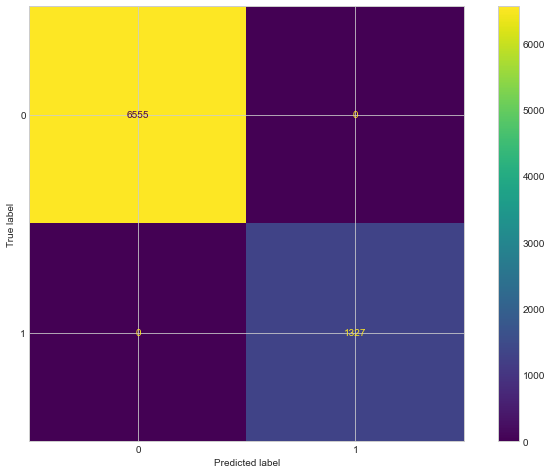

In [355]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,O_train,p_train)
print(classification_report(p_train, ptrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2809
           1       0.99      0.84      0.91       569

    accuracy                           0.97      3378
   macro avg       0.98      0.92      0.95      3378
weighted avg       0.97      0.97      0.97      3378
 



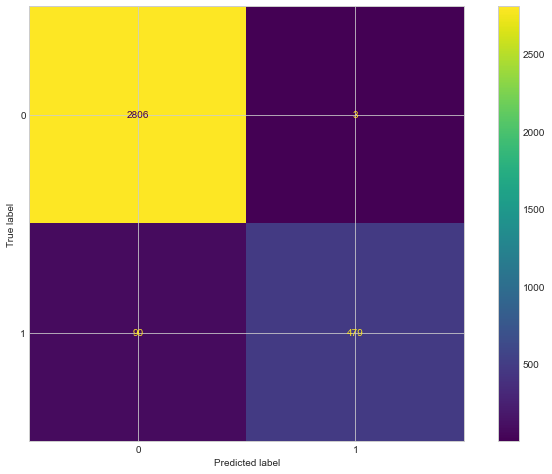

In [356]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,O_test,p_test)
print(classification_report(p_test, ptest_predict),'\n');

In [357]:
# Training Data Probability Prediction
pred_prob_train = best_model.predict_proba(O_train)

# Test Data Probability Prediction
pred_prob_test = best_model.predict_proba(O_test)

AUC for the Training Data: 1.000
AUC for the Test Data: 0.995


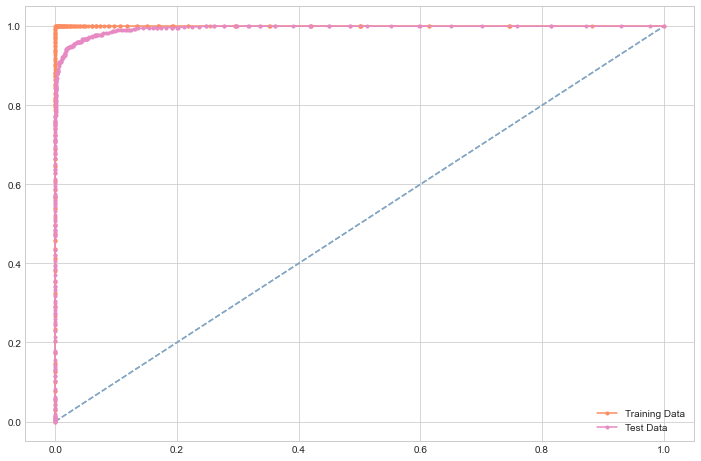

In [358]:
# AUC and ROC for the training data

# calculate AUC
BAG_train_auc = metrics.roc_auc_score(p_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % BAG_train_auc)

#  calculate roc curve
fpr_BAG_train, tpr_BAG_train, thresholds = metrics.roc_curve(p_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_BAG_train, tpr_BAG_train, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
BAG_test_auc = metrics.roc_auc_score(p_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % BAG_test_auc)

#  calculate roc curve
fpr_BAG_test, tpr_BAG_test, thresholds = metrics.roc_curve(p_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr_BAG_test, tpr_BAG_test, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

In [359]:
BAG_metrics=classification_report(p_train, ptrain_predict,output_dict=True)
dfh=pd.DataFrame(BAG_metrics).transpose()
BAG_train_f1=round(dfh.loc["1"][2],2)
BAG_train_recall=round(dfh.loc["1"][1],2)
BAG_train_precision=round(dfh.loc["1"][0],2)
print ('BAG_train_precision ',BAG_train_precision)
print ('BAG_train_recall ',BAG_train_recall)
print ('BAG_train_f1 ',BAG_train_f1)

BAG_train_precision  1.0
BAG_train_recall  1.0
BAG_train_f1  1.0


In [360]:
BAG_metrics=classification_report(p_test, ptest_predict,output_dict=True)
dfh=pd.DataFrame(BAG_metrics).transpose()
BAG_test_f1=round(dfh.loc["1"][2],2)
BAG_test_recall=round(dfh.loc["1"][1],2)
BAG_test_precision=round(dfh.loc["1"][0],2)
print ('BAG_test_precision ',BAG_test_precision)
print ('BAG_test_recall ',BAG_test_recall)
print ('BAG_test_f1 ',BAG_test_f1)

BAG_test_precision  0.99
BAG_test_recall  0.84
BAG_test_f1  0.91


In [361]:
BAG_train_acc = best_model.score(O_train,p_train)
BAG_train_acc

1.0

In [362]:
BAG_test_acc = best_model.score(O_test,p_test)
BAG_test_acc

0.9724689165186501

### DECISION TREE - CART

In [363]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

S_train, S_test, t_train, t_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [364]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [7,8,9,10],
    'min_samples_leaf': [12,15,17],
    'min_samples_split': [20,25,30,40],
}

dtcl = DecisionTreeClassifier(random_state=1)
grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 5)

In [365]:
#Fitting the training dataset
grid_search_dtcl.fit(S_train,t_train)
print(grid_search_dtcl.best_estimator_)
best_grid_dtcl = grid_search_dtcl.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=12, min_samples_split=25,
                       random_state=1)


In [366]:
print (pd.DataFrame(grid_search_dtcl.best_estimator_.feature_importances_, columns = ["Imp"], 
                    index = S_train.columns).sort_values('Imp',ascending=False))

                              Imp
Tenure                   0.425166
Complain_ly              0.074102
CC_Agent_Score           0.070408
Marital_Status           0.063492
Day_Since_CC_connect     0.061075
rev_per_month            0.054749
CC_Contacted_LY          0.049141
rev_growth_yoy           0.042570
City_Tier                0.031722
cashback                 0.029876
Login_device             0.027931
Payment                  0.026784
account_segment          0.019474
Account_user_count       0.011389
Gender                   0.005516
Service_Score            0.004021
coupon_used_for_payment  0.002584


In [367]:
train_char_label = ['No', 'Yes']
claim_tree_regularized = open('claim_tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= claim_tree_regularized , feature_names = list(S_train), class_names = list(train_char_label))

claim_tree_regularized.close()

print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], index = S_train.columns))

                              Imp
Tenure                   0.425166
City_Tier                0.031722
CC_Contacted_LY          0.049141
Gender                   0.005516
Account_user_count       0.011389
rev_per_month            0.054749
Complain_ly              0.074102
rev_growth_yoy           0.042570
coupon_used_for_payment  0.002584
Day_Since_CC_connect     0.061075
cashback                 0.029876
Payment                  0.026784
account_segment          0.019474
Marital_Status           0.063492
Login_device             0.027931
Service_Score            0.004021
CC_Agent_Score           0.070408


In [368]:
ytrain_predict = best_grid_dtcl.predict(S_train)
ytest_predict = best_grid_dtcl.predict(S_test)

AUC: 0.977


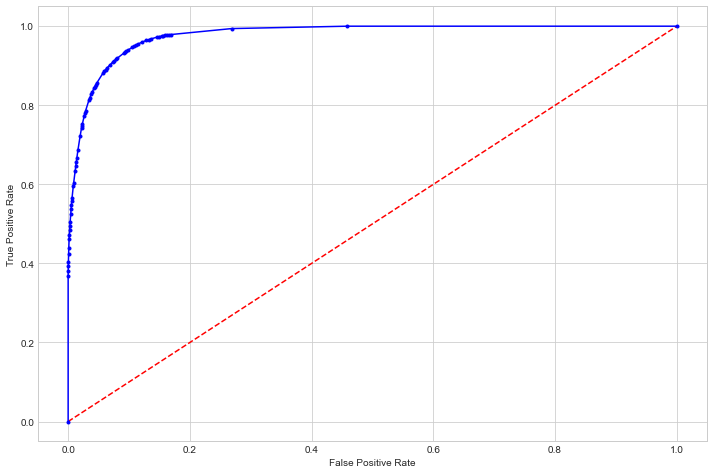

In [369]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_dtcl.predict_proba(S_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_train_auc = roc_auc_score(t_train, probs)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_train_fpr, cart_train_tpr, thresholds = roc_curve(t_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr, marker='.',color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.922


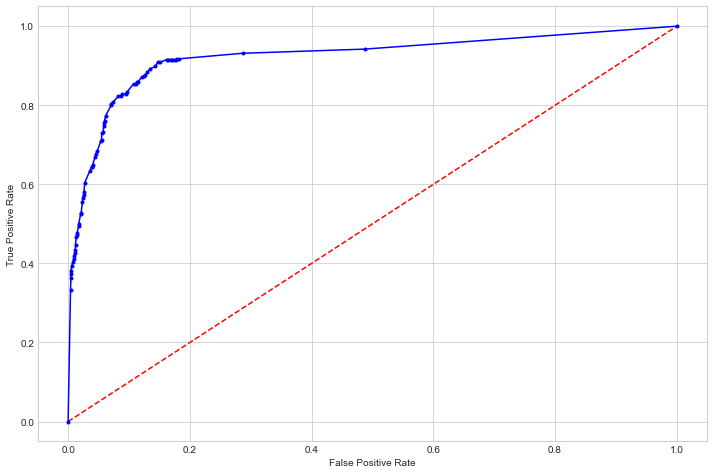

In [370]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_dtcl.predict_proba(S_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
cart_test_auc = roc_auc_score(t_test, probs)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
cart_test_fpr, cart_test_tpr, thresholds = roc_curve(t_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr, marker='.',color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      6555
           1       0.85      0.79      0.82      1327

    accuracy                           0.94      7882
   macro avg       0.90      0.88      0.89      7882
weighted avg       0.94      0.94      0.94      7882
 



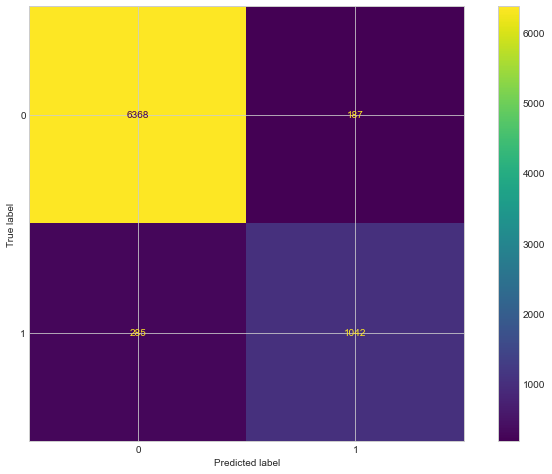

In [371]:
## Confusion matrix on the train data
plot_confusion_matrix(best_grid_dtcl,S_train,t_train)
print(classification_report(t_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.94      0.95      0.94      2809
           1       0.74      0.68      0.71       569

    accuracy                           0.91      3378
   macro avg       0.84      0.82      0.83      3378
weighted avg       0.90      0.91      0.91      3378
 



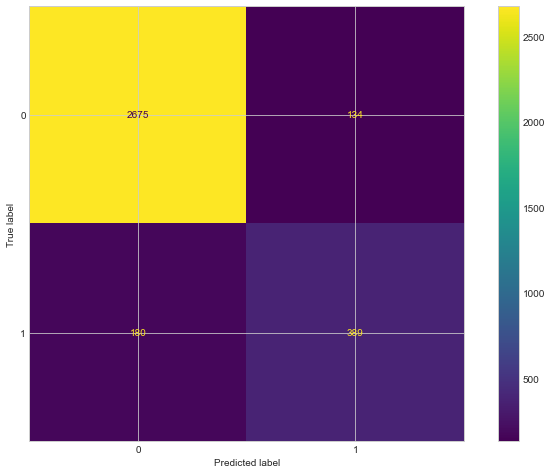

In [372]:
## Confusion matrix on the test data
plot_confusion_matrix(best_grid_dtcl,S_test,t_test)
print(classification_report(t_test, ytest_predict),'\n');

In [373]:
CART_train_acc = best_grid_dtcl.score(S_train,t_train)
CART_train_acc

0.9401167216442528

In [374]:
CART_test_acc = best_grid_dtcl.score(S_test,t_test)
CART_test_acc

0.9070455891059799

In [375]:
CART_metrics=classification_report(t_train, ytrain_predict,output_dict=True)
dfj=pd.DataFrame(CART_metrics).transpose()
CART_train_f1=round(dfj.loc["1"][2],2)
CART_train_recall=round(dfj.loc["1"][1],2)
CART_train_precision=round(dfj.loc["1"][0],2)
print ('CART_train_precision ',CART_train_precision)
print ('CART_train_recall ',CART_train_recall)
print ('CART_train_f1 ',CART_train_f1)

CART_train_precision  0.85
CART_train_recall  0.79
CART_train_f1  0.82


In [376]:
CART_metrics=classification_report(t_test, ytest_predict,output_dict=True)
dfj=pd.DataFrame(CART_metrics).transpose()
CART_test_f1=round(dfj.loc["1"][2],2)
CART_test_recall=round(dfj.loc["1"][1],2)
CART_test_precision=round(dfj.loc["1"][0],2)
print ('CART_test_precision ',CART_test_precision)
print ('CART_test_recall ',CART_test_recall)
print ('CART_test_f1 ',CART_test_f1)

CART_test_precision  0.74
CART_test_recall  0.68
CART_test_f1  0.71


### ARTIFICIAL NEURAL NETWORK

In [377]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

U_train, U_test, v_train, v_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [378]:
param_grid_anncl = {
    'hidden_layer_sizes': [250,500,800],
    'max_iter': [2500,5000,7500],
    'solver': ['adam'],
    'tol': [0.01,0.1,0.7], 
}

anncl = MLPClassifier(random_state=1)

grid_search_anncl = GridSearchCV(estimator = anncl, param_grid = param_grid_anncl, cv = 3)

In [379]:
grid_search_anncl.fit(U_train, v_train)
grid_search_anncl.best_params_
best_grid_anncl = grid_search_anncl.best_estimator_
best_grid_anncl

MLPClassifier(hidden_layer_sizes=250, max_iter=2500, random_state=1, tol=0.01)

In [380]:
ytrain_predict_anncl = best_grid_anncl.predict(U_train)
ytest_predict_anncl = best_grid_anncl.predict(U_test)

AUC: 0.894


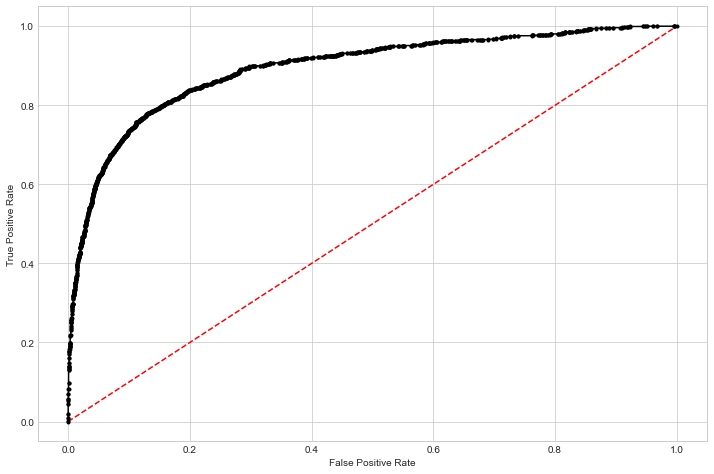

In [381]:
# AUC and ROC for the training data

# predict probabilities
probs = best_grid_anncl.predict_proba(U_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
anncl_train_auc = roc_auc_score(v_train, probs)
print('AUC: %.3f' % anncl_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
anncl_train_fpr, anncl_train_tpr, thresholds = roc_curve(v_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
# plot the roc curve for the model
plt.plot(anncl_train_fpr, anncl_train_tpr, marker='.',color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.880


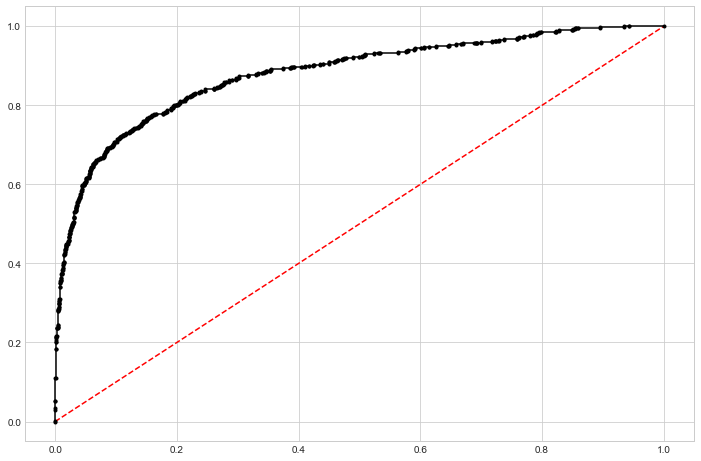

In [382]:
# AUC and ROC for the test data


# predict probabilities
probs = best_grid_anncl.predict_proba(U_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
anncl_test_auc = roc_auc_score(v_test, probs)
print('AUC: %.3f' % anncl_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
anncl_test_fpr, anncl_test_tpr, thresholds = roc_curve(v_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
# plot the roc curve for the model
plt.plot(anncl_test_fpr, anncl_test_tpr, marker='.',color='black')
# show the plot
plt.show()

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      6555
           1       0.87      0.34      0.49      1327

    accuracy                           0.88      7882
   macro avg       0.87      0.66      0.71      7882
weighted avg       0.88      0.88      0.86      7882
 



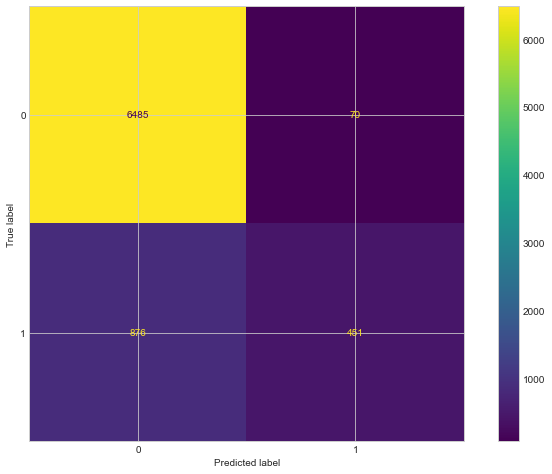

In [383]:
## Confusion matrix on the train data
plot_confusion_matrix(best_grid_anncl,U_train,v_train)
print(classification_report(v_train, ytrain_predict_anncl),'\n');

              precision    recall  f1-score   support

           0       0.88      0.99      0.93      2809
           1       0.90      0.34      0.49       569

    accuracy                           0.88      3378
   macro avg       0.89      0.67      0.71      3378
weighted avg       0.88      0.88      0.86      3378
 



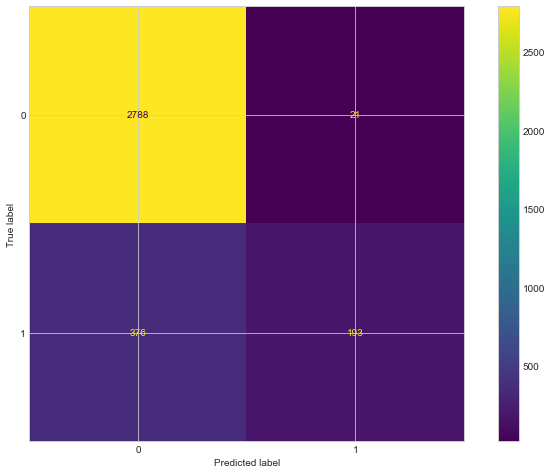

In [384]:
## Confusion matrix on the test data
plot_confusion_matrix(best_grid_anncl,U_test,v_test)
print(classification_report(v_test, ytest_predict_anncl),'\n');

In [385]:
ANN_train_acc = best_grid_anncl.score(U_train,v_train)
ANN_train_acc

0.8799797005836082

In [386]:
ANN_test_acc = best_grid_anncl.score(U_test,v_test)
ANN_test_acc

0.8824748371817643

In [387]:
ANN_metrics=classification_report(v_train, ytrain_predict_anncl,output_dict=True)
dfj=pd.DataFrame(ANN_metrics).transpose()
ANN_train_f1=round(dfj.loc["1"][2],2)
ANN_train_recall=round(dfj.loc["1"][1],2)
ANN_train_precision=round(dfj.loc["1"][0],2)
print ('ANN_train_precision ',ANN_train_precision)
print ('ANN_train_recall ',ANN_train_recall)
print ('ANN_train_f1 ',ANN_train_f1)

ANN_train_precision  0.87
ANN_train_recall  0.34
ANN_train_f1  0.49


In [388]:
ANN_metrics=classification_report(v_test, ytest_predict_anncl,output_dict=True)
dfj=pd.DataFrame(ANN_metrics).transpose()
ANN_test_f1=round(dfj.loc["1"][2],2)
ANN_test_recall=round(dfj.loc["1"][1],2)
ANN_test_precision=round(dfj.loc["1"][0],2)
print ('ANN_test_precision ',ANN_test_precision)
print ('ANN_test_recall ',ANN_test_recall)
print ('ANN_test_f1 ',ANN_test_f1)

ANN_test_precision  0.9
ANN_test_recall  0.34
ANN_test_f1  0.49


### XGBOOST

In [389]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

W_train, W_test, w_train, w_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [390]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1)

# Grid of parameters to choose from
## add from
parameters = {
    "n_estimators": [250,500],
    "scale_pos_weight":[0,3,5],
    "subsample":[0.5,0.7,1],
    "learning_rate":[0.01,0.1],
    "gamma":[0,1,3],
    "colsample_bytree":[0.5,0.7,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
acc_scorer = metrics.make_scorer(metrics.recall_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=acc_scorer,cv=3)
grid_obj = grid_obj.fit(W_train, w_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(W_train, w_train)

[22:42:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:42:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:42:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:43:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:44:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:44:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:45:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:45:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:46:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:47:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:47:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:48:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:48:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:48:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:49:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:49:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:50:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:50:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:51:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:51:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:51:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:52:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:53:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:53:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:54:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:54:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:55:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:55:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:56:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:56:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:57:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:58:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:58:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[22:59:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[22:59:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:00:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:00:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:00:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:01:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:01:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:01:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:03:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:04:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:05:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:05:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:05:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:06:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:06:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:07:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:07:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:08:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:08:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:09:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:09:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:09:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:10:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:10:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:11:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:11:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:12:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:12:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:13:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:14:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:14:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:14:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:15:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:16:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:16:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:16:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:17:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:17:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:17:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:18:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:18:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:19:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:19:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:20:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:21:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:21:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:21:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:22:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:22:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:23:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:23:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:24:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:24:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:25:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:26:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:26:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:28:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:29:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:29:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:30:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:30:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:30:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:31:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:31:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:32:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:32:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:33:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:34:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:34:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:35:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:35:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:35:38] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:36:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:36:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:53] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:36:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:37:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:38:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:38:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:38:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:38:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:39:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:39:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:40:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:40:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:41:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:41:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:42:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:42:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:43:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:43:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:44:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:44:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:44:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:45:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:45:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:47:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:47:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

[23:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[23:48:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [391]:
xgb_tuned

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.7,
              colsample_bynode=1, colsample_bytree=0.5, gamma=3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=250, n_jobs=8, num_parallel_tree=1, random_state=1,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=5, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [392]:
ytrain_predict_xgb = xgb_tuned.predict(W_train)
ytest_predict_xgb = xgb_tuned.predict(W_test)

AUC: 1.000


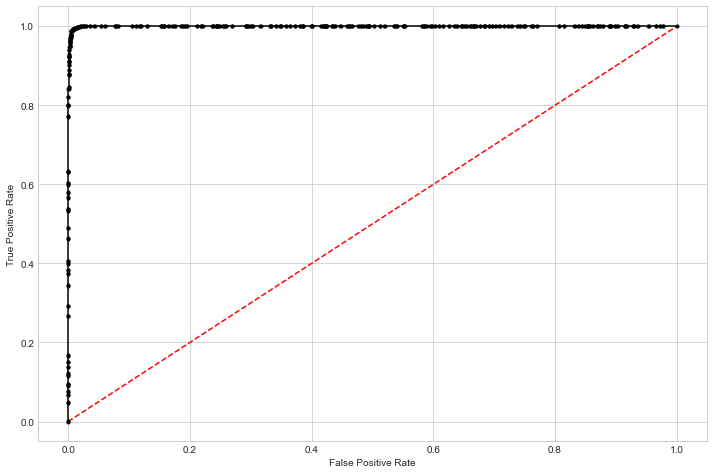

In [393]:
# AUC and ROC for the training data

# predict probabilities
probs = xgb_tuned.predict_proba(W_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
xgb_train_auc = roc_auc_score(w_train, probs)
print('AUC: %.3f' % xgb_train_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
xgb_train_fpr, xgb_train_tpr, thresholds = roc_curve(w_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
# plot the roc curve for the model
plt.plot(xgb_train_fpr, xgb_train_tpr, marker='.',color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the plot
plt.show()

AUC: 0.989


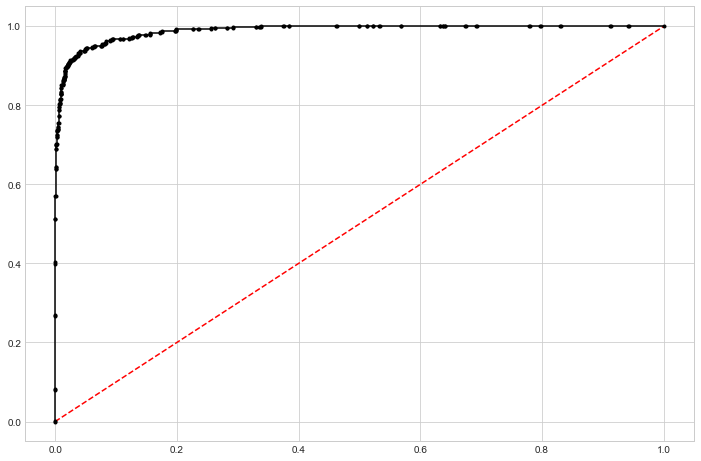

In [394]:
# AUC and ROC for the test data


# predict probabilities
probs = xgb_tuned.predict_proba(W_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
xgb_test_auc = roc_auc_score(w_test, probs)
print('AUC: %.3f' % xgb_test_auc)
# calculate roc curve
from sklearn.metrics import roc_curve
xgb_test_fpr, xgb_test_tpr, thresholds = roc_curve(w_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--',color='red')
# plot the roc curve for the model
plt.plot(xgb_test_fpr, xgb_test_tpr, marker='.',color='black')
# show the plot
plt.show()

In [395]:
xgb_train_acc = xgb_tuned.score(W_train,w_train)
xgb_train_acc

0.9831261101243339

In [396]:
xgb_test_acc = xgb_tuned.score(W_test,w_test)
xgb_test_acc

0.9564831261101243

              precision    recall  f1-score   support

           0       1.00      0.98      0.99      6555
           1       0.91      1.00      0.95      1327

    accuracy                           0.98      7882
   macro avg       0.95      0.99      0.97      7882
weighted avg       0.98      0.98      0.98      7882
 



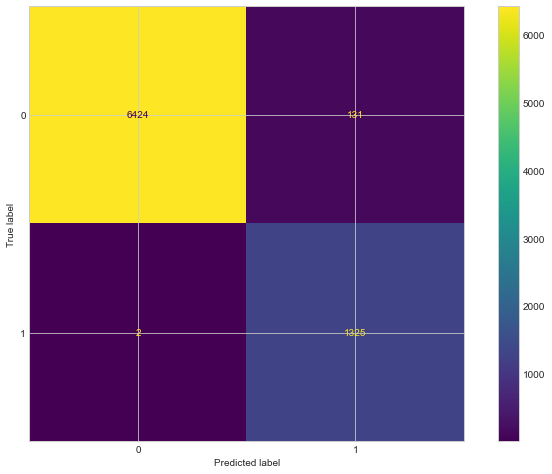

In [397]:
## Confusion matrix on the train data
plot_confusion_matrix(xgb_tuned,W_train,w_train)
print(classification_report(w_train, ytrain_predict_xgb),'\n');

              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2809
           1       0.83      0.92      0.88       569

    accuracy                           0.96      3378
   macro avg       0.91      0.94      0.93      3378
weighted avg       0.96      0.96      0.96      3378
 



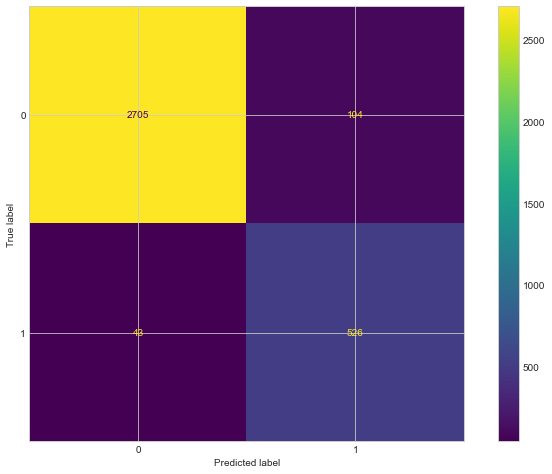

In [398]:
## Confusion matrix on the train data
plot_confusion_matrix(xgb_tuned,W_test,w_test)
print(classification_report(w_test, ytest_predict_xgb),'\n');

In [399]:
xgb_metrics=classification_report(w_train, ytrain_predict_xgb,output_dict=True)
dfj=pd.DataFrame(xgb_metrics).transpose()
xgb_train_f1=round(dfj.loc["1"][2],2)
xgb_train_recall=round(dfj.loc["1"][1],2)
xgb_train_precision=round(dfj.loc["1"][0],2)
print ('xgb_train_precision ',xgb_train_precision)
print ('xgb_train_recall ',xgb_train_recall)
print ('xgb_train_f1 ',xgb_train_f1)

xgb_train_precision  0.91
xgb_train_recall  1.0
xgb_train_f1  0.95


In [400]:
xgb_metrics=classification_report(w_test, ytest_predict_xgb,output_dict=True)
dfj=pd.DataFrame(xgb_metrics).transpose()
xgb_test_f1=round(dfj.loc["1"][2],2)
xgb_test_recall=round(dfj.loc["1"][1],2)
xgb_test_precision=round(dfj.loc["1"][0],2)
print ('xgb_test_precision ',xgb_test_precision)
print ('xgb_test_recall ',xgb_test_recall)
print ('xgb_test_f1 ',xgb_test_f1)

xgb_test_precision  0.83
xgb_test_recall  0.92
xgb_test_f1  0.88


### SMOTE - Synthetic Minority Oversampling Technique

In [401]:
# Splitting the dataset into training and testing sets for the independent variables (70:30)

Q_train, Q_test, r_train, r_test = train_test_split(A, b, test_size=.30, random_state=1,stratify=b)

In [402]:
#SMOTE is applied on the training set only
sm = SMOTE(random_state=1,k_neighbors=5,n_jobs=-1)
Q_train_res, r_train_res = sm.fit_resample(Q_train, r_train)

In [403]:
r_train.value_counts()

0    6555
1    1327
Name: Churn, dtype: int64

In [404]:
r_train_res.value_counts()

0    6555
1    6555
Name: Churn, dtype: int64

In [405]:
Q_train.shape

(7882, 17)

In [406]:
Q_train_res.shape

(13110, 17)

### Naive Bayes with SMOTE

In [407]:
#Build NB Model
NB_SMOTE = GaussianNB()
best_model=NB_SMOTE.fit(Q_train_res,r_train_res)

In [408]:
# Training Data Class Prediction
pred_class_train = best_model.predict(Q_train_res)

# Test Data Class Prediction
pred_class_test = best_model.predict(Q_test)

In [409]:
NB_SMOTE_train_acc = best_model.score(Q_train_res,r_train_res)
NB_SMOTE_train_acc

0.7324942791762014

In [410]:
NB_SMOTE_test_acc = best_model.score(Q_test,r_test)
NB_SMOTE_test_acc

0.6740674955595026

              precision    recall  f1-score   support

           0       0.77      0.66      0.71      6555
           1       0.70      0.81      0.75      6555

    accuracy                           0.73     13110
   macro avg       0.74      0.73      0.73     13110
weighted avg       0.74      0.73      0.73     13110
 



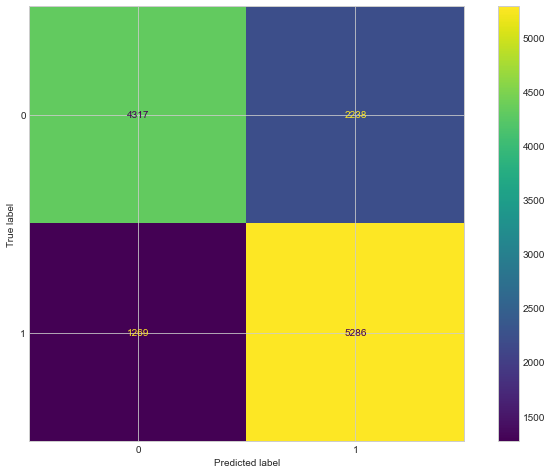

In [411]:
## Confusion matrix on the train data
plot_confusion_matrix(best_model,Q_train_res,r_train_res)
print(classification_report(r_train_res, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.93      0.66      0.77      2809
           1       0.31      0.75      0.44       569

    accuracy                           0.67      3378
   macro avg       0.62      0.71      0.60      3378
weighted avg       0.82      0.67      0.71      3378
 



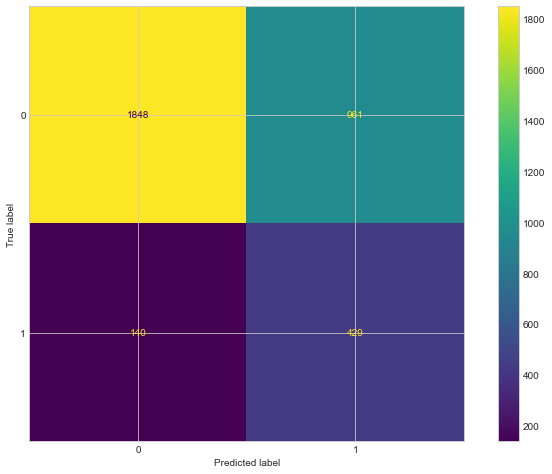

In [412]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,Q_test,r_test)
print(classification_report(r_test, pred_class_test),'\n');

In [413]:
NB_SMOTE_metrics=classification_report(r_train_res, pred_class_train,output_dict=True)
dfj=pd.DataFrame(NB_SMOTE_metrics).transpose()
NB_SMOTE_train_f1=round(dfj.loc["1"][2],2)
NB_SMOTE_train_recall=round(dfj.loc["1"][1],2)
NB_SMOTE_train_precision=round(dfj.loc["1"][0],2)
print ('NB_SMOTE_train_precision ',NB_SMOTE_train_precision)
print ('NB_SMOTE_train_recall ',NB_SMOTE_train_recall)
print ('NB_SMOTE_train_f1 ',NB_SMOTE_train_f1)

NB_SMOTE_train_precision  0.7
NB_SMOTE_train_recall  0.81
NB_SMOTE_train_f1  0.75


In [414]:
NB_SMOTE_metrics=classification_report(r_test, pred_class_test,output_dict=True)
dfj=pd.DataFrame(NB_SMOTE_metrics).transpose()
NB_SMOTE_test_f1=round(dfj.loc["1"][2],2)
NB_SMOTE_test_recall=round(dfj.loc["1"][1],2)
NB_SMOTE_test_precision=round(dfj.loc["1"][0],2)
print ('NB_SMOTE_test_precision ',NB_SMOTE_test_precision)
print ('NB_SMOTE_test_recall ',NB_SMOTE_test_recall)
print ('NB_SMOTE_test_f1 ',NB_SMOTE_test_f1)

NB_SMOTE_test_precision  0.31
NB_SMOTE_test_recall  0.75
NB_SMOTE_test_f1  0.44


### KNN WITH SMOTE

In [415]:
KNN_SMOTE=KNeighborsClassifier()
best_model = KNN_SMOTE.fit(Q_train_res,r_train_res)

In [416]:
# Training Data Class Prediction
pred_class_train = best_model.predict(Q_train_res)

# Test Data Class Prediction
pred_class_test = best_model.predict(Q_test)

In [417]:
KNN_SMOTE_train_acc = best_model.score(Q_train_res,r_train_res)
KNN_SMOTE_train_acc

0.932418001525553

In [418]:
KNN_SMOTE_test_acc = best_model.score(Q_test,r_test)
KNN_SMOTE_test_acc

0.8306690349319124

              precision    recall  f1-score   support

           0       1.00      0.87      0.93      6555
           1       0.88      1.00      0.94      6555

    accuracy                           0.93     13110
   macro avg       0.94      0.93      0.93     13110
weighted avg       0.94      0.93      0.93     13110
 



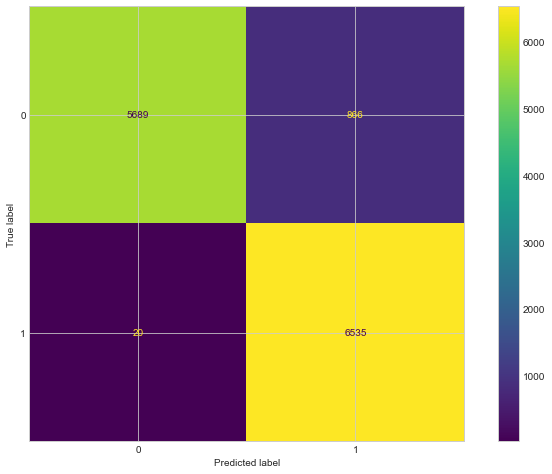

In [419]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,Q_train_res,r_train_res)
print(classification_report(r_train_res, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.97      0.82      0.89      2809
           1       0.50      0.86      0.63       569

    accuracy                           0.83      3378
   macro avg       0.73      0.84      0.76      3378
weighted avg       0.89      0.83      0.85      3378
 



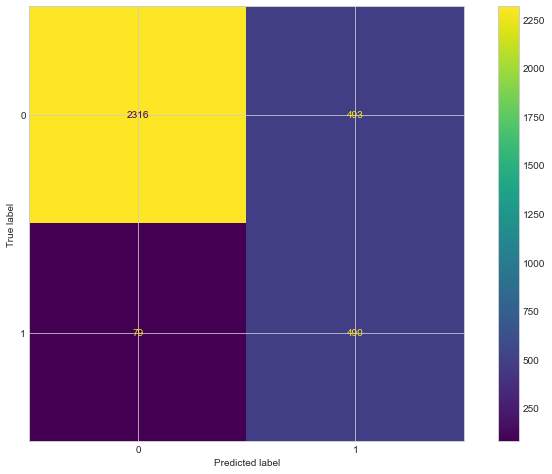

In [420]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,Q_test,r_test)
print(classification_report(r_test, pred_class_test),'\n');

In [421]:
KNN_SMOTE_metrics=classification_report(r_train_res, pred_class_train,output_dict=True)
dfi=pd.DataFrame(KNN_SMOTE_metrics).transpose()
KNN_SMOTE_train_f1=round(dfi.loc["1"][2],2)
KNN_SMOTE_train_recall=round(dfi.loc["1"][1],2)
KNN_SMOTE_train_precision=round(dfi.loc["1"][0],2)
print ('KNN_SMOTE_train_precision ',KNN_SMOTE_train_precision)
print ('KNN_SMOTE_train_recall ',KNN_SMOTE_train_recall)
print ('KNN_SMOTE_train_f1 ',KNN_SMOTE_train_f1)

KNN_SMOTE_train_precision  0.88
KNN_SMOTE_train_recall  1.0
KNN_SMOTE_train_f1  0.94


In [422]:
KNN_SMOTE_metrics=classification_report(r_test, pred_class_test,output_dict=True)
dfi=pd.DataFrame(KNN_SMOTE_metrics).transpose()
KNN_SMOTE_test_f1=round(dfi.loc["1"][2],2)
KNN_SMOTE_test_recall=round(dfi.loc["1"][1],2)
KNN_SMOTE_test_precision=round(dfi.loc["1"][0],2)
print ('KNN_SMOTE_test_precision ',KNN_SMOTE_test_precision)
print ('KNN_SMOTE_test_recall ',KNN_SMOTE_test_recall)
print ('KNN_SMOTE_test_f1 ',KNN_SMOTE_test_f1)

KNN_SMOTE_test_precision  0.5
KNN_SMOTE_test_recall  0.86
KNN_SMOTE_test_f1  0.63


In [423]:
index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'NB SMOTE Train Results':[NB_SMOTE_train_acc,NB_SMOTE_train_recall,NB_SMOTE_train_precision,NB_SMOTE_train_f1],
        'NB SMOTE Test Results':[NB_SMOTE_test_acc,NB_SMOTE_test_recall,NB_SMOTE_test_precision,NB_SMOTE_test_f1],
        'KNN SMOTE Train Results':[KNN_SMOTE_train_acc,KNN_SMOTE_train_recall,KNN_SMOTE_train_precision,KNN_SMOTE_train_f1],
        'KNN SMOTE Test Results':[KNN_SMOTE_test_acc,KNN_SMOTE_test_recall,KNN_SMOTE_test_precision,KNN_SMOTE_test_f1],},index=index)
round(data,4)

NB SMOTE Train Results  NB SMOTE Test Results  \
Accuracy                   0.7325                 0.6741   
Recall                     0.8100                 0.7500   
Precision                  0.7000                 0.3100   
F1 Score                   0.7500                 0.4400   

           KNN SMOTE Train Results  KNN SMOTE Test Results  
Accuracy                    0.9324                  0.8307  
Recall                      1.0000                  0.8600  
Precision                   0.8800                  0.5000  
F1 Score                    0.9400                  0.6300

### ADA BOOSTING WITH SMOTE

In [424]:
best_model = grid_search_ADA.fit(Q_train_res, r_train_res)

In [425]:
# Training Data Class Prediction
pred_class_train = best_model.predict(Q_train_res)

# Test Data Class Prediction
pred_class_test = best_model.predict(Q_test)

In [426]:
ADA_SMOTE_train_acc = best_model.score(Q_train_res,r_train_res)
ADA_SMOTE_train_acc

0.9236460717009916

In [427]:
ADA_SMOTE_test_acc = best_model.score(Q_test,r_test)
ADA_SMOTE_test_acc

0.8934280639431617

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      6555
           1       0.93      0.91      0.92      6555

    accuracy                           0.92     13110
   macro avg       0.92      0.92      0.92     13110
weighted avg       0.92      0.92      0.92     13110
 



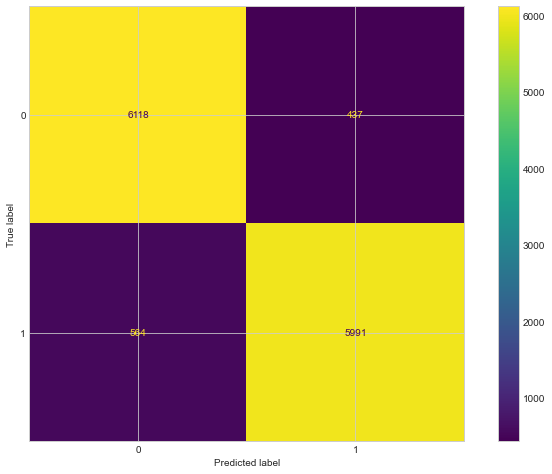

In [428]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,Q_train_res,r_train_res)
print(classification_report(r_train_res, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.93      0.94      0.94      2809
           1       0.69      0.68      0.68       569

    accuracy                           0.89      3378
   macro avg       0.81      0.81      0.81      3378
weighted avg       0.89      0.89      0.89      3378
 



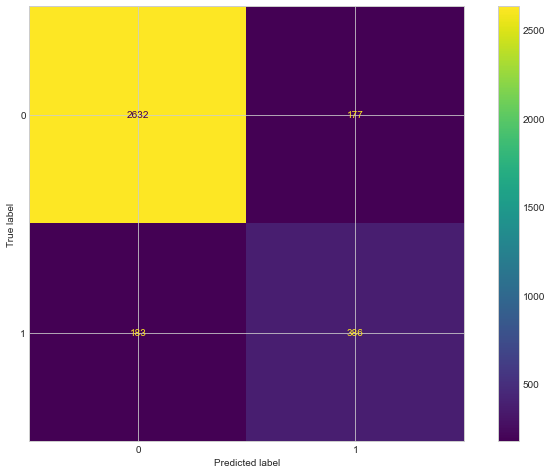

In [429]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,Q_test,r_test)
print(classification_report(r_test, pred_class_test),'\n');

In [430]:
ADA_SMOTE_metrics=classification_report(r_train_res, pred_class_train,output_dict=True)
dfi=pd.DataFrame(ADA_SMOTE_metrics).transpose()
ADA_SMOTE_train_f1=round(dfi.loc["1"][2],2)
ADA_SMOTE_train_recall=round(dfi.loc["1"][1],2)
ADA_SMOTE_train_precision=round(dfi.loc["1"][0],2)
print ('ADA_SMOTE_train_precision ',ADA_SMOTE_train_precision)
print ('ADA_SMOTE_train_recall ',ADA_SMOTE_train_recall)
print ('ADA_SMOTE_train_f1 ',ADA_SMOTE_train_f1)

ADA_SMOTE_train_precision  0.93
ADA_SMOTE_train_recall  0.91
ADA_SMOTE_train_f1  0.92


In [431]:
ADA_SMOTE_metrics=classification_report(r_test, pred_class_test,output_dict=True)
dfi=pd.DataFrame(ADA_SMOTE_metrics).transpose()
ADA_SMOTE_test_f1=round(dfi.loc["1"][2],2)
ADA_SMOTE_test_recall=round(dfi.loc["1"][1],2)
ADA_SMOTE_test_precision=round(dfi.loc["1"][0],2)
print ('ADA_SMOTE_test_precision ',ADA_SMOTE_test_precision)
print ('ADA_SMOTE_test_recall ',ADA_SMOTE_test_recall)
print ('ADA_SMOTE_test_f1 ',ADA_SMOTE_test_f1)

ADA_SMOTE_test_precision  0.69
ADA_SMOTE_test_recall  0.68
ADA_SMOTE_test_f1  0.68


### GRADIENT BOOSTING WITH SMOTE

In [432]:
best_model = grid_search_GRAD.fit(Q_train_res, r_train_res)
best_model

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse',
                                       'absolute_error'],
                         'learning_rate': [0.3, 0.8], 'max_depth': [6, 12],
                         'max_features': [8, 11],
                         'min_samples_leaf': [250, 500],
                         'min_samples_split': [1200, 4000],
                         'random_state': [1]})

In [433]:
# Training Data Class Prediction
pred_class_train = best_model.predict(Q_train_res)

# Test Data Class Prediction
pred_class_test = best_model.predict(Q_test)

In [434]:
GRAD_SMOTE_train_acc = best_model.score(Q_train_res,r_train_res)
GRAD_SMOTE_train_acc

0.9999237223493517

In [435]:
GRAD_SMOTE_test_acc = best_model.score(Q_test,r_test)
GRAD_SMOTE_test_acc

0.9520426287744227

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6555
           1       1.00      1.00      1.00      6555

    accuracy                           1.00     13110
   macro avg       1.00      1.00      1.00     13110
weighted avg       1.00      1.00      1.00     13110
 



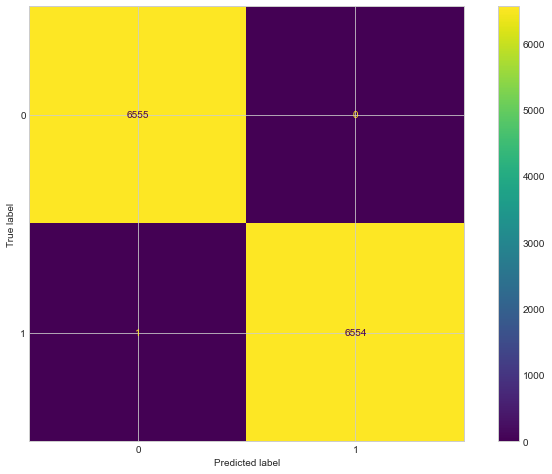

In [436]:
## Confusion matrix on the training data
plot_confusion_matrix(best_model,Q_train_res,r_train_res)
print(classification_report(r_train_res, pred_class_train),'\n');

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2809
           1       0.88      0.83      0.85       569

    accuracy                           0.95      3378
   macro avg       0.92      0.90      0.91      3378
weighted avg       0.95      0.95      0.95      3378
 



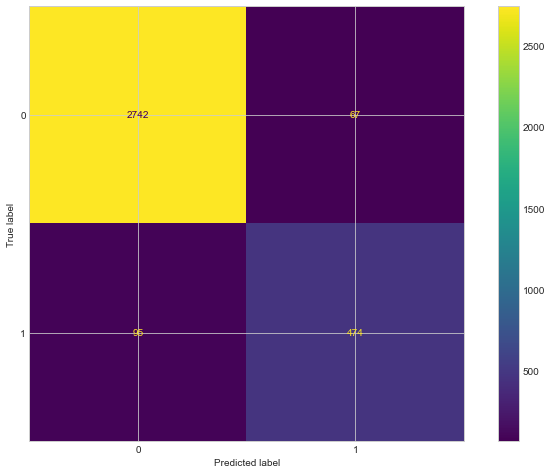

In [437]:
## Confusion matrix on the test data
plot_confusion_matrix(best_model,Q_test,r_test)
print(classification_report(r_test, pred_class_test),'\n');

In [438]:
GRAD_SMOTE_metrics=classification_report(r_train_res, pred_class_train,output_dict=True)
dfi=pd.DataFrame(GRAD_SMOTE_metrics).transpose()
GRAD_SMOTE_train_f1=round(dfi.loc["1"][2],2)
GRAD_SMOTE_train_recall=round(dfi.loc["1"][1],2)
GRAD_SMOTE_train_precision=round(dfi.loc["1"][0],2)
print ('GRAD_SMOTE_train_precision ',GRAD_SMOTE_train_precision)
print ('GRAD_SMOTE_train_recall ',GRAD_SMOTE_train_recall)
print ('GRAD_SMOTE_train_f1 ',GRAD_SMOTE_train_f1)

GRAD_SMOTE_train_precision  1.0
GRAD_SMOTE_train_recall  1.0
GRAD_SMOTE_train_f1  1.0


In [439]:
GRAD_SMOTE_metrics=classification_report(r_test, pred_class_test,output_dict=True)
dfi=pd.DataFrame(GRAD_SMOTE_metrics).transpose()
GRAD_SMOTE_test_f1=round(dfi.loc["1"][2],2)
GRAD_SMOTE_test_recall=round(dfi.loc["1"][1],2)
GRAD_SMOTE_test_precision=round(dfi.loc["1"][0],2)
print ('GRAD_SMOTE_test_precision ',GRAD_SMOTE_test_precision)
print ('GRAD_SMOTE_test_recall ',GRAD_SMOTE_test_recall)
print ('GRAD_SMOTE_test_f1 ',GRAD_SMOTE_test_f1)

GRAD_SMOTE_test_precision  0.88
GRAD_SMOTE_test_recall  0.83
GRAD_SMOTE_test_f1  0.85


### Cross Validation on Naive Bayes SMOTE Model & KNN SMOTE Model

In [440]:
from sklearn.model_selection import cross_val_score
scores_NB_SMOTE = cross_val_score(NB_SMOTE, Q_train_res, r_train_res, cv=12)
scores_NB_SMOTE

array([0.72369625, 0.70905764, 0.73284538, 0.74748399, 0.72827081,
       0.74565416, 0.73626374, 0.74450549, 0.72069597, 0.73168498,
       0.72252747, 0.74175824])

In [441]:
sscores_NB_SMOTEcores = cross_val_score(NB_SMOTE, Q_test, r_test, cv=12)
scores_NB_SMOTE

array([0.72369625, 0.70905764, 0.73284538, 0.74748399, 0.72827081,
       0.74565416, 0.73626374, 0.74450549, 0.72069597, 0.73168498,
       0.72252747, 0.74175824])

In [442]:
from sklearn.model_selection import cross_val_score
scores_KNN_SMOTE = cross_val_score(KNN_SMOTE, Q_train_res, r_train_res, cv=12)
scores_KNN_SMOTE

array([0.88746569, 0.89021043, 0.88655078, 0.91216834, 0.88380604,
       0.90484904, 0.90934066, 0.9029304 , 0.88736264, 0.89835165,
       0.88553114, 0.89652015])

In [443]:
scores_KNN_SMOTE = cross_val_score(KNN_SMOTE, Q_test, r_test, cv=12)
scores_KNN_SMOTE

array([0.85815603, 0.82269504, 0.82978723, 0.85106383, 0.86170213,
       0.84751773, 0.8683274 , 0.86120996, 0.83985765, 0.86476868,
       0.80782918, 0.85053381])

### MODEL COMPARISON

In [456]:
# Model Comparison Built with Parameter HyperTuning using Grid Search
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'LR Train Results':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test Results':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
        'LDA Train Results':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test Results':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],
        'KNN Train Results':[knn_train_acc,knn_train_auc,knn_train_recall,knn_train_precision,knn_train_f1],
        'KNN Test Results':[knn_test_acc,knn_test_auc,knn_test_recall,knn_test_precision,knn_test_f1],
        'NB Train Results':[NB_train_acc,NB_train_auc,NB_train_recall,NB_train_precision,NB_train_f1],
        'NB Test Results':[NB_test_acc,NB_test_auc,NB_test_recall,NB_test_precision,NB_test_f1],
        'RF Train Results':[RF_train_acc,RF_train_auc,RF_train_recall,RF_train_precision,RF_train_f1],
        'RF Test Results':[RF_test_acc,RF_test_auc,RF_test_recall,RF_test_precision,RF_test_f1],
        'ADA Train Results':[ADA_train_acc,ADA_train_auc,ADA_train_recall,ADA_train_precision,ADA_train_f1],
        'ADA Test Results':[ADA_test_acc,ADA_test_auc,ADA_test_recall,ADA_test_precision,ADA_test_f1],
        'GRAD Train Results':[GRAD_train_acc,GRAD_train_auc,GRAD_train_recall,GRAD_train_precision,GRAD_train_f1],
        'GRAD Test Results':[GRAD_test_acc,GRAD_test_auc,GRAD_test_recall,GRAD_test_precision,GRAD_test_f1],
        'BAG Train Results':[BAG_train_acc,BAG_train_auc,BAG_train_recall,BAG_train_precision,BAG_train_f1],
        'BAG Test Results':[BAG_test_acc,BAG_test_auc,BAG_test_recall,BAG_test_precision,BAG_test_f1],
        'ANN Train Results':[ANN_train_acc,anncl_train_auc,ANN_train_recall,ANN_train_precision,ANN_train_f1],
        'ANN Test Results':[ANN_test_acc,anncl_test_auc,ANN_test_recall,ANN_test_precision,ANN_test_f1],
        'XGB Train Results':[xgb_train_acc,xgb_train_auc,xgb_train_recall,xgb_train_precision,xgb_train_f1],
        'XGB Test Results':[xgb_test_acc,xgb_test_auc,xgb_test_recall,xgb_test_precision,xgb_test_f1]},index=index)
round(data,4)

LR Train Results  LR Test Results  LDA Train Results  \
Accuracy             0.8871           0.8848             0.8791   
AUC                  0.8774           0.8574             0.8680   
Recall               0.4900           0.4600             0.4200   
Precision            0.7500           0.7600             0.7500   
F1 Score             0.6000           0.5800             0.5400   

           LDA Test Results  KNN Train Results  KNN Test Results  \
Accuracy             0.8801                1.0            0.9737   
AUC                  0.8495                1.0            0.9931   
Recall               0.4100                1.0            0.8800   
Precision            0.7800                1.0            0.9600   
F1 Score             0.5300                1.0            0.9200   

           NB Train Results  NB Test Results  RF Train Results  \
Accuracy             0.8689           0.8668            0.8996   
AUC                  0.8363           0.8118            0.9402   
Recall               0.6000           0.5800            0.5600   
Precision            0.6100           0.6100            0.7800   
F1 Score             0.6100           0.6000            0.6500   

           RF Test Results  ADA Train Results  ADA Test Results  \
Accuracy            0.8958             0.8990            0.8982   
AUC                 0.9252             0.9118            0.9021   
Recall              0.5200             0.5900            0.5700   
Precision           0.7900             0.7600            0.7600   
F1 Score            0.6300             0.6600            0.6600   

           GRAD Train Results  GRAD Test Results  BAG Train Results  \
Accuracy               0.9792             0.9440                1.0   
AUC                    0.9961             0.9706                1.0   
Recall                 0.9200             0.7700                1.0   
Precision              0.9600             0.8800                1.0   
F1 Score               0.9400             0.8200                1.0   

           BAG Test Results  ANN Train Results  ANN Test Results  \
Accuracy             0.9725             0.8800            0.8825   
AUC                  0.9950             0.8937            0.8799   
Recall               0.8400             0.3400            0.3400   
Precision            0.9900             0.8700            0.9000   
F1 Score             0.9100             0.4900            0.4900   

           XGB Train Results  XGB Test Results  
Accuracy              0.9831            0.9565  
AUC                   0.9995            0.9888  
Recall                1.0000            0.9200  
Precision             0.9100            0.8300  
F1 Score              0.9500            0.8800

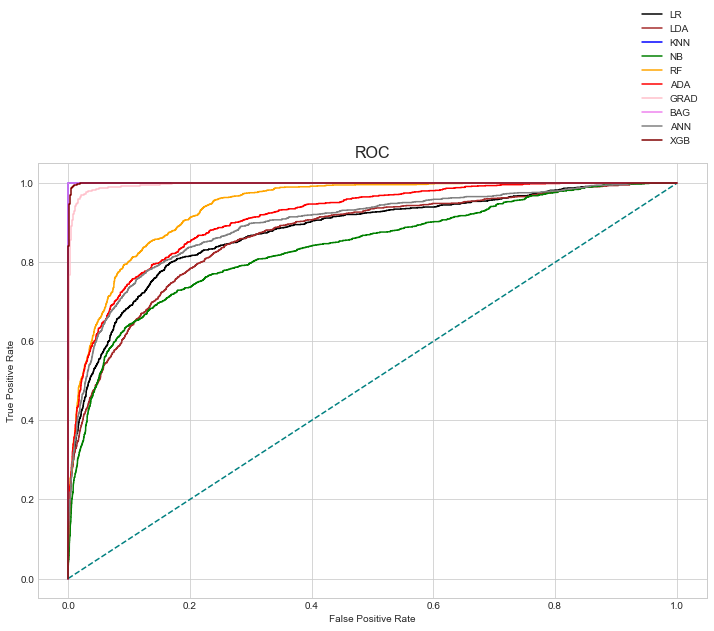

In [450]:
#Training Set
plt.plot([0, 1], [0, 1], linestyle='--',color='teal')
plt.plot(train_fpr, train_tpr,color='black',label="LR")
plt.plot(fpr_lda_train, tpr_lda_train,color='brown',label="LDA")
plt.plot(fpr_knn_train, tpr_knn_train,color='blue',label="KNN")
plt.plot(fpr_NB_train,tpr_NB_train,color='green',label="NB")
plt.plot(fpr_RF_train,tpr_RF_train,color='orange',label="RF")
plt.plot(fpr_ADA_train,tpr_ADA_train,color='red',label="ADA")
plt.plot(fpr_GRAD_train,tpr_GRAD_train,color='pink',label="GRAD")
plt.plot(fpr_BAG_train,tpr_BAG_train,color='violet',label="BAG")
plt.plot(anncl_train_fpr,anncl_train_tpr,color='grey',label="ANN")
plt.plot(xgb_train_fpr,xgb_train_tpr,color='maroon',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

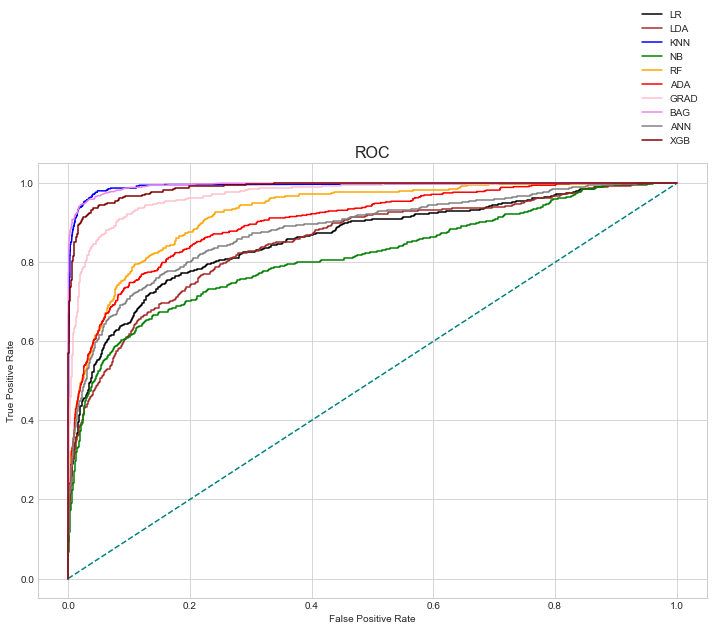

In [451]:
#Testing Set
plt.plot([0, 1], [0, 1], linestyle='--',color='teal')
plt.plot(test_fpr, test_tpr,color='black',label="LR")
plt.plot(fpr_lda_test, tpr_lda_test,color='brown',label="LDA")
plt.plot(fpr_knn_test, tpr_knn_test,color='blue',label="KNN")
plt.plot(fpr_NB_test,tpr_NB_test,color='green',label="NB")
plt.plot(fpr_RF_test,tpr_RF_test,color='orange',label="RF")
plt.plot(fpr_ADA_test,tpr_ADA_test,color='red',label="ADA")
plt.plot(fpr_GRAD_test,tpr_GRAD_test,color='pink',label="GRAD")
plt.plot(fpr_BAG_test,tpr_BAG_test,color='violet',label="BAG")
plt.plot(anncl_test_fpr,anncl_test_tpr,color='grey',label="ANN")
plt.plot(xgb_test_fpr,xgb_test_tpr,color='maroon',label="XGB")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

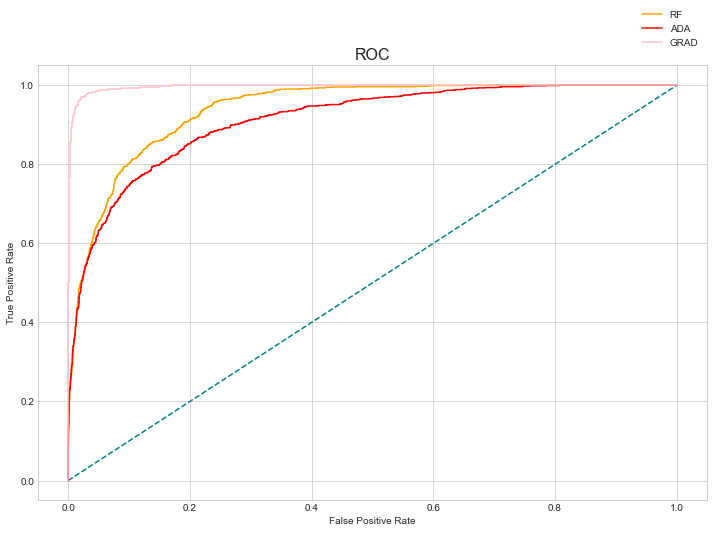

In [453]:
#Shortlist
#Training Set
plt.plot([0, 1], [0, 1], linestyle='--',color='teal')
plt.plot(fpr_RF_train,tpr_RF_train,color='orange',label="RF")
plt.plot(fpr_ADA_train,tpr_ADA_train,color='red',label="ADA")
plt.plot(fpr_GRAD_train,tpr_GRAD_train,color='pink',label="GRAD")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

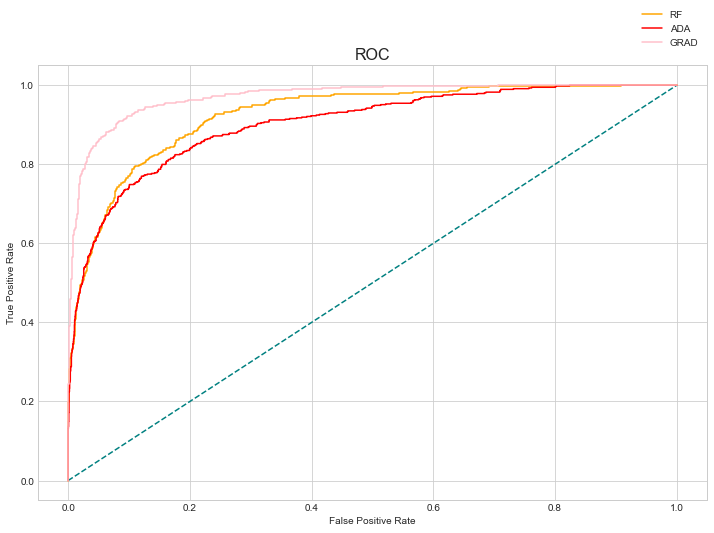

In [452]:
#Shortlist
#Testing Set
plt.plot([0, 1], [0, 1], linestyle='--',color='teal')
plt.plot(fpr_RF_test,tpr_RF_test,color='orange',label="RF")
plt.plot(fpr_ADA_test,tpr_ADA_test,color='red',label="ADA")
plt.plot(fpr_GRAD_test,tpr_GRAD_test,color='pink',label="GRAD")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

### WITH SMOTE TO SEE IF THERE IS ANY IMPROVEMENT BY BALANCING THE DATA

In [454]:
index=['Accuracy', 'Recall','Precision','F1 Score']
data = pd.DataFrame({
        'NB SMOTE Train Results':[NB_SMOTE_train_acc,NB_SMOTE_train_recall,NB_SMOTE_train_precision,NB_SMOTE_train_f1],
        'NB SMOTE Test Results':[NB_SMOTE_test_acc,NB_SMOTE_test_recall,NB_SMOTE_test_precision,NB_SMOTE_test_f1],
         'KNN SMOTE Train Results':[KNN_SMOTE_train_acc,KNN_SMOTE_train_recall,KNN_SMOTE_train_precision,KNN_SMOTE_train_f1],
        'KNN SMOTE Test Results':[KNN_SMOTE_test_acc,KNN_SMOTE_test_recall,KNN_SMOTE_test_precision,KNN_SMOTE_test_f1],
         'ADA SMOTE Train Results':[ADA_SMOTE_train_acc,ADA_SMOTE_train_recall,ADA_SMOTE_train_precision,ADA_SMOTE_train_f1],
        'ADA SMOTE Test Results':[ADA_SMOTE_test_acc,ADA_SMOTE_test_recall,ADA_SMOTE_test_precision,ADA_SMOTE_test_f1],
         'GRAD SMOTE Train Results':[GRAD_SMOTE_train_acc,GRAD_SMOTE_train_recall,GRAD_SMOTE_train_precision,GRAD_SMOTE_train_f1],
        'GRAD SMOTE Test Results':[GRAD_SMOTE_test_acc,GRAD_SMOTE_test_recall,GRAD_SMOTE_test_precision,GRAD_SMOTE_test_f1],
        'CART Train Results':[CART_train_acc,CART_train_recall,CART_train_precision,CART_train_f1],
        'CART Test Results':[CART_test_acc,CART_test_recall,CART_test_precision,CART_test_f1]},index=index)
round(data,4)

NB SMOTE Train Results  NB SMOTE Test Results  \
Accuracy                   0.7325                 0.6741   
Recall                     0.8100                 0.7500   
Precision                  0.7000                 0.3100   
F1 Score                   0.7500                 0.4400   

           KNN SMOTE Train Results  KNN SMOTE Test Results  \
Accuracy                    0.9324                  0.8307   
Recall                      1.0000                  0.8600   
Precision                   0.8800                  0.5000   
F1 Score                    0.9400                  0.6300   

           ADA SMOTE Train Results  ADA SMOTE Test Results  \
Accuracy                    0.9236                  0.8934   
Recall                      0.9100                  0.6800   
Precision                   0.9300                  0.6900   
F1 Score                    0.9200                  0.6800   

           GRAD SMOTE Train Results  GRAD SMOTE Test Results  \
Accuracy                     0.9999                    0.952   
Recall                       1.0000                    0.830   
Precision                    1.0000                    0.880   
F1 Score                     1.0000                    0.850   

           CART Train Results  CART Test Results  
Accuracy               0.9401              0.907  
Recall                 0.7900              0.680  
Precision              0.8500              0.740  
F1 Score               0.8200              0.710